# 빠른 학습을 위한 tfrecords 데이터셋 생성
- 컴페티션 기본 데이터는 data/public 하위 폴더에 있다고 가정합니다. (train.csv, sample_submission.csv, etc)
- 또한 train.zip, test.zip 역시 data/public 하위에 압축을 풀어놓았다고 가정하고 시작하겠습니다.

In [1]:
import os
import os.path as pth
import json
import shutil
import pandas as pd
from tqdm import tqdm

data_base_path = pth.join('public') #'data', 
os.makedirs(data_base_path, exist_ok=True)

In [2]:
category_csv_name = 'category.csv'
category_json_name = 'category.json'
submission_csv_name = 'sample_submisstion.csv'
train_csv_name = 'train.csv'

train_zip_name = 'train.zip'
test_zip_name = 'test.zip'

일단 모든 jpg 파일을 한 경로에 놓고 작업하기 편하게 하는 방식입니다.  
파일이 많다보니 파일 옮기는 작업을 쉘 한줄로 하려니 명령어가 너무 길어져 오류가 발생힙니다.  
조금 번거롭더라도 하나씩 가져와서 한 경로 이하에 놓도록 하였습니다.

In [5]:
train_data_path = pth.join(data_base_path, 'train')
test_data_path = pth.join(data_base_path, 'test')

if not pth.exists(train_data_path):
    os.system('unzip {}/{} -d {}'.format(data_base_path, train_zip_name, train_data_path))
    # os.system('mv {}/*/*/* {}'.format(train_data_path, train_data_path))
    place_name_list = [name for name in os.listdir(train_data_path) if not name.endswith('.JPG')]
    for place_name in place_name_list:
        place_fullpath = pth.join(train_data_path, place_name)
        landmark_name_list = os.listdir(place_fullpath)
        for landmark_name in landmark_name_list:
            landmark_fullpath = pth.join(place_fullpath, landmark_name)
            image_name_list = os.listdir(landmark_fullpath)
            for image_name in image_name_list:
                image_fullpath = pth.join(landmark_fullpath, image_name)
                if not image_fullpath.endswith('.JPG'):
                    continue
                shutil.move(image_fullpath, train_data_path)

if not pth.exists(test_data_path):
    os.system('unzip {}/{} -d {}'.format(data_base_path, test_zip_name, test_data_path))
    # os.system('mv {}/*/* {}'.format(test_data_path, test_data_path))
    temp_name_list = [name for name in os.listdir(test_data_path) if not name.endswith('.JPG')]
    for temp_name in temp_name_list:
        temp_fullpath = pth.join(test_data_path, temp_name)
        image_name_list = os.listdir(temp_fullpath)
        for image_name in image_name_list:
            image_fullpath = pth.join(temp_fullpath, image_name)
            if not image_fullpath.endswith('.JPG'):
                continue
            shutil.move(image_fullpath, test_data_path)

In [7]:
train_csv_path = pth.join(data_base_path, train_csv_name)
train_df = pd.read_csv(train_csv_path)
train_dict = {k:v for k, v in train_df.values}

submission_csv_path = pth.join(data_base_path, submission_csv_name)
submission_df = pd.read_csv(submission_csv_path)
# submission_df.head()

train_df.head()

id  landmark_id
0  동탄_복합문화센터_057          114
1  동탄_복합문화센터_110          114
2  동탄_복합문화센터_016          114
3  동탄_복합문화센터_022          114
4  동탄_복합문화센터_052          114

In [7]:
### Check all file is exist

for basename in tqdm(train_df['id']):
    if not pth.exists(pth.join(train_data_path, basename+'.JPG')):
        print(basename)

for basename in tqdm(submission_df['id']):
    if not pth.exists(pth.join(test_data_path, basename+'.JPG')):
        print(basename)        

  1%|▏         | 1217/88102 [00:00<00:14, 6034.35it/s]

동탄_복합문화센터_057
동탄_복합문화센터_110
동탄_복합문화센터_016
동탄_복합문화센터_022
동탄_복합문화센터_052
동탄_복합문화센터_079
동탄_복합문화센터_035
동탄_복합문화센터_045
동탄_복합문화센터_111
동탄_복합문화센터_107
동탄_복합문화센터_032
동탄_복합문화센터_093
동탄_복합문화센터_066
동탄_복합문화센터_012
동탄_복합문화센터_116
동탄_복합문화센터_114
동탄_복합문화센터_103
동탄_복합문화센터_090
동탄_복합문화센터_037
동탄_복합문화센터_091
동탄_복합문화센터_095
동탄_복합문화센터_068
동탄_복합문화센터_014
동탄_복합문화센터_063
동탄_복합문화센터_099
동탄_복합문화센터_101
동탄_복합문화센터_100
동탄_복합문화센터_003
동탄_복합문화센터_105
동탄_복합문화센터_002
동탄_복합문화센터_083
동탄_복합문화센터_018
동탄_복합문화센터_024
동탄_복합문화센터_049
동탄_복합문화센터_074
동탄_복합문화센터_085
동탄_복합문화센터_034
동탄_복합문화센터_010
동탄_복합문화센터_056
동탄_복합문화센터_078
동탄_복합문화센터_025
동탄_복합문화센터_041
동탄_복합문화센터_092
동탄_복합문화센터_072
동탄_복합문화센터_104
동탄_복합문화센터_089
동탄_복합문화센터_011
동탄_복합문화센터_062
동탄_복합문화센터_102
동탄_복합문화센터_098
동탄_복합문화센터_030
동탄_복합문화센터_088
동탄_복합문화센터_044
동탄_복합문화센터_060
동탄_복합문화센터_108
동탄_복합문화센터_007
동탄_복합문화센터_067
동탄_복합문화센터_026
동탄_복합문화센터_031
동탄_복합문화센터_117
동탄_복합문화센터_019
동탄_복합문화센터_053
동탄_복합문화센터_071
동탄_복합문화센터_033
동탄_복합문화센터_119
동탄_복합문화센터_070
동탄_복합문화센터_029
동탄_복합문화센터_069
동탄_복합문화센터_113
동탄_복합문화센터_076
동탄_복합문화센터_027
동탄_복합문

  3%|▎         | 2449/88102 [00:00<00:14, 6095.43it/s]

국청사_001
국청사_070
국청사_055
국청사_063
국청사_021
국청사_058
국청사_101
국청사_050
국청사_053
국청사_043
국청사_061
국청사_013
국청사_022
국청사_011
국청사_073
국청사_071
국청사_040
국청사_012
국청사_039
국청사_014
국청사_103
국청사_015
국청사_056
국청사_057
국청사_082
국청사_009
국청사_010
국청사_091
국청사_045
국청사_104
국청사_004
국청사_060
국청사_029
국청사_098
국청사_093
국청사_047
국청사_113
국청사_051
국청사_090
국청사_102
국청사_108
국청사_033
국청사_096
국청사_072
국청사_068
국청사_067
국청사_054
국청사_094
국청사_041
국청사_092
국청사_020
국청사_085
국청사_025
국청사_080
국청사_097
국청사_002
국청사_005
국청사_095
국청사_117
국청사_016
국청사_018
국청사_052
국청사_059
고양_600_기념관_089
고양_600_기념관_079
고양_600_기념관_117
고양_600_기념관_110
고양_600_기념관_017
고양_600_기념관_107
고양_600_기념관_116
고양_600_기념관_078
고양_600_기념관_052
고양_600_기념관_104
고양_600_기념관_041
고양_600_기념관_047
고양_600_기념관_097
고양_600_기념관_035
고양_600_기념관_080
고양_600_기념관_084
고양_600_기념관_083
고양_600_기념관_023
고양_600_기념관_100
고양_600_기념관_003
고양_600_기념관_009
고양_600_기념관_051
고양_600_기념관_063
고양_600_기념관_093
고양_600_기념관_004
고양_600_기념관_034
고양_600_기념관_073
고양_600_기념관_086
고양_600_기념관_036
고양_600_기념관_095
고양_600_기념관_070
고양_600_기념관_037
고양_600_기념관_120
고

  4%|▍         | 3679/88102 [00:00<00:13, 6124.24it/s]

일산_벨라시타_082
일산_벨라시타_114
일산_벨라시타_005
일산_벨라시타_027
일산_벨라시타_068
일산_벨라시타_010
일산_벨라시타_011
일산_벨라시타_072
일산_벨라시타_088
일산_벨라시타_113
일산_벨라시타_106
일산_벨라시타_043
일산_벨라시타_050
일산_벨라시타_094
동구릉원릉_076
동구릉원릉_084
동구릉원릉_093
동구릉원릉_052
동구릉원릉_066
동구릉원릉_065
동구릉원릉_028
동구릉원릉_099
동구릉원릉_097
동구릉원릉_118
동구릉원릉_004
동구릉원릉_015
동구릉원릉_116
동구릉원릉_101
동구릉원릉_070
동구릉원릉_008
동구릉원릉_019
동구릉원릉_034
동구릉원릉_095
동구릉원릉_111
동구릉원릉_058
동구릉원릉_087
동구릉원릉_041
동구릉원릉_011
동구릉원릉_035
동구릉원릉_045
동구릉원릉_048
동구릉원릉_117
동구릉원릉_071
동구릉원릉_085
동구릉원릉_006
동구릉원릉_094
동구릉원릉_100
동구릉원릉_080
동구릉원릉_054
동구릉원릉_016
동구릉원릉_061
동구릉원릉_083
동구릉원릉_064
동구릉원릉_088
동구릉원릉_077
동구릉원릉_102
동구릉원릉_112
동구릉원릉_018
동구릉원릉_091
동구릉원릉_110
동구릉원릉_092
동구릉원릉_056
동구릉원릉_055
동구릉원릉_050
동구릉원릉_053
동구릉원릉_017
동구릉원릉_067
동구릉원릉_002
동구릉원릉_078
동구릉원릉_109
동구릉원릉_026
동구릉원릉_038
동구릉원릉_022
동구릉원릉_027
동구릉원릉_089
동구릉원릉_042
동구릉원릉_014
동구릉원릉_057
동구릉원릉_082
동구릉원릉_106
동구릉원릉_079
동구릉원릉_073
동구릉원릉_107
동구릉원릉_113
동구릉원릉_051
동구릉원릉_032
동구릉원릉_031
동구릉원릉_120
동구릉원릉_060
동구릉원릉_108
동구릉원릉_020
동구릉원릉_072
동구릉원릉_046
동구릉원릉_024
동구릉원릉_104
동구릉원릉_009
동구릉원릉_037
동구

  6%|▌         | 4884/88102 [00:00<00:13, 6064.78it/s]

통일워터파크_117
통일워터파크_108
통일워터파크_079
통일워터파크_022
통일워터파크_109
통일워터파크_098
통일워터파크_059
통일워터파크_018
통일워터파크_091
통일워터파크_096
통일워터파크_029
통일워터파크_040
통일워터파크_114
통일워터파크_085
통일워터파크_075
통일워터파크_030
통일워터파크_016
통일워터파크_063
통일워터파크_001
통일워터파크_069
통일워터파크_038
통일워터파크_070
통일워터파크_074
통일워터파크_068
통일워터파크_005
통일워터파크_039
통일워터파크_105
통일워터파크_061
통일워터파크_104
통일워터파크_002
통일워터파크_101
통일워터파크_107
통일워터파크_026
통일워터파크_047
통일워터파크_077
통일워터파크_041
통일워터파크_042
통일워터파크_054
통일워터파크_067
통일워터파크_081
통일워터파크_094
통일워터파크_050
통일워터파크_010
통일워터파크_097
통일워터파크_020
통일워터파크_111
통일워터파크_090
통일워터파크_064
통일워터파크_014
통일워터파크_071
통일워터파크_083
통일워터파크_106
통일워터파크_060
통일워터파크_056
통일워터파크_034
통일워터파크_036
통일워터파크_011
통일워터파크_103
통일워터파크_045
통일워터파크_013
통일워터파크_113
통일워터파크_084
통일워터파크_100
통일워터파크_043
통일워터파크_008
통일워터파크_066
통일워터파크_044
통일워터파크_049
통일워터파크_088
통일워터파크_023
통일워터파크_073
통일워터파크_062
군포시청_085
군포시청_117
군포시청_090
군포시청_065
군포시청_063
군포시청_070
군포시청_026
군포시청_039
군포시청_102
군포시청_067
군포시청_095
군포시청_106
군포시청_030
군포시청_048
군포시청_069
군포시청_114
군포시청_014
군포시청_007
군포시청_004
군포시청_084
군포시청_100
군포시청_111
군포시청_074
군

  7%|▋         | 6038/88102 [00:01<00:13, 5908.15it/s]

의정부_실내빙상장_096
의정부_실내빙상장_035
의정부_실내빙상장_003
의정부_실내빙상장_061
의정부_실내빙상장_091
의정부_실내빙상장_010
의정부_실내빙상장_069
의정부_실내빙상장_082
의정부_실내빙상장_102
의정부_실내빙상장_084
의정부_실내빙상장_090
의정부_실내빙상장_036
의정부_실내빙상장_032
의정부_실내빙상장_007
의정부_실내빙상장_079
의정부_실내빙상장_033
의정부_실내빙상장_029
의정부_실내빙상장_005
의정부_실내빙상장_009
의정부_실내빙상장_098
의정부_실내빙상장_031
의정부_실내빙상장_026
의정부_실내빙상장_021
의정부_실내빙상장_023
의정부_실내빙상장_014
의정부_실내빙상장_055
의정부_실내빙상장_027
의정부_실내빙상장_083
의정부_실내빙상장_001
의정부_실내빙상장_081
의정부_실내빙상장_025
의정부_실내빙상장_077
의정부_실내빙상장_042
의정부_실내빙상장_062
의정부_실내빙상장_074
의정부_실내빙상장_119
의정부_실내빙상장_092
마리나_베이_서울_025
마리나_베이_서울_041
마리나_베이_서울_080
마리나_베이_서울_068
마리나_베이_서울_024
마리나_베이_서울_043
마리나_베이_서울_099
마리나_베이_서울_075
마리나_베이_서울_040
마리나_베이_서울_081
마리나_베이_서울_018
마리나_베이_서울_032
마리나_베이_서울_071
마리나_베이_서울_019
마리나_베이_서울_011
마리나_베이_서울_012
마리나_베이_서울_057
마리나_베이_서울_113
마리나_베이_서울_090
마리나_베이_서울_029
마리나_베이_서울_069
마리나_베이_서울_083
마리나_베이_서울_107
마리나_베이_서울_058
마리나_베이_서울_044
마리나_베이_서울_056
마리나_베이_서울_021
마리나_베이_서울_093
마리나_베이_서울_096
마리나_베이_서울_088
마리나_베이_서울_049
마리나_베이_서울_085
마리나_베이_서울_062
마리나_베이_서울_115
마리나_베이

  8%|▊         | 6613/88102 [00:01<00:14, 5819.64it/s]

오리서원_009
오리서원_035
오리서원_078
오리서원_110
오리서원_049
오리서원_053
오리서원_047
오리서원_001
오리서원_006
오리서원_040
오리서원_016
오리서원_093
오리서원_095
오리서원_048
오리서원_007
오리서원_092
오리서원_105
오리서원_043
오리서원_079
오리서원_068
오리서원_021
오리서원_087
오리서원_106
오리서원_058
오리서원_088
오리서원_119
오리서원_074
오리서원_063
오리서원_094
오리서원_033
오리서원_060
오리서원_112
오리서원_028
오리서원_020
오리서원_107
오리서원_070
오리서원_059
오리서원_084
오리서원_052
오리서원_118
오리서원_004
오리서원_086
오리서원_051
오리서원_061
오리서원_091
오리서원_089
오리서원_014
오리서원_108
오리서원_010
오리서원_116
오리서원_025
오리서원_044
오리서원_055
오리서원_030
장미란_체육관_050
장미란_체육관_074
장미란_체육관_084
장미란_체육관_055
장미란_체육관_040
장미란_체육관_101
장미란_체육관_083
장미란_체육관_014
장미란_체육관_022
장미란_체육관_023
장미란_체육관_116
장미란_체육관_048
장미란_체육관_102
장미란_체육관_030
장미란_체육관_025
장미란_체육관_008
장미란_체육관_079
장미란_체육관_073
장미란_체육관_069
장미란_체육관_010
장미란_체육관_066
장미란_체육관_068
장미란_체육관_058
장미란_체육관_028
장미란_체육관_107
장미란_체육관_001
장미란_체육관_045
장미란_체육관_016
장미란_체육관_013
장미란_체육관_053
장미란_체육관_056
장미란_체육관_117
장미란_체육관_004
장미란_체육관_026
장미란_체육관_118
장미란_체육관_035
장미란_체육관_081
장미란_체육관_054
장미란_체육관_029
장미란_체육관_043
장미란_체육관_078
장미란_체육관_111
장미란_체육관_05

  9%|▉         | 7742/88102 [00:01<00:14, 5559.45it/s]

부천역_지하도상가_057
부천역_지하도상가_023
부천역_지하도상가_025
부천역_지하도상가_024
부천역_지하도상가_072
부천역_지하도상가_048
부천역_지하도상가_044
부천역_지하도상가_063
부천역_지하도상가_109
부천역_지하도상가_013
부천역_지하도상가_030
부천역_지하도상가_051
부천역_지하도상가_017
부천역_지하도상가_043
부천역_지하도상가_009
부천역_지하도상가_116
부천역_지하도상가_096
부천역_지하도상가_004
부천역_지하도상가_021
부천역_지하도상가_103
부천역_지하도상가_055
부천역_지하도상가_007
부천역_지하도상가_016
부천역_지하도상가_042
부천역_지하도상가_120
부천역_지하도상가_080
부천역_지하도상가_006
부천역_지하도상가_027
부천역_지하도상가_001
부천역_지하도상가_099
부천역_지하도상가_094
부천역_지하도상가_110
부천역_지하도상가_108
부천역_지하도상가_115
부천역_지하도상가_077
부천역_지하도상가_061
부천역_지하도상가_019
부천역_지하도상가_107
부천역_지하도상가_011
부천역_지하도상가_114
부천역_지하도상가_047
부천역_지하도상가_014
부천역_지하도상가_034
부천역_지하도상가_098
부천역_지하도상가_086
부천역_지하도상가_046
부천역_지하도상가_018
부천역_지하도상가_015
부천역_지하도상가_050
부천역_지하도상가_092
부천역_지하도상가_022
부천역_지하도상가_053
부천역_지하도상가_111
부천역_지하도상가_085
부천역_지하도상가_105
부천역_지하도상가_029
부천역_지하도상가_112
부천역_지하도상가_005
부천역_지하도상가_002
군포_시외버스_터미널_089
군포_시외버스_터미널_107
군포_시외버스_터미널_086
군포_시외버스_터미널_045
군포_시외버스_터미널_020
군포_시외버스_터미널_058
군포_시외버스_터미널_081
군포_시외버스_터미널_031
군포_시외버스_터미널_108
군포_시외버스_터미널_088
군포_시외버스_터미널_09

 10%|█         | 8902/88102 [00:01<00:14, 5512.02it/s]

성지파크_골프장_081
성지파크_골프장_092
성지파크_골프장_110
성지파크_골프장_026
성지파크_골프장_071
성지파크_골프장_078
성지파크_골프장_008
성지파크_골프장_051
성지파크_골프장_083
성지파크_골프장_065
성지파크_골프장_045
성지파크_골프장_012
성지파크_골프장_015
성지파크_골프장_067
성지파크_골프장_063
성지파크_골프장_099
성지파크_골프장_109
성지파크_골프장_042
성지파크_골프장_036
성지파크_골프장_014
성지파크_골프장_103
성지파크_골프장_080
성지파크_골프장_060
성지파크_골프장_074
성지파크_골프장_069
성지파크_골프장_028
부천전수관_057
부천전수관_072
부천전수관_112
부천전수관_076
부천전수관_097
부천전수관_120
부천전수관_095
부천전수관_046
부천전수관_098
부천전수관_040
부천전수관_107
부천전수관_036
부천전수관_035
부천전수관_078
부천전수관_034
부천전수관_081
부천전수관_045
부천전수관_090
부천전수관_096
부천전수관_002
부천전수관_014
부천전수관_071
부천전수관_110
부천전수관_033
부천전수관_004
부천전수관_092
부천전수관_043
부천전수관_064
부천전수관_085
부천전수관_099
부천전수관_023
부천전수관_063
부천전수관_094
부천전수관_048
부천전수관_058
부천전수관_007
부천전수관_106
부천전수관_060
부천전수관_068
부천전수관_012
부천전수관_032
부천전수관_041
부천전수관_083
부천전수관_070
부천전수관_022
부천전수관_087
부천전수관_026
부천전수관_008
부천전수관_069
부천전수관_052
부천전수관_005
부천전수관_037
부천전수관_115
부천전수관_024
부천전수관_091
부천전수관_051
부천전수관_006
부천전수관_030
부천전수관_079
부천전수관_011
부천전수관_054
부천전수관_093
부천전수관_020
부천전수관_075
부천전수관_088
부천전수관_047
부천

 11%|█▏        | 10100/88102 [00:01<00:13, 5734.71it/s]

장경사_021
장경사_029
장경사_028
장경사_102
장경사_111
장경사_009
장경사_078
장경사_095
장경사_061
장경사_053
장경사_103
장경사_104
동탄_라마다_호텔_045
동탄_라마다_호텔_051
동탄_라마다_호텔_054
동탄_라마다_호텔_035
동탄_라마다_호텔_015
동탄_라마다_호텔_044
동탄_라마다_호텔_111
동탄_라마다_호텔_091
동탄_라마다_호텔_040
동탄_라마다_호텔_120
동탄_라마다_호텔_093
동탄_라마다_호텔_059
동탄_라마다_호텔_102
동탄_라마다_호텔_073
동탄_라마다_호텔_026
동탄_라마다_호텔_079
동탄_라마다_호텔_106
동탄_라마다_호텔_019
동탄_라마다_호텔_056
동탄_라마다_호텔_039
동탄_라마다_호텔_089
동탄_라마다_호텔_038
동탄_라마다_호텔_009
동탄_라마다_호텔_065
동탄_라마다_호텔_064
동탄_라마다_호텔_033
동탄_라마다_호텔_119
동탄_라마다_호텔_006
동탄_라마다_호텔_030
동탄_라마다_호텔_018
동탄_라마다_호텔_069
동탄_라마다_호텔_100
동탄_라마다_호텔_066
동탄_라마다_호텔_095
동탄_라마다_호텔_011
동탄_라마다_호텔_075
동탄_라마다_호텔_020
동탄_라마다_호텔_027
동탄_라마다_호텔_104
동탄_라마다_호텔_025
동탄_라마다_호텔_083
동탄_라마다_호텔_042
동탄_라마다_호텔_094
동탄_라마다_호텔_034
동탄_라마다_호텔_003
동탄_라마다_호텔_078
동탄_라마다_호텔_116
동탄_라마다_호텔_032
동탄_라마다_호텔_090
동탄_라마다_호텔_043
동탄_라마다_호텔_101
동탄_라마다_호텔_022
동탄_라마다_호텔_016
동탄_라마다_호텔_037
동탄_라마다_호텔_088
동탄_라마다_호텔_036
동탄_라마다_호텔_010
동탄_라마다_호텔_097
동탄_라마다_호텔_057
동탄_라마다_호텔_004
동탄_라마다_호텔_041
동탄_라마다_호텔_108
동탄_라마다_호텔_092
동탄_라마다_호텔_107
동탄_라마다_호

 13%|█▎        | 11295/88102 [00:01<00:13, 5838.50it/s]

경기도_박물관_016
경기도_박물관_075
경기도_박물관_100
경기도_박물관_024
경기도_박물관_105
경기도_박물관_091
경기도_박물관_056
경기도_박물관_006
경기도_박물관_022
경기도_박물관_120
경기도_박물관_062
경기도_박물관_053
경기도_박물관_013
경기도_박물관_064
경기도_박물관_034
경기도_박물관_097
경기도_박물관_085
경기도_박물관_031
경기도_박물관_048
경기도_박물관_014
경기도_박물관_104
경기도_박물관_004
경기도_박물관_066
경기도_박물관_018
경기도_박물관_118
경기도_박물관_117
경기도_박물관_068
경기도_박물관_069
경기도_박물관_090
경기도_박물관_032
경기도_박물관_107
경기도_박물관_113
경기도_박물관_074
경기도_박물관_029
경기도_박물관_096
경기도_박물관_061
경기도_박물관_028
경기도_박물관_103
경기도_박물관_063
경기도_박물관_011
경기도_박물관_052
경기도_박물관_001
경기도_박물관_043
경기도_박물관_106
경기도_박물관_071
경기도_박물관_109
경기도_박물관_010
경기도_박물관_102
경기도_박물관_108
경기도_박물관_007
경기도_박물관_036
경기도_박물관_039
경기도_박물관_065
경기도_박물관_116
경기도_박물관_067
경기도_박물관_114
경기도_박물관_073
경기도_박물관_098
경기도_박물관_012
경기도_박물관_054
경기도_박물관_087
경기도_박물관_093
롯데백화점_일산점_118
롯데백화점_일산점_109
롯데백화점_일산점_057
롯데백화점_일산점_064
롯데백화점_일산점_073
롯데백화점_일산점_020
롯데백화점_일산점_021
롯데백화점_일산점_001
롯데백화점_일산점_002
롯데백화점_일산점_009
롯데백화점_일산점_062
롯데백화점_일산점_017
롯데백화점_일산점_101
롯데백화점_일산점_016
롯데백화점_일산점_112
롯데백화점_일산점_007
롯데백화점_일산점_033
롯데백화점_일산점_031
롯데백화

 14%|█▍        | 12504/88102 [00:02<00:12, 5911.70it/s]

하남_문화예술회관_058
하남_문화예술회관_109
하남_문화예술회관_080
하남_문화예술회관_047
하남_문화예술회관_102
하남_문화예술회관_078
하남_문화예술회관_089
하남_문화예술회관_040
하남_문화예술회관_002
하남_문화예술회관_067
하남_문화예술회관_029
하남_문화예술회관_021
하남_문화예술회관_006
하남_문화예술회관_064
하남_문화예술회관_043
하남_문화예술회관_022
하남_문화예술회관_077
하남_문화예술회관_112
하남_문화예술회관_048
하남_문화예술회관_001
하남_문화예술회관_003
하남_문화예술회관_038
하남_문화예술회관_032
하남_문화예술회관_093
하남_문화예술회관_118
하남_문화예술회관_023
하남_문화예술회관_033
하남_문화예술회관_035
하남_문화예술회관_062
하남_문화예술회관_056
하남_문화예술회관_027
하남_문화예술회관_051
행주_서원_073
행주_서원_002
행주_서원_048
행주_서원_116
행주_서원_015
행주_서원_100
행주_서원_103
행주_서원_031
행주_서원_095
행주_서원_036
행주_서원_105
행주_서원_120
행주_서원_028
행주_서원_081
행주_서원_078
행주_서원_068
행주_서원_098
행주_서원_071
행주_서원_022
행주_서원_088
행주_서원_079
행주_서원_039
행주_서원_061
행주_서원_043
행주_서원_023
행주_서원_050
행주_서원_058
행주_서원_035
행주_서원_055
행주_서원_032
행주_서원_021
행주_서원_112
행주_서원_063
행주_서원_060
행주_서원_008
행주_서원_010
행주_서원_037
행주_서원_012
행주_서원_096
행주_서원_019
행주_서원_034
행주_서원_083
행주_서원_118
행주_서원_093
행주_서원_044
행주_서원_072
행주_서원_054
행주_서원_099
행주_서원_102
행주_서원_106
행주_서원_094
행주_서원_041
행주_서원_069
행주_서원_117
행주_서원_113
행주

 16%|█▌        | 13678/88102 [00:02<00:13, 5515.48it/s]

고양_아람누리_109
고양_아람누리_022
고양_아람누리_079
고양_아람누리_016
고양_아람누리_026
고양_아람누리_066
고양_아람누리_099
고양_아람누리_086
고양_아람누리_110
고양_아람누리_082
고양_아람누리_068
고양_아람누리_005
고양_아람누리_054
고양_아람누리_112
고양_아람누리_064
고양_아람누리_094
고양_아람누리_116
고양_아람누리_059
고양_아람누리_091
고양_아람누리_078
고양_아람누리_080
고양_아람누리_048
고양_아람누리_050
고양_아람누리_073
고양_아람누리_100
고양_아람누리_092
고양_아람누리_088
고양_아람누리_077
고양_아람누리_115
고양_아람누리_056
고양_아람누리_098
고양_아람누리_070
고양_아람누리_014
고양_아람누리_035
고양_아람누리_027
고양_아람누리_039
고양_아람누리_007
고양_아람누리_058
고양_아람누리_108
롯데백화점_중동점_117
롯데백화점_중동점_061
롯데백화점_중동점_010
롯데백화점_중동점_022
롯데백화점_중동점_064
롯데백화점_중동점_028
롯데백화점_중동점_089
롯데백화점_중동점_078
롯데백화점_중동점_074
롯데백화점_중동점_110
롯데백화점_중동점_108
롯데백화점_중동점_033
롯데백화점_중동점_007
롯데백화점_중동점_036
롯데백화점_중동점_032
롯데백화점_중동점_023
롯데백화점_중동점_094
롯데백화점_중동점_002
롯데백화점_중동점_027
롯데백화점_중동점_114
롯데백화점_중동점_052
롯데백화점_중동점_040
롯데백화점_중동점_059
롯데백화점_중동점_004
롯데백화점_중동점_009
롯데백화점_중동점_104
롯데백화점_중동점_119
롯데백화점_중동점_082
롯데백화점_중동점_066
롯데백화점_중동점_013
롯데백화점_중동점_039
롯데백화점_중동점_019
롯데백화점_중동점_011
롯데백화점_중동점_058
롯데백화점_중동점_048
롯데백화점_중동점_025
롯데백화점_중동점_068
롯데백화점_중동점_073


 17%|█▋        | 14805/88102 [00:02<00:13, 5393.80it/s]

원효대사_깨달음_체험관_009
원효대사_깨달음_체험관_018
원효대사_깨달음_체험관_114
원효대사_깨달음_체험관_014
원효대사_깨달음_체험관_100
원효대사_깨달음_체험관_113
원효대사_깨달음_체험관_099
원효대사_깨달음_체험관_096
원효대사_깨달음_체험관_062
원효대사_깨달음_체험관_042
원효대사_깨달음_체험관_073
원효대사_깨달음_체험관_053
원효대사_깨달음_체험관_120
원효대사_깨달음_체험관_089
원효대사_깨달음_체험관_076
원효대사_깨달음_체험관_052
원효대사_깨달음_체험관_117
원효대사_깨달음_체험관_091
원효대사_깨달음_체험관_109
원효대사_깨달음_체험관_046
원효대사_깨달음_체험관_081
원효대사_깨달음_체험관_043
원효대사_깨달음_체험관_015
원효대사_깨달음_체험관_019
원효대사_깨달음_체험관_080
원효대사_깨달음_체험관_038
원효대사_깨달음_체험관_082
원효대사_깨달음_체험관_084
원효대사_깨달음_체험관_051
원효대사_깨달음_체험관_087
원효대사_깨달음_체험관_105
원효대사_깨달음_체험관_008
원효대사_깨달음_체험관_044
원효대사_깨달음_체험관_006
원효대사_깨달음_체험관_093
원효대사_깨달음_체험관_059
원효대사_깨달음_체험관_112
경인교육대학교_(경기캠퍼스)_098
경인교육대학교_(경기캠퍼스)_029
경인교육대학교_(경기캠퍼스)_062
경인교육대학교_(경기캠퍼스)_071
경인교육대학교_(경기캠퍼스)_074
경인교육대학교_(경기캠퍼스)_032
경인교육대학교_(경기캠퍼스)_044
경인교육대학교_(경기캠퍼스)_109
경인교육대학교_(경기캠퍼스)_061
경인교육대학교_(경기캠퍼스)_049
경인교육대학교_(경기캠퍼스)_023
경인교육대학교_(경기캠퍼스)_068
경인교육대학교_(경기캠퍼스)_064
경인교육대학교_(경기캠퍼스)_009
경인교육대학교_(경기캠퍼스)_115
경인교육대학교_(경기캠퍼스)_060
경인교육대학교_(경기캠퍼스)_054
경인교육대학교_(경기캠퍼스)_036
경인교육대학교_(경기

 18%|█▊        | 16020/88102 [00:02<00:12, 5731.87it/s]

동구릉휘릉_099
동구릉휘릉_096
동구릉휘릉_089
동구릉휘릉_073
동구릉휘릉_081
동구릉휘릉_040
동구릉휘릉_103
동구릉휘릉_003
동구릉휘릉_112
동구릉휘릉_005
동구릉휘릉_038
동구릉휘릉_008
동구릉휘릉_051
동구릉휘릉_097
동구릉휘릉_072
동구릉휘릉_046
동구릉휘릉_041
동구릉휘릉_056
동구릉휘릉_012
동구릉휘릉_019
동구릉휘릉_018
동구릉휘릉_076
동구릉휘릉_085
동구릉휘릉_023
동구릉휘릉_105
동구릉휘릉_049
동구릉휘릉_071
동구릉휘릉_104
동구릉휘릉_067
동구릉휘릉_070
동구릉휘릉_044
동구릉휘릉_065
동구릉휘릉_030
동구릉휘릉_002
동구릉휘릉_037
동구릉휘릉_090
광개토태왕동상_015
광개토태왕동상_106
광개토태왕동상_016
광개토태왕동상_075
광개토태왕동상_053
광개토태왕동상_085
광개토태왕동상_091
광개토태왕동상_061
광개토태왕동상_069
광개토태왕동상_029
광개토태왕동상_086
광개토태왕동상_065
광개토태왕동상_052
광개토태왕동상_117
광개토태왕동상_074
광개토태왕동상_036
광개토태왕동상_030
광개토태왕동상_119
광개토태왕동상_077
광개토태왕동상_007
광개토태왕동상_018
광개토태왕동상_011
광개토태왕동상_026
광개토태왕동상_005
광개토태왕동상_023
광개토태왕동상_064
광개토태왕동상_009
광개토태왕동상_060
광개토태왕동상_076
광개토태왕동상_097
광개토태왕동상_055
광개토태왕동상_082
광개토태왕동상_107
광개토태왕동상_079
광개토태왕동상_071
광개토태왕동상_102
광개토태왕동상_027
광개토태왕동상_051
광개토태왕동상_048
광개토태왕동상_103
광개토태왕동상_099
광개토태왕동상_044
광개토태왕동상_021
광개토태왕동상_083
광개토태왕동상_096
광개토태왕동상_043
광개토태왕동상_110
광개토태왕동상_014
광개토태왕동상_035
광개토태왕동상_120
광개토태왕동상_042
광개토태왕동상_041
광개토태왕동상_109
광개토태

 20%|█▉        | 17206/88102 [00:02<00:12, 5830.09it/s]

의정부_미술도서관_037
의정부_미술도서관_027
의정부_미술도서관_028
의정부_미술도서관_080
의정부_미술도서관_038
의정부_미술도서관_042
의정부_미술도서관_065
의정부_미술도서관_057
의정부_미술도서관_097
의정부_미술도서관_089
의정부_미술도서관_045
의정부_미술도서관_082
의정부_미술도서관_092
의정부_미술도서관_104
의정부_미술도서관_040
의정부_미술도서관_111
의정부_미술도서관_010
의정부_미술도서관_022
의정부_미술도서관_017
의정부_미술도서관_075
의정부_미술도서관_043
의정부_미술도서관_068
의정부_미술도서관_064
의정부_미술도서관_021
의정부_미술도서관_099
의정부_미술도서관_050
의정부_미술도서관_056
의정부_미술도서관_007
의정부_미술도서관_015
의정부_미술도서관_041
의정부_미술도서관_079
의정부_미술도서관_001
의정부_미술도서관_004
의정부_미술도서관_048
의정부_미술도서관_009
의정부_미술도서관_072
의정부_미술도서관_091
의정부_미술도서관_084
의정부_미술도서관_030
의정부_미술도서관_034
의정부_미술도서관_071
의정부_미술도서관_012
의정부_미술도서관_006
의정부_미술도서관_035
의정부_미술도서관_118
의정부_미술도서관_103
의정부_미술도서관_033
의정부_미술도서관_029
의정부_미술도서관_098
의정부_미술도서관_085
의정부_미술도서관_025
의정부_미술도서관_052
의정부_미술도서관_116
의정부_미술도서관_114
의정부_미술도서관_047
의정부_미술도서관_110
의정부_미술도서관_096
의정부_미술도서관_016
의정부_미술도서관_060
의정부_미술도서관_119
의정부_미술도서관_008
의정부_미술도서관_081
의정부_미술도서관_051
의정부_미술도서관_019
의정부_미술도서관_059
의정부_미술도서관_018
의정부_미술도서관_002
의정부_미술도서관_094
의정부_미술도서관_026
의정부_미술도서관_074
의정부_미술도서관_115
의정부_미술

 21%|██        | 18409/88102 [00:03<00:11, 5875.51it/s]

도당어울마당_078
도당어울마당_064
도당어울마당_057
도당어울마당_014
도당어울마당_091
도당어울마당_076
도당어울마당_106
도당어울마당_108
도당어울마당_052
도당어울마당_101
도당어울마당_022
도당어울마당_104
도당어울마당_013
도당어울마당_115
도당어울마당_015
도당어울마당_030
도당어울마당_067
도당어울마당_025
도당어울마당_058
도당어울마당_044
도당어울마당_085
도당어울마당_087
도당어울마당_047
도당어울마당_059
도당어울마당_046
도당어울마당_011
도당어울마당_112
도당어울마당_081
도당어울마당_109
도당어울마당_082
도당어울마당_050
도당어울마당_042
도당어울마당_005
도당어울마당_024
도당어울마당_119
도당어울마당_029
도당어울마당_032
도당어울마당_103
도당어울마당_116
도당어울마당_026
도당어울마당_012
도당어울마당_068
도당어울마당_114
도당어울마당_079
도당어울마당_043
도당어울마당_055
도당어울마당_028
도당어울마당_004
도당어울마당_039
도당어울마당_056
도당어울마당_019
도당어울마당_097
도당어울마당_083
도당어울마당_033
도당어울마당_037
도당어울마당_010
다이노스타_072
다이노스타_019
다이노스타_013
다이노스타_036
다이노스타_046
다이노스타_070
다이노스타_106
다이노스타_045
다이노스타_060
다이노스타_107
다이노스타_085
다이노스타_054
다이노스타_110
다이노스타_051
다이노스타_007
다이노스타_065
다이노스타_031
다이노스타_043
다이노스타_075
다이노스타_055
다이노스타_078
다이노스타_029
다이노스타_087
다이노스타_091
다이노스타_015
다이노스타_108
다이노스타_038
다이노스타_066
다이노스타_117
다이노스타_012
다이노스타_077
다이노스타_098
다이노스타_020
다이노스타_059
다이노스타_094
다이노스타_099
다이노스타_111
다이노스타_021
다이노스

 22%|██▏       | 19602/88102 [00:03<00:11, 5900.07it/s]

고양_어린이_박물관_073
고양_어린이_박물관_101
고양_어린이_박물관_032
고양_어린이_박물관_075
고양_어린이_박물관_004
고양_어린이_박물관_087
고양_어린이_박물관_058
고양_어린이_박물관_050
고양_어린이_박물관_083
고양_어린이_박물관_078
고양_어린이_박물관_002
고양_어린이_박물관_052
고양_어린이_박물관_023
고양_어린이_박물관_081
고양_어린이_박물관_014
고양_어린이_박물관_072
고양_어린이_박물관_111
고양_어린이_박물관_102
고양_어린이_박물관_018
고양_어린이_박물관_030
고양_어린이_박물관_088
고양_어린이_박물관_095
고양_어린이_박물관_085
고양_어린이_박물관_051
고양_어린이_박물관_068
고양_어린이_박물관_006
고양_어린이_박물관_064
고양_어린이_박물관_025
고양_어린이_박물관_097
고양_어린이_박물관_063
고양_어린이_박물관_115
고양_어린이_박물관_011
고양_어린이_박물관_036
고양_어린이_박물관_007
고양_어린이_박물관_076
고양_어린이_박물관_015
고양_어린이_박물관_042
부천시민회관_대문화관련_063
부천시민회관_대문화관련_073
부천시민회관_대문화관련_049
부천시민회관_대문화관련_091
부천시민회관_대문화관련_089
부천시민회관_대문화관련_028
부천시민회관_대문화관련_057
부천시민회관_대문화관련_065
부천시민회관_대문화관련_078
부천시민회관_대문화관련_029
부천시민회관_대문화관련_003
부천시민회관_대문화관련_008
부천시민회관_대문화관련_081
부천시민회관_대문화관련_098
부천시민회관_대문화관련_010
부천시민회관_대문화관련_090
부천시민회관_대문화관련_072
부천시민회관_대문화관련_039
부천시민회관_대문화관련_106
부천시민회관_대문화관련_111
부천시민회관_대문화관련_035
부천시민회관_대문화관련_004
부천시민회관_대문화관련_019
부천시민회관_대문화관련_095
부천시민회관_대문화관련_047
부천시민회관_대문화관련_031
부천시

 24%|██▎       | 20817/88102 [00:03<00:11, 5988.90it/s]

일산_MBC_드림센터_060
일산_MBC_드림센터_091
일산_MBC_드림센터_094
일산_MBC_드림센터_018
일산_MBC_드림센터_076
일산_MBC_드림센터_089
일산_MBC_드림센터_116
일산_MBC_드림센터_028
일산_MBC_드림센터_016
일산_MBC_드림센터_086
일산_MBC_드림센터_058
일산_MBC_드림센터_065
일산_MBC_드림센터_074
일산_MBC_드림센터_113
일산_MBC_드림센터_053
일산_MBC_드림센터_095
일산_MBC_드림센터_001
일산_MBC_드림센터_042
일산_MBC_드림센터_069
일산_MBC_드림센터_025
일산_MBC_드림센터_012
일산_MBC_드림센터_107
일산_MBC_드림센터_052
웨스턴돔_106
웨스턴돔_077
웨스턴돔_113
웨스턴돔_079
웨스턴돔_042
웨스턴돔_072
웨스턴돔_115
웨스턴돔_100
웨스턴돔_101
웨스턴돔_074
웨스턴돔_023
웨스턴돔_076
웨스턴돔_050
웨스턴돔_087
웨스턴돔_055
웨스턴돔_090
웨스턴돔_054
웨스턴돔_015
웨스턴돔_003
웨스턴돔_052
웨스턴돔_031
웨스턴돔_071
웨스턴돔_021
웨스턴돔_007
웨스턴돔_102
웨스턴돔_075
웨스턴돔_013
웨스턴돔_010
웨스턴돔_037
웨스턴돔_066
웨스턴돔_032
웨스턴돔_020
웨스턴돔_018
웨스턴돔_099
웨스턴돔_103
웨스턴돔_040
웨스턴돔_011
웨스턴돔_053
웨스턴돔_069
웨스턴돔_091
웨스턴돔_025
웨스턴돔_035
웨스턴돔_097
웨스턴돔_119
웨스턴돔_095
웨스턴돔_107
웨스턴돔_006
웨스턴돔_065
웨스턴돔_038
웨스턴돔_004
웨스턴돔_046
웨스턴돔_082
웨스턴돔_063
웨스턴돔_105
웨스턴돔_080
웨스턴돔_120
웨스턴돔_062
웨스턴돔_088
웨스턴돔_028
웨스턴돔_104
웨스턴돔_096
웨스턴돔_068
웨스턴돔_058
웨스턴돔_001
웨스턴돔_086
웨스턴돔_049
웨스턴돔_089
웨스턴돔_056
웨스턴돔_047
웨스턴돔_026
웨스

 25%|██▌       | 22032/88102 [00:03<00:10, 6025.44it/s]

시흥시청_047
시흥시청_095
시흥시청_109
시흥시청_065
시흥시청_096
시흥시청_090
시흥시청_103
시흥시청_113
시흥시청_036
시흥시청_041
시흥시청_056
시흥시청_048
시흥시청_067
시흥시청_055
시흥시청_013
시흥시청_050
시흥시청_064
시흥시청_071
시흥시청_010
시흥시청_070
시흥시청_008
시흥시청_080
시흥시청_017
시흥시청_077
이천_세라피아_042
이천_세라피아_012
이천_세라피아_021
이천_세라피아_096
이천_세라피아_024
이천_세라피아_100
이천_세라피아_050
이천_세라피아_019
이천_세라피아_057
이천_세라피아_091
이천_세라피아_052
이천_세라피아_043
이천_세라피아_081
이천_세라피아_013
이천_세라피아_014
이천_세라피아_049
이천_세라피아_044
이천_세라피아_114
이천_세라피아_113
이천_세라피아_060
이천_세라피아_099
이천_세라피아_118
이천_세라피아_101
이천_세라피아_016
이천_세라피아_066
이천_세라피아_048
이천_세라피아_073
이천_세라피아_088
이천_세라피아_089
이천_세라피아_009
이천_세라피아_068
이천_세라피아_102
이천_세라피아_004
이천_세라피아_097
이천_세라피아_027
이천_세라피아_119
이천_세라피아_112
이천_세라피아_083
이천_세라피아_069
이천_세라피아_108
이천_세라피아_076
이천_세라피아_001
이천_세라피아_087
이천_세라피아_033
이천_세라피아_007
이천_세라피아_111
이천_세라피아_082
이천_세라피아_026
이천_세라피아_120
이천_세라피아_084
이천_세라피아_117
이천_세라피아_059
이천_세라피아_053
이천_세라피아_022
이천_세라피아_072
이천_세라피아_041
이천_세라피아_002
이천_세라피아_047
이천_세라피아_038
이천_세라피아_105
이천_세라피아_085
이천_세라피아_079
이천_세라피아_005
이천_세라피아_116
이천_세라피아_032
이천_세

 26%|██▋       | 23251/88102 [00:03<00:10, 6039.01it/s]

양주_시립_장욱진_미술관_041
양주_시립_장욱진_미술관_092
양주_시립_장욱진_미술관_073
양주_시립_장욱진_미술관_009
양주_시립_장욱진_미술관_020
양주_시립_장욱진_미술관_063
양주_시립_장욱진_미술관_044
양주_시립_장욱진_미술관_038
양주_시립_장욱진_미술관_103
양주_시립_장욱진_미술관_101
양주_시립_장욱진_미술관_046
양주_시립_장욱진_미술관_004
양주_시립_장욱진_미술관_082
양주_시립_장욱진_미술관_022
양주_시립_장욱진_미술관_059
양주_시립_장욱진_미술관_014
양주_시립_장욱진_미술관_118
양주_시립_장욱진_미술관_065
양주_시립_장욱진_미술관_113
양주_시립_장욱진_미술관_064
양주_시립_장욱진_미술관_019
양주_시립_장욱진_미술관_007
양주_시립_장욱진_미술관_105
양주_시립_장욱진_미술관_067
양주_시립_장욱진_미술관_033
양주_시립_장욱진_미술관_035
양주_시립_장욱진_미술관_031
양주_시립_장욱진_미술관_049
양주_시립_장욱진_미술관_003
양주_시립_장욱진_미술관_048
양주_시립_장욱진_미술관_110
양주_시립_장욱진_미술관_081
양주_시립_장욱진_미술관_075
양주_시립_장욱진_미술관_053
양주_시립_장욱진_미술관_094
양주_시립_장욱진_미술관_032
양주_시립_장욱진_미술관_030
양주_시립_장욱진_미술관_071
양주_시립_장욱진_미술관_095
양주_시립_장욱진_미술관_099
양주_시립_장욱진_미술관_070
양주_시립_장욱진_미술관_056
양주_시립_장욱진_미술관_078
양주_시립_장욱진_미술관_117
양주_시립_장욱진_미술관_093
양주_시립_장욱진_미술관_086
양주_시립_장욱진_미술관_040
양주_시립_장욱진_미술관_006
양주_시립_장욱진_미술관_037
양주_시립_장욱진_미술관_027
양주_시립_장욱진_미술관_076
양주_시립_장욱진_미술관_043
양주_시립_장욱진_미술관_097
양주_시립_장욱진_미술관_083
양주_시립_장욱진_미술관_008
양주_시립_장욱진_

 28%|██▊       | 24480/88102 [00:04<00:10, 6089.35it/s]

스타힐_리조트_114
스타힐_리조트_041
스타힐_리조트_054
스타힐_리조트_110
스타힐_리조트_038
스타힐_리조트_064
스타힐_리조트_007
스타힐_리조트_074
스타힐_리조트_091
스타힐_리조트_003
스타힐_리조트_097
스타힐_리조트_113
스타힐_리조트_082
스타힐_리조트_037
스타힐_리조트_035
스타힐_리조트_005
스타힐_리조트_050
스타힐_리조트_043
스타힐_리조트_028
스타힐_리조트_036
스타힐_리조트_013
스타힐_리조트_072
스타힐_리조트_095
스타힐_리조트_016
스타힐_리조트_069
스타힐_리조트_077
스타힐_리조트_061
스타힐_리조트_075
스타힐_리조트_070
스타힐_리조트_117
스타힐_리조트_047
스타힐_리조트_109
스타힐_리조트_115
스타힐_리조트_027
스타힐_리조트_076
스타힐_리조트_015
스타힐_리조트_030
스타힐_리조트_066
스타힐_리조트_094
스타힐_리조트_078
스타힐_리조트_010
스타힐_리조트_025
스타힐_리조트_001
스타힐_리조트_049
스타힐_리조트_079
스타힐_리조트_017
스타힐_리조트_008
스타힐_리조트_031
스타힐_리조트_018
스타힐_리조트_100
스타힐_리조트_089
스타힐_리조트_083
스타힐_리조트_093
스타힐_리조트_056
스타힐_리조트_026
스타힐_리조트_020
스타힐_리조트_048
스타힐_리조트_112
스타힐_리조트_071
스타힐_리조트_004
스타힐_리조트_090
스타힐_리조트_021
스타힐_리조트_046
스타힐_리조트_108
스타힐_리조트_060
스타힐_리조트_032
스타힐_리조트_024
스타힐_리조트_096
스타힐_리조트_084
이대원_장군묘_117
이대원_장군묘_111
이대원_장군묘_024
이대원_장군묘_099
이대원_장군묘_104
이대원_장군묘_075
이대원_장군묘_012
이대원_장군묘_019
이대원_장군묘_055
이대원_장군묘_048
이대원_장군묘_016
이대원_장군묘_030
이대원_장군묘_018
이대원_장군묘_006
이대원_

 29%|██▉       | 25701/88102 [00:04<00:10, 6034.23it/s]

광주시_청소년_수련관_060
광주시_청소년_수련관_046
광주시_청소년_수련관_009
광주시_청소년_수련관_075
광주시_청소년_수련관_043
광주시_청소년_수련관_004
광주시_청소년_수련관_027
광주시_청소년_수련관_021
광주시_청소년_수련관_036
대화_레포츠공원_체육시설_096
대화_레포츠공원_체육시설_037
대화_레포츠공원_체육시설_013
대화_레포츠공원_체육시설_047
대화_레포츠공원_체육시설_010
대화_레포츠공원_체육시설_039
대화_레포츠공원_체육시설_018
대화_레포츠공원_체육시설_112
대화_레포츠공원_체육시설_097
대화_레포츠공원_체육시설_066
대화_레포츠공원_체육시설_046
대화_레포츠공원_체육시설_119
대화_레포츠공원_체육시설_109
대화_레포츠공원_체육시설_064
대화_레포츠공원_체육시설_105
대화_레포츠공원_체육시설_085
대화_레포츠공원_체육시설_100
대화_레포츠공원_체육시설_116
대화_레포츠공원_체육시설_084
대화_레포츠공원_체육시설_086
대화_레포츠공원_체육시설_108
대화_레포츠공원_체육시설_090
대화_레포츠공원_체육시설_114
대화_레포츠공원_체육시설_088
대화_레포츠공원_체육시설_099
대화_레포츠공원_체육시설_062
대화_레포츠공원_체육시설_106
대화_레포츠공원_체육시설_041
대화_레포츠공원_체육시설_005
대화_레포츠공원_체육시설_069
대화_레포츠공원_체육시설_029
대화_레포츠공원_체육시설_050
대화_레포츠공원_체육시설_065
대화_레포츠공원_체육시설_016
대화_레포츠공원_체육시설_012
대화_레포츠공원_체육시설_068
대화_레포츠공원_체육시설_034
대화_레포츠공원_체육시설_107
대화_레포츠공원_체육시설_002
대화_레포츠공원_체육시설_071
대화_레포츠공원_체육시설_083
대화_레포츠공원_체육시설_007
대화_레포츠공원_체육시설_103
대화_레포츠공원_체육시설_014
대화_레포츠공원_체육시설_061
대화_레포츠공원_체육시설_015
대화_레포츠공원_체육시설_043
대화_레포츠공원_체

 31%|███       | 26901/88102 [00:04<00:10, 5943.78it/s]

의정부시청_052
의정부시청_087
의정부시청_030
의정부시청_107
의정부시청_025
의정부시청_002
의정부시청_085
의정부시청_082
의정부시청_105
의정부시청_114
의정부시청_098
의정부시청_046
의정부시청_102
의정부시청_088
의정부시청_034
의정부시청_090
의정부시청_057
의정부시청_020
의정부시청_099
의정부시청_049
고양아람누리_아람미술관_038
고양아람누리_아람미술관_116
고양아람누리_아람미술관_049
고양아람누리_아람미술관_118
고양아람누리_아람미술관_077
고양아람누리_아람미술관_076
고양아람누리_아람미술관_071
고양아람누리_아람미술관_031
고양아람누리_아람미술관_090
고양아람누리_아람미술관_032
고양아람누리_아람미술관_023
고양아람누리_아람미술관_053
고양아람누리_아람미술관_088
고양아람누리_아람미술관_003
고양아람누리_아람미술관_017
고양아람누리_아람미술관_027
고양아람누리_아람미술관_079
고양아람누리_아람미술관_006
고양아람누리_아람미술관_110
고양아람누리_아람미술관_026
고양아람누리_아람미술관_052
고양아람누리_아람미술관_047
고양아람누리_아람미술관_039
고양아람누리_아람미술관_068
고양아람누리_아람미술관_107
고양아람누리_아람미술관_108
고양아람누리_아람미술관_091
고양아람누리_아람미술관_117
고양아람누리_아람미술관_093
고양아람누리_아람미술관_120
고양아람누리_아람미술관_101
고양아람누리_아람미술관_105
고양아람누리_아람미술관_061
고양아람누리_아람미술관_021
고양아람누리_아람미술관_098
고양아람누리_아람미술관_043
고양아람누리_아람미술관_002
고양아람누리_아람미술관_064
고양아람누리_아람미술관_111
고양아람누리_아람미술관_048
고양아람누리_아람미술관_100
고양아람누리_아람미술관_078
고양아람누리_아람미술관_046
고양아람누리_아람미술관_075
고양아람누리_아람미술관_119
고양아람누리_아람미술관_029
고양아람누리_아람미술관_008
고

 32%|███▏      | 28096/88102 [00:04<00:10, 5911.83it/s]

삼송_도서관_003
삼송_도서관_002
삼송_도서관_092
삼송_도서관_019
삼송_도서관_031
삼송_도서관_062
삼송_도서관_074
삼송_도서관_089
삼송_도서관_073
삼송_도서관_046
삼송_도서관_087
삼송_도서관_116
삼송_도서관_038
삼송_도서관_021
삼송_도서관_112
삼송_도서관_072
삼송_도서관_042
삼송_도서관_043
G_챔피언스_파크_029
G_챔피언스_파크_078
G_챔피언스_파크_101
G_챔피언스_파크_053
G_챔피언스_파크_117
G_챔피언스_파크_049
G_챔피언스_파크_113
G_챔피언스_파크_108
G_챔피언스_파크_013
G_챔피언스_파크_099
G_챔피언스_파크_071
G_챔피언스_파크_018
G_챔피언스_파크_094
G_챔피언스_파크_026
G_챔피언스_파크_019
G_챔피언스_파크_016
G_챔피언스_파크_022
G_챔피언스_파크_110
G_챔피언스_파크_033
G_챔피언스_파크_010
G_챔피언스_파크_077
G_챔피언스_파크_090
G_챔피언스_파크_120
G_챔피언스_파크_079
G_챔피언스_파크_062
G_챔피언스_파크_025
G_챔피언스_파크_051
G_챔피언스_파크_119
G_챔피언스_파크_043
G_챔피언스_파크_065
G_챔피언스_파크_070
G_챔피언스_파크_059
G_챔피언스_파크_066
G_챔피언스_파크_105
G_챔피언스_파크_042
G_챔피언스_파크_003
G_챔피언스_파크_103
G_챔피언스_파크_072
G_챔피언스_파크_031
G_챔피언스_파크_097
G_챔피언스_파크_006
G_챔피언스_파크_084
G_챔피언스_파크_040
G_챔피언스_파크_027
G_챔피언스_파크_107
G_챔피언스_파크_011
G_챔피언스_파크_118
G_챔피언스_파크_028
G_챔피언스_파크_098
G_챔피언스_파크_085
G_챔피언스_파크_102
G_챔피언스_파크_080
G_챔피언스_파크_111
G_챔피언스_파크_060
G_챔피언스_파크_023
G_챔피언스_파크_021
G_챔피언스_파크_063
G_챔피

 33%|███▎      | 29302/88102 [00:04<00:09, 5972.07it/s]

반여4동_주민센터_112
반여4동_주민센터_046
반여4동_주민센터_067
반여4동_주민센터_034
반여4동_주민센터_030
반여4동_주민센터_090
반여4동_주민센터_096
반여4동_주민센터_103
반여4동_주민센터_119
반여4동_주민센터_094
반여4동_주민센터_100
반여4동_주민센터_091
반여4동_주민센터_031
반여4동_주민센터_115
반여4동_주민센터_053
연산성서침례교회_037
연산성서침례교회_101
연산성서침례교회_118
연산성서침례교회_116
연산성서침례교회_034
연산성서침례교회_012
연산성서침례교회_112
연산성서침례교회_005
연산성서침례교회_029
연산성서침례교회_011
연산성서침례교회_013
연산성서침례교회_018
연산성서침례교회_088
연산성서침례교회_020
연산성서침례교회_099
연산성서침례교회_089
연산성서침례교회_052
연산성서침례교회_083
연산성서침례교회_049
연산성서침례교회_045
연산성서침례교회_073
연산성서침례교회_007
연산성서침례교회_023
연산성서침례교회_065
연산성서침례교회_031
연산성서침례교회_006
연산성서침례교회_062
연산성서침례교회_041
연산성서침례교회_028
연산성서침례교회_106
연산성서침례교회_021
연산성서침례교회_096
연산성서침례교회_081
연산성서침례교회_079
연산성서침례교회_082
연산성서침례교회_108
연산성서침례교회_035
연산성서침례교회_002
연산성서침례교회_087
연산성서침례교회_066
연산성서침례교회_003
연산성서침례교회_091
연산성서침례교회_039
연산성서침례교회_009
연산성서침례교회_036
연산성서침례교회_017
연산성서침례교회_080
연산성서침례교회_070
연산성서침례교회_014
연산성서침례교회_030
연산성서침례교회_064
연산성서침례교회_105
연산성서침례교회_056
연산성서침례교회_053
연산성서침례교회_033
연산성서침례교회_102
연산성서침례교회_008
연산성서침례교회_054
연산성서침례교회_084
연산성서침례교회_104
연산성서침례교회_0

 35%|███▍      | 30504/88102 [00:05<00:09, 5985.07it/s]

수영구_노인복지관_107
수영구_노인복지관_070
수영구_노인복지관_054
수영구_노인복지관_015
신성장로교회_034
신성장로교회_091
신성장로교회_026
신성장로교회_088
신성장로교회_064
신성장로교회_046
신성장로교회_119
신성장로교회_106
신성장로교회_110
신성장로교회_030
신성장로교회_059
신성장로교회_062
신성장로교회_057
신성장로교회_005
신성장로교회_019
신성장로교회_011
신성장로교회_025
신성장로교회_063
신성장로교회_070
신성장로교회_052
신성장로교회_040
신성장로교회_018
신성장로교회_031
신성장로교회_087
신성장로교회_016
신성장로교회_028
신성장로교회_065
신성장로교회_097
신성장로교회_076
신성장로교회_002
신성장로교회_071
신성장로교회_105
신성장로교회_109
신성장로교회_039
신성장로교회_074
신성장로교회_013
신성장로교회_089
신성장로교회_092
신성장로교회_007
신성장로교회_012
신성장로교회_117
신성장로교회_022
신성장로교회_075
신성장로교회_078
신성장로교회_009
신성장로교회_038
신성장로교회_021
신성장로교회_054
신성장로교회_090
신성장로교회_099
신성장로교회_037
신성장로교회_111
신성장로교회_095
신성장로교회_112
신성장로교회_051
신성장로교회_096
신성장로교회_058
신성장로교회_066
신성장로교회_098
신성장로교회_073
신성장로교회_056
신성장로교회_029
신성장로교회_120
신성장로교회_085
신성장로교회_118
신성장로교회_033
신성장로교회_050
신성장로교회_086
신성장로교회_080
신성장로교회_053
신성장로교회_042
신성장로교회_020
신성장로교회_113
신성장로교회_084
신성장로교회_115
신성장로교회_067
신성장로교회_068
신성장로교회_035
신성장로교회_061
신성장로교회_083
신성장로교회_045
신성장로교회_107
신성장로교회_104
신성장로교회_047
신성장로교회_048
증권박물관_035

 36%|███▌      | 31708/88102 [00:05<00:09, 5820.94it/s]

해운대교육지원청_113
해운대교육지원청_031
해운대교육지원청_073
해운대교육지원청_075
해운대교육지원청_071
해운대교육지원청_055
해운대교육지원청_032
해운대교육지원청_107
해운대교육지원청_104
해운대교육지원청_065
해운대교육지원청_029
해운대교육지원청_050
해운대교육지원청_085
해운대교육지원청_066
해운대교육지원청_026
해운대교육지원청_070
해운대교육지원청_093
해운대교육지원청_086
해운대교육지원청_060
해운대교육지원청_045
해운대교육지원청_010
해운대교육지원청_014
해운대교육지원청_043
해운대교육지원청_076
해운대교육지원청_095
해운대교육지원청_042
해운대교육지원청_019
해운대교육지원청_061
해운대교육지원청_004
해운대교육지원청_102
해운대교육지원청_091
해운대교육지원청_116
해운대교육지원청_082
해운대교육지원청_023
해운대교육지원청_105
해운대교육지원청_089
해운대교육지원청_080
해운대교육지원청_008
해운대교육지원청_039
해운대교육지원청_003
해운대교육지원청_068
해운대교육지원청_056
해운대교육지원청_088
해운대교육지원청_048
해운대교육지원청_109
해운대교육지원청_101
해운대교육지원청_087
해운대교육지원청_041
해운대교육지원청_024
해운대교육지원청_054
해운대교육지원청_083
해운대교육지원청_017
해운대교육지원청_099
해운대교육지원청_036
해운대교육지원청_037
해운대교육지원청_040
해운대교육지원청_074
해운대교육지원청_084
해운대교육지원청_063
해운대교육지원청_015
해운대교육지원청_115
해운대교육지원청_022
해운대교육지원청_012
행복체육공원_001
행복체육공원_060
행복체육공원_058
행복체육공원_062
행복체육공원_030
행복체육공원_106
행복체육공원_052
행복체육공원_099
행복체육공원_049
행복체육공원_091
행복체육공원_050
행복체육공원_065
행복체육공원_114
행복체육공원_040
행복체육공원_059
행복체육공원_064
행복체육공

 37%|███▋      | 32921/88102 [00:05<00:09, 5940.77it/s]

BIFC_020
BIFC_102
BIFC_053
BIFC_108
BIFC_051
BIFC_019
BIFC_115
BIFC_113
BIFC_098
BIFC_067
BIFC_086
BIFC_068
BIFC_029
BIFC_013
BIFC_105
BIFC_048
BIFC_062
BIFC_049
BIFC_003
BIFC_080
BIFC_082
BIFC_024
BIFC_060
BIFC_001
BIFC_074
동주경로당_043
동주경로당_072
동주경로당_021
동주경로당_039
동주경로당_118
동주경로당_056
동주경로당_115
동주경로당_100
동주경로당_088
동주경로당_091
동주경로당_110
동주경로당_089
동주경로당_016
동주경로당_012
동주경로당_005
동주경로당_119
동주경로당_103
동주경로당_036
동주경로당_082
동주경로당_023
동주경로당_114
동주경로당_053
동주경로당_055
동주경로당_078
동주경로당_051
동주경로당_080
동주경로당_020
동주경로당_087
동주경로당_008
동주경로당_107
동주경로당_102
동주경로당_045
동주경로당_029
동주경로당_040
동주경로당_096
동주경로당_060
동주경로당_097
동주경로당_030
동주경로당_086
동주경로당_098
동주경로당_058
동주경로당_015
동주경로당_061
동주경로당_026
동주경로당_067
동주경로당_083
동주경로당_095
동주경로당_093
동주경로당_024
동주경로당_059
동주경로당_011
동주경로당_117
동주경로당_057
동주경로당_019
동주경로당_116
동주경로당_092
동주경로당_033
동주경로당_027
동주경로당_018
동주경로당_054
동주경로당_007
동주경로당_104
동주경로당_002
동주경로당_044
동주경로당_006
동주경로당_010
동주경로당_109
동주경로당_004
동주경로당_068
동주경로당_069
동주경로당_094
동주경로당_065
동주경로당_031
동주경로당_062
동주경로당_099
동주경로당_071
동주경로당_084
동주경로당

 39%|███▉      | 34148/88102 [00:05<00:08, 6033.23it/s]

반여3동전통시장_014
반여3동전통시장_022
반여3동전통시장_003
반여3동전통시장_004
반여3동전통시장_098
반여3동전통시장_075
반여3동전통시장_070
반여3동전통시장_047
반여3동전통시장_072
반여3동전통시장_010
반여3동전통시장_113
반여3동전통시장_042
반여3동전통시장_109
반여3동전통시장_023
반여3동전통시장_002
반여3동전통시장_027
반여3동전통시장_101
반여3동전통시장_057
반여3동전통시장_035
반여3동전통시장_034
반여3동전통시장_104
반여3동전통시장_120
반여3동전통시장_091
반여3동전통시장_029
반여3동전통시장_100
반여3동전통시장_060
반여3동전통시장_092
반여3동전통시장_046
반여3동전통시장_008
반여3동전통시장_039
반여3동전통시장_051
반여3동전통시장_099
반여3동전통시장_081
반여3동전통시장_111
반여3동전통시장_059
반여3동전통시장_058
반여3동전통시장_119
반여3동전통시장_032
반여3동전통시장_094
반여3동전통시장_110
반여3동전통시장_112
반여3동전통시장_016
반여3동전통시장_093
반여3동전통시장_026
반여3동전통시장_073
반여3동전통시장_096
반여3동전통시장_048
반여3동전통시장_006
반여3동전통시장_018
반여3동전통시장_005
반여3동전통시장_054
반여3동전통시장_064
반여3동전통시장_114
반여3동전통시장_030
반여3동전통시장_033
반여3동전통시장_067
반여3동전통시장_017
반여3동전통시장_036
해운대중일교회_081
해운대중일교회_043
해운대중일교회_087
해운대중일교회_103
해운대중일교회_064
해운대중일교회_085
해운대중일교회_056
해운대중일교회_063
해운대중일교회_001
해운대중일교회_100
해운대중일교회_109
해운대중일교회_067
해운대중일교회_083
해운대중일교회_117
해운대중일교회_120
해운대중일교회_118
해운대중일교회_104
해운대중일교회_034
해운대중일교회_070
해운대중일교회_058
해운대중일교

 40%|████      | 35361/88102 [00:06<00:08, 5972.20it/s]

좌동재래시장_081
좌동재래시장_058
좌동재래시장_108
좌동재래시장_007
좌동재래시장_102
좌동재래시장_075
좌동재래시장_003
좌동재래시장_074
좌동재래시장_017
좌동재래시장_073
좌동재래시장_104
좌동재래시장_041
좌동재래시장_068
좌동재래시장_050
좌동재래시장_026
좌동재래시장_013
좌동재래시장_080
좌동재래시장_009
좌동재래시장_079
좌동재래시장_014
부산상공회의소_076
부산상공회의소_001
부산상공회의소_055
부산상공회의소_056
부산상공회의소_112
부산상공회의소_085
부산상공회의소_114
부산상공회의소_054
부산상공회의소_033
부산상공회의소_046
부산상공회의소_092
부산상공회의소_094
부산상공회의소_002
부산상공회의소_082
부산상공회의소_098
부산상공회의소_012
부산상공회의소_116
부산상공회의소_057
부산상공회의소_035
부산상공회의소_010
부산상공회의소_062
부산상공회의소_110
부산상공회의소_103
부산상공회의소_015
부산상공회의소_064
부산상공회의소_101
부산상공회의소_003
부산상공회의소_099
부산상공회의소_063
부산상공회의소_061
부산상공회의소_068
부산상공회의소_024
부산상공회의소_052
부산상공회의소_019
부산상공회의소_109
부산상공회의소_077
부산상공회의소_007
부산상공회의소_083
부산상공회의소_051
부산상공회의소_009
부산상공회의소_053
부산상공회의소_066
부산상공회의소_119
부산상공회의소_026
부산상공회의소_040
부산상공회의소_065
부산상공회의소_041
부산상공회의소_039
부산상공회의소_090
부산상공회의소_042
부산상공회의소_115
부산상공회의소_034
부산상공회의소_070
부산상공회의소_075
부산상공회의소_020
부산상공회의소_050
부산상공회의소_031
부산상공회의소_069
부산상공회의소_029
부산상공회의소_058
부산상공회의소_072
부산상공회의소_073
부산상공회의소_048
부산상공회의소_025
부산상공회의소_113


 42%|████▏     | 36574/88102 [00:06<00:08, 6019.71it/s]

수정4동_행정복지센터_074
수정4동_행정복지센터_076
수정4동_행정복지센터_080
수정4동_행정복지센터_090
수정4동_행정복지센터_102
수정4동_행정복지센터_064
수정4동_행정복지센터_063
수정4동_행정복지센터_038
수정4동_행정복지센터_016
수정4동_행정복지센터_042
용화사_092
용화사_033
용화사_038
용화사_086
용화사_096
용화사_064
용화사_073
용화사_048
용화사_003
용화사_060
용화사_117
용화사_039
용화사_076
용화사_053
용화사_009
용화사_105
용화사_017
용화사_021
용화사_036
용화사_061
용화사_035
용화사_119
용화사_069
용화사_058
용화사_052
용화사_057
용화사_088
용화사_014
용화사_002
용화사_029
용화사_078
용화사_075
용화사_067
용화사_114
용화사_091
용화사_083
용화사_028
용화사_090
용화사_107
용화사_070
용화사_012
용화사_115
용화사_099
용화사_005
용화사_019
용화사_071
용화사_113
용화사_032
용화사_065
용화사_063
용화사_041
용화사_001
용화사_098
용화사_072
용화사_079
용화사_089
용화사_116
용화사_013
용화사_015
용화사_081
용화사_062
용화사_109
용화사_044
용화사_030
용화사_054
용화사_008
용화사_040
용화사_034
용화사_010
용화사_055
용화사_068
용화사_047
용화사_056
용화사_066
용화사_108
용화사_097
용화사_037
용화사_026
용화사_077
용화사_027
용화사_102
용화사_074
용화사_004
용화사_016
용화사_087
용화사_022
용화사_018
국민건강보험공단_부산남부지사_053
국민건강보험공단_부산남부지사_043
국민건강보험공단_부산남부지사_022
국민건강보험공단_부산남부지사_065
국민건강보험공단_부산남부지사_041
국민건강보험공단_부산남부지사_019
국민건강보험공단_부산남부지사_084
국민건강

 43%|████▎     | 37800/88102 [00:06<00:08, 6072.59it/s]

부산광역시립해운대도서관_066
부산광역시립해운대도서관_109
부산광역시립해운대도서관_031
부산광역시립해운대도서관_084
부산광역시립해운대도서관_110
부산광역시립해운대도서관_079
부산광역시립해운대도서관_087
부산광역시립해운대도서관_042
부산광역시립해운대도서관_006
부산광역시립해운대도서관_091
부산광역시립해운대도서관_007
부산광역시립해운대도서관_020
부산광역시립해운대도서관_002
부산광역시립해운대도서관_061
부산광역시립해운대도서관_097
부산광역시립해운대도서관_024
부산광역시립해운대도서관_005
부산광역시립해운대도서관_120
부산광역시립해운대도서관_076
부산광역시립해운대도서관_090
부산광역시립해운대도서관_112
부산광역시립해운대도서관_082
부산광역시립해운대도서관_028
부산광역시립해운대도서관_041
부산광역시립해운대도서관_021
부산광역시립해운대도서관_088
부산광역시립해운대도서관_086
부산광역시립해운대도서관_033
부산광역시립해운대도서관_046
부산광역시립해운대도서관_004
부산광역시립해운대도서관_078
부산광역시립해운대도서관_089
부산광역시립해운대도서관_038
부산광역시립해운대도서관_080
부산광역시립해운대도서관_102
부산광역시립해운대도서관_094
부산광역시립해운대도서관_037
부산광역시립해운대도서관_008
부산광역시립해운대도서관_039
부산광역시립해운대도서관_098
유엔조각공원_006
유엔조각공원_032
유엔조각공원_066
유엔조각공원_034
유엔조각공원_092
유엔조각공원_024
유엔조각공원_039
유엔조각공원_018
유엔조각공원_094
유엔조각공원_100
유엔조각공원_108
유엔조각공원_084
유엔조각공원_081
유엔조각공원_110
유엔조각공원_004
유엔조각공원_103
유엔조각공원_062
유엔조각공원_053
유엔조각공원_068
유엔조각공원_091
유엔조각공원_079
유엔조각공원_090
유엔조각공원_055
유엔조각공원_011
유엔조각공원_097
유엔조각공원_030
유엔조각공원_065
유엔조각공원_109
유엔조각공원_027
유

 44%|████▍     | 39020/88102 [00:06<00:08, 6084.71it/s]

부산광역시청_009
부산광역시청_023
부산광역시청_061
부산광역시청_048
남포동건어물도매시장_065
남포동건어물도매시장_085
남포동건어물도매시장_054
남포동건어물도매시장_064
남포동건어물도매시장_014
남포동건어물도매시장_071
남포동건어물도매시장_029
남포동건어물도매시장_003
남포동건어물도매시장_082
남포동건어물도매시장_110
남포동건어물도매시장_090
남포동건어물도매시장_091
남포동건어물도매시장_004
남포동건어물도매시장_048
남포동건어물도매시장_031
남포동건어물도매시장_024
남포동건어물도매시장_025
남포동건어물도매시장_026
남포동건어물도매시장_117
남포동건어물도매시장_095
남포동건어물도매시장_114
남포동건어물도매시장_074
남포동건어물도매시장_108
남포동건어물도매시장_021
남포동건어물도매시장_042
남포동건어물도매시장_019
남포동건어물도매시장_055
남포동건어물도매시장_060
남포동건어물도매시장_092
남포동건어물도매시장_057
남포동건어물도매시장_051
남포동건어물도매시장_116
남포동건어물도매시장_067
남포동건어물도매시장_111
남포동건어물도매시장_043
남포동건어물도매시장_086
남포동건어물도매시장_118
남포동건어물도매시장_104
남포동건어물도매시장_099
남포동건어물도매시장_058
남포동건어물도매시장_109
남포동건어물도매시장_102
남포동건어물도매시장_033
남포동건어물도매시장_059
남포동건어물도매시장_103
남포동건어물도매시장_105
남포동건어물도매시장_069
남포동건어물도매시장_035
남포동건어물도매시장_075
남포동건어물도매시장_070
남포동건어물도매시장_062
남포동건어물도매시장_008
남포동건어물도매시장_101
남포동건어물도매시장_088
남포동건어물도매시장_112
남포동건어물도매시장_011
남포동건어물도매시장_066
남포동건어물도매시장_009
남포동건어물도매시장_027
남포동건어물도매시장_097
남포동건어물도매시장_063
남포동건어물도매시장_046
남포동건어물도매시장_120
남포동건어물도매시장_

 46%|████▌     | 40249/88102 [00:06<00:07, 6115.04it/s]

원더박스_010
원더박스_029
원더박스_075
원더박스_026
원더박스_073
원더박스_025
원더박스_082
원더박스_086
원더박스_016
원더박스_080
원더박스_036
원더박스_044
원더박스_102
원더박스_005
원더박스_053
원더박스_113
원더박스_059
원더박스_120
원더박스_052
원더박스_042
원더박스_079
원더박스_050
원더박스_074
원더박스_115
원더박스_114
원더박스_093
원더박스_002
인천백병원_014
인천백병원_056
인천백병원_046
인천백병원_114
인천백병원_111
인천백병원_040
인천백병원_108
인천백병원_060
인천백병원_037
인천백병원_096
인천백병원_009
인천백병원_115
인천백병원_104
인천백병원_107
인천백병원_022
인천백병원_071
인천백병원_116
인천백병원_119
인천백병원_008
인천백병원_103
인천백병원_029
인천백병원_084
인천백병원_047
인천백병원_100
인천백병원_106
인천백병원_062
인천백병원_017
인천백병원_059
인천백병원_058
인천백병원_105
인천백병원_021
인천백병원_117
인천백병원_074
인천백병원_011
인천백병원_018
인천백병원_031
인천백병원_120
인천백병원_101
인천백병원_067
인천백병원_012
인천백병원_035
인천백병원_013
인천백병원_055
인천백병원_052
인천백병원_091
인천백병원_054
인천백병원_083
인천백병원_053
인천백병원_015
인천백병원_079
인천백병원_044
인천백병원_081
인천백병원_094
인천백병원_086
인천백병원_032
인천백병원_073
인천백병원_098
인천백병원_118
인천백병원_049
인천백병원_064
인천백병원_057
인천백병원_090
인천백병원_089
인천백병원_043
인천백병원_027
인천백병원_041
인천백병원_024
인천백병원_113
인천백병원_004
인천백병원_092
인천백병원_033
인천백병원_068
인천백병원_097
인천백병원_003
인천백병원_069
인천백병원_0

 47%|████▋     | 41462/88102 [00:07<00:07, 5952.14it/s]

인천어린이과학관_072
인천어린이과학관_078
인천어린이과학관_114
인천어린이과학관_059
인천어린이과학관_064
인천어린이과학관_019
인천어린이과학관_045
인천어린이과학관_023
인천어린이과학관_089
인천어린이과학관_070
인천어린이과학관_056
인천어린이과학관_017
인천어린이과학관_030
인천어린이과학관_084
인천어린이과학관_020
인천어린이과학관_051
인천어린이과학관_033
인천어린이과학관_060
인천어린이과학관_007
인천어린이과학관_037
인천어린이과학관_027
인천어린이과학관_099
인천어린이과학관_004
인천어린이과학관_087
인천어린이과학관_039
인천어린이과학관_034
인천어린이과학관_104
인천어린이과학관_067
인천어린이과학관_120
인천어린이과학관_022
인천어린이과학관_079
인천어린이과학관_111
인천어린이과학관_057
인천어린이과학관_012
인천어린이과학관_108
인천어린이과학관_049
인천어린이과학관_112
인천어린이과학관_036
인천어린이과학관_096
인천어린이과학관_024
인천어린이과학관_001
인천어린이과학관_018
인천어린이과학관_013
인천어린이과학관_014
인천어린이과학관_040
인천어린이과학관_095
인천어린이과학관_061
인천어린이과학관_074
인천어린이과학관_003
인천어린이과학관_026
인천어린이과학관_097
인천어린이과학관_035
인천어린이과학관_113
인천어린이과학관_016
부평향교_112
부평향교_041
부평향교_114
부평향교_106
부평향교_053
부평향교_076
부평향교_016
부평향교_099
부평향교_049
부평향교_067
부평향교_081
부평향교_090
부평향교_046
부평향교_010
부평향교_068
부평향교_071
부평향교_098
부평향교_015
부평향교_027
부평향교_065
부평향교_101
부평향교_059
부평향교_104
부평향교_120
부평향교_103
부평향교_119
부평향교_039
부평향교_031
부평향교_077
부평향교_008
부평향교_094
부평향교_089
부평향교_030
부

 48%|████▊     | 42058/88102 [00:07<00:07, 5842.82it/s]

아이즈빌아울렛_001
아이즈빌아울렛_090
아이즈빌아울렛_112
아이즈빌아울렛_115
아이즈빌아울렛_089
아이즈빌아울렛_028
아이즈빌아울렛_088
아이즈빌아울렛_062
아이즈빌아울렛_059
아이즈빌아울렛_113
아이즈빌아울렛_117
아이즈빌아울렛_061
아이즈빌아울렛_058
아이즈빌아울렛_110
아이즈빌아울렛_019
아이즈빌아울렛_012
아이즈빌아울렛_046
아이즈빌아울렛_079
아이즈빌아울렛_101
아이즈빌아울렛_072
아이즈빌아울렛_067
아이즈빌아울렛_052
아이즈빌아울렛_027
아이즈빌아울렛_056
아이즈빌아울렛_034
아이즈빌아울렛_096
아이즈빌아울렛_002
아이즈빌아울렛_105
아이즈빌아울렛_087
아이즈빌아울렛_095
아이즈빌아울렛_038
아이즈빌아울렛_033
아이즈빌아울렛_118
아이즈빌아울렛_047
아이즈빌아울렛_097
아이즈빌아울렛_030
아이즈빌아울렛_081
아이즈빌아울렛_066
아이즈빌아울렛_083
아이즈빌아울렛_008
아이즈빌아울렛_060
아이즈빌아울렛_018
아이즈빌아울렛_102
아이즈빌아울렛_078
아이즈빌아울렛_040
아이즈빌아울렛_017
아이즈빌아울렛_022
아이즈빌아울렛_057
아이즈빌아울렛_013
아이즈빌아울렛_036
아이즈빌아울렛_107
아이즈빌아울렛_091
아이즈빌아울렛_111
아이즈빌아울렛_098
아이즈빌아울렛_026
아이즈빌아울렛_065
아이즈빌아울렛_009
아이즈빌아울렛_064
아이즈빌아울렛_082
아이즈빌아울렛_109
아이즈빌아울렛_004
아이즈빌아울렛_084
아이즈빌아울렛_092
아이즈빌아울렛_071
아이즈빌아울렛_054
아이즈빌아울렛_029
아이즈빌아울렛_103
아이즈빌아울렛_015
아이즈빌아울렛_086
아이즈빌아울렛_114
아이즈빌아울렛_073
아이즈빌아울렛_037
아이즈빌아울렛_094
아이즈빌아울렛_044
아이즈빌아울렛_024
아이즈빌아울렛_006
아이즈빌아울렛_007
아이즈빌아울렛_014
아이즈빌아울렛_106
인천개항박물관_018
인천개항박물관_080
인천개항박물관_052
인천개항박물관_118
인천개항

 49%|████▉     | 43267/88102 [00:07<00:07, 5791.45it/s]

메디플렉스_세종병원_037
메디플렉스_세종병원_089
메디플렉스_세종병원_070
메디플렉스_세종병원_007
메디플렉스_세종병원_065
메디플렉스_세종병원_083
월미테마파크_043
월미테마파크_113
월미테마파크_031
월미테마파크_104
월미테마파크_029
월미테마파크_053
월미테마파크_014
월미테마파크_092
월미테마파크_052
월미테마파크_002
월미테마파크_062
월미테마파크_011
월미테마파크_102
월미테마파크_045
월미테마파크_046
월미테마파크_007
월미테마파크_109
월미테마파크_054
월미테마파크_012
월미테마파크_118
월미테마파크_058
월미테마파크_114
월미테마파크_004
월미테마파크_023
월미테마파크_094
월미테마파크_106
월미테마파크_078
월미테마파크_005
월미테마파크_073
월미테마파크_081
월미테마파크_085
월미테마파크_010
월미테마파크_066
월미테마파크_067
월미테마파크_041
월미테마파크_017
월미테마파크_108
월미테마파크_093
월미테마파크_055
월미테마파크_030
월미테마파크_065
월미테마파크_044
월미테마파크_075
월미테마파크_015
월미테마파크_033
월미테마파크_115
월미테마파크_006
월미테마파크_076
월미테마파크_120
월미테마파크_101
월미테마파크_098
월미테마파크_026
월미테마파크_090
월미테마파크_008
월미테마파크_100
월미테마파크_096
월미테마파크_027
월미테마파크_050
월미테마파크_111
월미테마파크_016
월미테마파크_060
월미테마파크_068
월미테마파크_103
월미테마파크_117
월미테마파크_084
월미테마파크_099
월미테마파크_069
월미테마파크_035
월미테마파크_116
월미테마파크_001
월미테마파크_059
월미테마파크_028
월미테마파크_051
월미테마파크_080
월미테마파크_018
작전도서관_011
작전도서관_051
작전도서관_036
작전도서관_120
작전도서관_005
작전도서관_020
작전도서관_017
작전도서관_022
작전도서관

 50%|█████     | 44470/88102 [00:07<00:07, 5788.35it/s]

한림병원_040
한림병원_093
한림병원_089
한림병원_088
한림병원_006
한림병원_120
한림병원_098
한림병원_059
인천기독병원_050
인천기독병원_008
인천기독병원_027
인천기독병원_049
인천기독병원_079
인천기독병원_071
인천기독병원_036
인천기독병원_105
인천기독병원_047
인천기독병원_067
인천기독병원_016
인천기독병원_052
인천기독병원_035
인천기독병원_013
인천기독병원_096
인천기독병원_086
인천기독병원_082
인천기독병원_118
인천기독병원_032
인천기독병원_095
인천기독병원_053
인천기독병원_020
인천기독병원_030
인천기독병원_093
인천기독병원_002
인천기독병원_022
인천기독병원_055
인천기독병원_111
인천기독병원_009
인천기독병원_090
인천기독병원_073
인천기독병원_072
인천기독병원_120
인천기독병원_087
인천기독병원_062
인천기독병원_101
인천기독병원_088
인천기독병원_104
인천기독병원_004
인천기독병원_025
인천기독병원_098
인천기독병원_077
인천기독병원_001
인천기독병원_054
인천기독병원_029
인천기독병원_017
인천기독병원_103
인천기독병원_044
인천기독병원_037
인천기독병원_100
인천기독병원_107
인천기독병원_110
인천기독병원_076
인천기독병원_115
인천기독병원_102
인천기독병원_069
인천기독병원_040
인천기독병원_048
인천기독병원_066
인천기독병원_060
인천기독병원_058
인천기독병원_116
인천기독병원_114
인천기독병원_006
인천기독병원_057
인천기독병원_028
인천기독병원_010
인천기독병원_075
인천기독병원_085
인천기독병원_031
인천기독병원_119
인천기독병원_089
인천기독병원_092
인천기독병원_070
인천기독병원_043
인천기독병원_015
인천기독병원_041
인천기독병원_023
인천기독병원_059
인천기독병원_106
인천기독병원_007
인천기독병원_084
인천기독병원_045
인천기독병원_065
인천기독

 52%|█████▏    | 45699/88102 [00:07<00:07, 5968.96it/s]

인천_검단선사박물관_076
파라다이스시티_066
파라다이스시티_085
파라다이스시티_057
파라다이스시티_018
파라다이스시티_082
파라다이스시티_094
파라다이스시티_112
파라다이스시티_077
파라다이스시티_001
파라다이스시티_099
파라다이스시티_091
파라다이스시티_007
파라다이스시티_012
파라다이스시티_097
파라다이스시티_114
파라다이스시티_046
파라다이스시티_008
파라다이스시티_111
파라다이스시티_013
파라다이스시티_075
파라다이스시티_071
파라다이스시티_020
파라다이스시티_023
파라다이스시티_040
파라다이스시티_096
파라다이스시티_113
파라다이스시티_116
파라다이스시티_068
파라다이스시티_029
파라다이스시티_005
파라다이스시티_072
파라다이스시티_036
파라다이스시티_003
파라다이스시티_053
파라다이스시티_106
파라다이스시티_058
파라다이스시티_064
파라다이스시티_054
파라다이스시티_055
파라다이스시티_080
파라다이스시티_078
파라다이스시티_069
파라다이스시티_120
파라다이스시티_051
파라다이스시티_037
파라다이스시티_006
파라다이스시티_042
파라다이스시티_047
파라다이스시티_088
파라다이스시티_070
파라다이스시티_028
파라다이스시티_010
파라다이스시티_030
파라다이스시티_016
파라다이스시티_076
파라다이스시티_025
파라다이스시티_022
파라다이스시티_108
파라다이스시티_061
파라다이스시티_062
파라다이스시티_102
파라다이스시티_110
파라다이스시티_041
파라다이스시티_011
파라다이스시티_084
파라다이스시티_056
파라다이스시티_086
파라다이스시티_119
파라다이스시티_101
파라다이스시티_026
파라다이스시티_103
파라다이스시티_014
파라다이스시티_079
파라다이스시티_117
파라다이스시티_032
파라다이스시티_027
파라다이스시티_060
파라다이스시티_093
파라다이스시티_092
파라다이스시티_044
파라다이스시티_073
파라다이스시티_098
파

 53%|█████▎    | 46897/88102 [00:07<00:06, 5914.67it/s]

혜명단청박물관_120
혜명단청박물관_043
혜명단청박물관_038
혜명단청박물관_033
혜명단청박물관_109
혜명단청박물관_061
혜명단청박물관_031
혜명단청박물관_082
혜명단청박물관_016
혜명단청박물관_020
혜명단청박물관_101
혜명단청박물관_024
혜명단청박물관_118
혜명단청박물관_027
혜명단청박물관_076
혜명단청박물관_062
혜명단청박물관_025
혜명단청박물관_095
혜명단청박물관_030
혜명단청박물관_115
혜명단청박물관_004
혜명단청박물관_093
혜명단청박물관_065
혜명단청박물관_104
혜명단청박물관_035
혜명단청박물관_088
혜명단청박물관_070
혜명단청박물관_023
혜명단청박물관_055
혜명단청박물관_106
혜명단청박물관_084
혜명단청박물관_008
혜명단청박물관_036
혜명단청박물관_083
혜명단청박물관_097
혜명단청박물관_110
혜명단청박물관_086
혜명단청박물관_114
혜명단청박물관_050
혜명단청박물관_092
혜명단청박물관_063
혜명단청박물관_072
혜명단청박물관_099
혜명단청박물관_053
혜명단청박물관_073
혜명단청박물관_028
혜명단청박물관_002
혜명단청박물관_119
혜명단청박물관_060
혜명단청박물관_096
혜명단청박물관_079
혜명단청박물관_014
혜명단청박물관_098
혜명단청박물관_113
혜명단청박물관_107
혜명단청박물관_006
혜명단청박물관_108
혜명단청박물관_078
혜명단청박물관_074
혜명단청박물관_029
혜명단청박물관_021
혜명단청박물관_075
혜명단청박물관_012
혜명단청박물관_064
혜명단청박물관_056
혜명단청박물관_067
혜명단청박물관_080
혜명단청박물관_057
혜명단청박물관_116
혜명단청박물관_090
인하대학교_정석학술정보관_013
인하대학교_정석학술정보관_105
인하대학교_정석학술정보관_034
인하대학교_정석학술정보관_053
인하대학교_정석학술정보관_100
인하대학교_정석학술정보관_058
인하대학교_정석학술정보관_035
인하대학교_정석학술정보관_044
인하대학교_정석학술정보관_11

 55%|█████▍    | 48112/88102 [00:08<00:06, 5989.63it/s]

인천성모병원_104
인천성모병원_069
인천성모병원_002
인천성모병원_030
인천성모병원_035
인천성모병원_020
인천성모병원_105
인천성모병원_076
인천성모병원_073
인천성모병원_022
인천성모병원_032
인천성모병원_056
인천성모병원_086
인천성모병원_023
인천성모병원_118
인천성모병원_087
인천성모병원_060
인천성모병원_116
인천성모병원_031
인천성모병원_103
인천성모병원_051
인천성모병원_091
인천성모병원_059
인천성모병원_040
인천성모병원_096
인천성모병원_041
인천성모병원_098
인천성모병원_019
인천성모병원_008
인천성모병원_006
인천성모병원_085
인천성모병원_049
인천성모병원_027
인천성모병원_012
인천성모병원_001
인천성모병원_102
인천성모병원_075
인천성모병원_043
인천성모병원_120
인천성모병원_004
인천성모병원_063
인천성모병원_110
인천성모병원_038
인천성모병원_113
인천성모병원_044
인천성모병원_095
인천성모병원_080
인천성모병원_097
인천성모병원_111
인천성모병원_007
인천성모병원_066
인천성모병원_052
인천성모병원_013
인천성모병원_021
인천성모병원_064
인천성모병원_017
인천_해돋이공원_015
인천_해돋이공원_117
인천_해돋이공원_071
인천_해돋이공원_018
인천_해돋이공원_016
인천_해돋이공원_037
인천_해돋이공원_072
인천_해돋이공원_096
인천_해돋이공원_116
인천_해돋이공원_045
인천_해돋이공원_031
인천_해돋이공원_070
인천_해돋이공원_102
인천_해돋이공원_119
인천_해돋이공원_006
인천_해돋이공원_081
인천_해돋이공원_080
인천_해돋이공원_021
인천_해돋이공원_062
인천_해돋이공원_043
인천_해돋이공원_065
인천_해돋이공원_024
인천_해돋이공원_113
인천_해돋이공원_042
인천_해돋이공원_053
인천_해돋이공원_088
인천_해돋이공원_085
인천_해돋이공원_026
인천_해돋이공원_001
인천_해돋이공

 56%|█████▌    | 49311/88102 [00:08<00:06, 5969.54it/s]

율목도서관_096
율목도서관_102
율목도서관_006
율목도서관_026
율목도서관_017
율목도서관_060
율목도서관_059
율목도서관_035
율목도서관_038
율목도서관_063
율목도서관_045
율목도서관_057
율목도서관_012
율목도서관_008
율목도서관_115
율목도서관_088
율목도서관_119
송도_센트럴파크_035
송도_센트럴파크_059
송도_센트럴파크_037
송도_센트럴파크_020
송도_센트럴파크_093
송도_센트럴파크_050
송도_센트럴파크_112
송도_센트럴파크_060
송도_센트럴파크_081
송도_센트럴파크_092
송도_센트럴파크_016
송도_센트럴파크_039
송도_센트럴파크_091
송도_센트럴파크_098
송도_센트럴파크_063
송도_센트럴파크_052
송도_센트럴파크_036
송도_센트럴파크_086
송도_센트럴파크_046
송도_센트럴파크_058
송도_센트럴파크_105
송도_센트럴파크_019
송도_센트럴파크_119
송도_센트럴파크_080
송도_센트럴파크_054
송도_센트럴파크_108
송도_센트럴파크_070
송도_센트럴파크_111
송도_센트럴파크_026
송도_센트럴파크_114
송도_센트럴파크_066
송도_센트럴파크_022
송도_센트럴파크_120
송도_센트럴파크_116
송도_센트럴파크_072
송도_센트럴파크_032
송도_센트럴파크_102
송도_센트럴파크_069
송도_센트럴파크_082
송도_센트럴파크_099
송도_센트럴파크_001
송도_센트럴파크_023
송도_센트럴파크_061
송도_센트럴파크_028
송도_센트럴파크_071
송도_센트럴파크_018
송도_센트럴파크_034
송도_센트럴파크_011
송도_센트럴파크_087
송도_센트럴파크_040
송도_센트럴파크_096
송도_센트럴파크_031
송도_센트럴파크_067
송도_센트럴파크_002
송도_센트럴파크_103
송도_센트럴파크_008
송도_센트럴파크_073
송도_센트럴파크_033
송도_센트럴파크_097
송도_센트럴파크_014
송도_센트럴파크_043
송도_센트럴파크_090
송도_센트럴파크_056
송도_센트럴파크_08

 57%|█████▋    | 50491/88102 [00:08<00:06, 5766.13it/s]

연수구청_037
연수구청_047
연수구청_062
연수구청_065
연수구청_076
연수구청_081
연수구청_107
연수구청_023
연수구청_052
연수구청_024
연수구청_066
연수구청_064
연수구청_072
연수구청_017
연수구청_040
연수구청_048
연수구청_071
연수구청_005
연수구청_022
연수구청_049
연수구청_070
연수구청_086
연수구청_002
연수구청_059
연수구청_042
연수구청_109
연수구청_032
연수구청_114
연수구청_056
연수구청_120
연수구청_084
연수구청_038
연수구청_068
연수구청_113
연수구청_003
연수구청_111
연수구청_100
연수구청_026
연수구청_043
연수구청_050
연수구청_014
연수구청_041
연수구청_010
연수구청_031
연수구청_095
연수구청_069
연수구청_077
연수구청_115
연수구청_089
연수구청_046
연수구청_085
연수구청_116
선학별빛도서관_046
선학별빛도서관_050
선학별빛도서관_020
선학별빛도서관_051
선학별빛도서관_063
선학별빛도서관_036
선학별빛도서관_085
선학별빛도서관_012
선학별빛도서관_039
선학별빛도서관_035
선학별빛도서관_031
선학별빛도서관_019
선학별빛도서관_099
선학별빛도서관_016
선학별빛도서관_018
선학별빛도서관_024
선학별빛도서관_048
선학별빛도서관_116
선학별빛도서관_064
선학별빛도서관_077
선학별빛도서관_054
선학별빛도서관_102
선학별빛도서관_001
선학별빛도서관_105
선학별빛도서관_082
선학별빛도서관_044
선학별빛도서관_070
선학별빛도서관_002
선학별빛도서관_074
선학별빛도서관_041
선학별빛도서관_033
선학별빛도서관_022
선학별빛도서관_092
선학별빛도서관_049
선학별빛도서관_017
선학별빛도서관_008
선학별빛도서관_108
선학별빛도서관_115
선학별빛도서관_093
선학별빛도서관_045
선학별빛도서관_079
선학별빛도서관_094
선학별빛도서관_091
선학별빛도서관_117
선학별빛

 59%|█████▊    | 51726/88102 [00:08<00:06, 5964.93it/s]

현대백화점[미아]_083
현대백화점[미아]_119
현대백화점[미아]_062
현대백화점[미아]_053
현대백화점[미아]_118
현대백화점[미아]_018
현대백화점[미아]_089
현대백화점[미아]_097
현대백화점[미아]_081
현대백화점[미아]_085
현대백화점[미아]_067
현대백화점[미아]_086
현대백화점[미아]_025
현대백화점[미아]_045
현대백화점[미아]_014
현대백화점[미아]_044
현대백화점[미아]_012
현대백화점[미아]_069
현대백화점[미아]_047
현대백화점[미아]_052
현대백화점[미아]_088
현대백화점[미아]_104
현대백화점[미아]_020
현대백화점[미아]_112
현대백화점[미아]_040
현대백화점[미아]_060
현대백화점[미아]_051
현대백화점[미아]_050
현대백화점[미아]_036
현대백화점[미아]_080
현대백화점[미아]_027
현대백화점[미아]_055
현대백화점[미아]_095
현대백화점[미아]_001
현대백화점[미아]_033
현대백화점[미아]_041
현대백화점[미아]_076
현대백화점[미아]_098
현대백화점[미아]_093
현대백화점[미아]_073
현대백화점[미아]_038
현대백화점[미아]_022
현대백화점[미아]_114
현대백화점[미아]_015
현대백화점[미아]_071
현대백화점[미아]_006
현대백화점[미아]_105
현대백화점[미아]_043
현대백화점[미아]_065
현대백화점[미아]_058
현대백화점[미아]_016
현대백화점[미아]_103
현대백화점[미아]_057
현대백화점[미아]_106
현대백화점[미아]_109
현대백화점[미아]_026
현대백화점[미아]_010
현대백화점[미아]_100
현대백화점[미아]_023
현대백화점[미아]_075
현대백화점[미아]_048
현대백화점[미아]_116
현대백화점[미아]_035
현대백화점[미아]_111
현대백화점[미아]_030
현대백화점[미아]_008
현대백화점[미아]_005
현대백화점[미아]_070
현대백화점[미아]_091
현대백화점[미아]_013
현대백화점[미아]_115
현대백화점[

 60%|██████    | 52943/88102 [00:08<00:05, 6023.80it/s]

카톨릭대학교서울성모병원_056
카톨릭대학교서울성모병원_090
카톨릭대학교서울성모병원_091
카톨릭대학교서울성모병원_035
카톨릭대학교서울성모병원_111
카톨릭대학교서울성모병원_078
카톨릭대학교서울성모병원_039
카톨릭대학교서울성모병원_065
카톨릭대학교서울성모병원_084
카톨릭대학교서울성모병원_069
카톨릭대학교서울성모병원_101
카톨릭대학교서울성모병원_044
카톨릭대학교서울성모병원_106
카톨릭대학교서울성모병원_095
카톨릭대학교서울성모병원_045
카톨릭대학교서울성모병원_031
카톨릭대학교서울성모병원_109
카톨릭대학교서울성모병원_089
카톨릭대학교서울성모병원_030
허밍웨이길_097
허밍웨이길_013
허밍웨이길_031
허밍웨이길_011
허밍웨이길_065
허밍웨이길_100
허밍웨이길_095
허밍웨이길_034
허밍웨이길_029
허밍웨이길_033
허밍웨이길_022
허밍웨이길_085
허밍웨이길_016
허밍웨이길_068
허밍웨이길_114
허밍웨이길_023
허밍웨이길_044
허밍웨이길_119
허밍웨이길_041
허밍웨이길_046
허밍웨이길_040
허밍웨이길_030
허밍웨이길_071
허밍웨이길_057
허밍웨이길_061
허밍웨이길_079
허밍웨이길_117
허밍웨이길_075
허밍웨이길_058
허밍웨이길_108
허밍웨이길_094
허밍웨이길_113
허밍웨이길_036
허밍웨이길_105
허밍웨이길_042
허밍웨이길_048
허밍웨이길_081
허밍웨이길_019
허밍웨이길_001
허밍웨이길_074
허밍웨이길_088
허밍웨이길_084
허밍웨이길_002
허밍웨이길_026
허밍웨이길_060
허밍웨이길_021
허밍웨이길_104
허밍웨이길_004
허밍웨이길_017
허밍웨이길_073
허밍웨이길_092
허밍웨이길_111
허밍웨이길_099
허밍웨이길_072
허밍웨이길_035
허밍웨이길_055
허밍웨이길_062
허밍웨이길_069
허밍웨이길_118
허밍웨이길_008
허밍웨이길_051
허밍웨이길_078
허밍웨이길_103
허밍웨이길_087
허밍웨이길_025
허밍웨이길_080
허밍웨이길_086
허밍웨이길_1

 61%|██████▏   | 54173/88102 [00:09<00:05, 6029.53it/s]

포시즌스_호텔_서울_004
포시즌스_호텔_서울_039
포시즌스_호텔_서울_008
포시즌스_호텔_서울_107
포시즌스_호텔_서울_009
포시즌스_호텔_서울_094
포시즌스_호텔_서울_117
포시즌스_호텔_서울_110
포시즌스_호텔_서울_066
포시즌스_호텔_서울_030
포시즌스_호텔_서울_047
포시즌스_호텔_서울_063
포시즌스_호텔_서울_113
포시즌스_호텔_서울_025
포시즌스_호텔_서울_086
포시즌스_호텔_서울_084
포시즌스_호텔_서울_032
포시즌스_호텔_서울_072
포시즌스_호텔_서울_075
포시즌스_호텔_서울_003
포시즌스_호텔_서울_014
포시즌스_호텔_서울_073
포시즌스_호텔_서울_035
포시즌스_호텔_서울_079
포시즌스_호텔_서울_064
포시즌스_호텔_서울_088
포시즌스_호텔_서울_095
포시즌스_호텔_서울_114
포시즌스_호텔_서울_091
포시즌스_호텔_서울_089
포시즌스_호텔_서울_015
포시즌스_호텔_서울_007
포시즌스_호텔_서울_102
포시즌스_호텔_서울_050
포시즌스_호텔_서울_108
포시즌스_호텔_서울_060
포시즌스_호텔_서울_057
포시즌스_호텔_서울_100
포시즌스_호텔_서울_083
포시즌스_호텔_서울_099
포시즌스_호텔_서울_048
포시즌스_호텔_서울_082
포시즌스_호텔_서울_022
포시즌스_호텔_서울_029
포시즌스_호텔_서울_001
포시즌스_호텔_서울_036
포시즌스_호텔_서울_012
포시즌스_호텔_서울_109
포시즌스_호텔_서울_013
포시즌스_호텔_서울_018
포시즌스_호텔_서울_042
포시즌스_호텔_서울_016
포시즌스_호텔_서울_024
포시즌스_호텔_서울_068
포시즌스_호텔_서울_078
포시즌스_호텔_서울_023
포시즌스_호텔_서울_080
포시즌스_호텔_서울_037
포시즌스_호텔_서울_055
포시즌스_호텔_서울_074
포시즌스_호텔_서울_051
포시즌스_호텔_서울_119
포시즌스_호텔_서울_085
포시즌스_호텔_서울_070
포시즌스_호텔_서울_071
창덕궁_119
창덕궁_036
창덕궁_029
창

 63%|██████▎   | 55402/88102 [00:09<00:05, 6086.49it/s]

고척스카이돔_053
고척스카이돔_084
고척스카이돔_025
고척스카이돔_102
고척스카이돔_012
고척스카이돔_021
고척스카이돔_038
고척스카이돔_081
고척스카이돔_113
고척스카이돔_106
고척스카이돔_115
고척스카이돔_091
고척스카이돔_120
고척스카이돔_047
고척스카이돔_026
고척스카이돔_078
고척스카이돔_020
고척스카이돔_107
고척스카이돔_063
고척스카이돔_103
고척스카이돔_094
고척스카이돔_096
고척스카이돔_011
고척스카이돔_039
고척스카이돔_058
고척스카이돔_018
고척스카이돔_112
고척스카이돔_099
고척스카이돔_015
고척스카이돔_035
고척스카이돔_090
고척스카이돔_097
고척스카이돔_055
고척스카이돔_051
고척스카이돔_052
고척스카이돔_089
고척스카이돔_044
고척스카이돔_066
고척스카이돔_061
고척스카이돔_065
고척스카이돔_111
고척스카이돔_082
고척스카이돔_110
고척스카이돔_075
고척스카이돔_030
고척스카이돔_041
고척스카이돔_006
고척스카이돔_009
고척스카이돔_031
고척스카이돔_060
고척스카이돔_085
고척스카이돔_054
고척스카이돔_014
고척스카이돔_070
고척스카이돔_022
고척스카이돔_072
고척스카이돔_083
고척스카이돔_076
고척스카이돔_095
고척스카이돔_086
영등포구청_098
영등포구청_100
영등포구청_070
영등포구청_091
영등포구청_085
영등포구청_089
영등포구청_095
영등포구청_047
영등포구청_054
영등포구청_090
영등포구청_016
영등포구청_028
영등포구청_109
영등포구청_027
영등포구청_025
영등포구청_094
영등포구청_003
영등포구청_021
영등포구청_020
영등포구청_042
영등포구청_105
영등포구청_092
영등포구청_087
영등포구청_005
영등포구청_052
영등포구청_041
영등포구청_058
영등포구청_060
영등포구청_039
영등포구청_009
영등포구청_026
영등포구청_111
영등포구청_073
영등포구청_075


 64%|██████▍   | 56627/88102 [00:09<00:05, 5970.43it/s]

망원정지_035
망원정지_076
망원정지_007
망원정지_038
망원정지_058
망원정지_104
망원정지_036
망원정지_044
망원정지_042
망원정지_067
망원정지_108
망원정지_068
망원정지_006
망원정지_060
망원정지_116
망원정지_028
망원정지_052
망원정지_102
망원정지_056
망원정지_063
망원정지_003
망원정지_032
망원정지_084
망원정지_018
망원정지_091
망원정지_070
양천구청_102
양천구청_011
양천구청_064
양천구청_017
양천구청_056
양천구청_075
양천구청_057
양천구청_083
양천구청_006
양천구청_055
양천구청_008
양천구청_084
양천구청_119
양천구청_048
양천구청_110
양천구청_104
양천구청_082
양천구청_103
양천구청_003
양천구청_040
양천구청_088
양천구청_041
양천구청_052
양천구청_112
양천구청_018
양천구청_029
양천구청_080
양천구청_053
양천구청_036
양천구청_062
양천구청_109
양천구청_094
양천구청_019
양천구청_016
양천구청_035
양천구청_111
양천구청_039
양천구청_071
양천구청_032
양천구청_060
양천구청_013
양천구청_054
양천구청_070
양천구청_007
양천구청_085
양천구청_014
양천구청_033
양천구청_065
양천구청_069
양천구청_118
양천구청_095
양천구청_023
양천구청_114
양천구청_005
양천구청_061
양천구청_096
양천구청_046
양천구청_030
양천구청_027
양천구청_045
양천구청_076
양천구청_015
양천구청_024
양천구청_022
양천구청_087
양천구청_078
양천구청_051
양천구청_038
양천구청_079
양천구청_059
양천구청_107
양천구청_120
양천구청_021
양천구청_002
양천구청_068
양천구청_074
한국예술종합학교_석관동캠퍼스_110
한국예술종합학교_석관동캠퍼스_098
한국예술종합학교_석관동캠퍼스_091
한국예술종합학교_석관동캠퍼스_109
한국

 66%|██████▌   | 57862/88102 [00:09<00:04, 6073.33it/s]

우림시장_097
우림시장_085
우림시장_083
우림시장_039
우림시장_038
우림시장_056
우림시장_067
우림시장_106
우림시장_096
우림시장_074
우림시장_118
우림시장_044
우림시장_112
우림시장_001
우림시장_071
우림시장_114
우림시장_052
우림시장_011
우림시장_025
우림시장_082
우림시장_027
우림시장_072
우림시장_032
우림시장_108
우림시장_103
우림시장_033
우림시장_111
우림시장_116
우림시장_045
우림시장_087
우림시장_009
우림시장_061
우림시장_086
우림시장_095
우림시장_115
우림시장_031
우림시장_016
우림시장_066
우림시장_068
우림시장_062
우림시장_099
우림시장_042
우림시장_005
우림시장_035
우림시장_013
우림시장_049
우림시장_012
우림시장_119
우림시장_036
우림시장_022
우림시장_057
우림시장_104
우림시장_004
우림시장_007
우림시장_055
우림시장_026
우림시장_014
우림시장_041
우림시장_080
우림시장_028
우림시장_065
우림시장_107
우림시장_091
우림시장_015
우림시장_076
카톨릭대학교은평성모병원_060
카톨릭대학교은평성모병원_029
카톨릭대학교은평성모병원_087
카톨릭대학교은평성모병원_072
카톨릭대학교은평성모병원_013
카톨릭대학교은평성모병원_088
카톨릭대학교은평성모병원_057
카톨릭대학교은평성모병원_048
카톨릭대학교은평성모병원_006
카톨릭대학교은평성모병원_051
카톨릭대학교은평성모병원_103
카톨릭대학교은평성모병원_070
카톨릭대학교은평성모병원_012
카톨릭대학교은평성모병원_109
카톨릭대학교은평성모병원_037
카톨릭대학교은평성모병원_055
카톨릭대학교은평성모병원_019
카톨릭대학교은평성모병원_062
카톨릭대학교은평성모병원_040
카톨릭대학교은평성모병원_046
카톨릭대학교은평성모병원_074
카톨릭대학교은평성모병원_120
카톨릭대학교은평성모병원_068
카톨릭대학교은평성모병원_082
카톨릭대학교은

 67%|██████▋   | 59108/88102 [00:09<00:04, 6149.81it/s]

동묘_111
동묘_110
세종대왕_동상_064
세종대왕_동상_079
세종대왕_동상_112
세종대왕_동상_055
세종대왕_동상_021
세종대왕_동상_094
세종대왕_동상_078
세종대왕_동상_068
세종대왕_동상_032
세종대왕_동상_067
세종대왕_동상_041
세종대왕_동상_066
세종대왕_동상_025
세종대왕_동상_100
세종대왕_동상_015
세종대왕_동상_095
세종대왕_동상_058
세종대왕_동상_029
세종대왕_동상_028
세종대왕_동상_101
세종대왕_동상_060
세종대왕_동상_091
세종대왕_동상_026
세종대왕_동상_077
세종대왕_동상_092
세종대왕_동상_083
세종대왕_동상_073
세종대왕_동상_035
세종대왕_동상_109
세종대왕_동상_048
세종대왕_동상_062
세종대왕_동상_114
세종대왕_동상_116
세종대왕_동상_115
세종대왕_동상_042
세종대왕_동상_104
세종대왕_동상_105
세종대왕_동상_001
세종대왕_동상_022
세종대왕_동상_045
세종대왕_동상_024
세종대왕_동상_061
세종대왕_동상_098
세종대왕_동상_009
세종대왕_동상_118
세종대왕_동상_102
세종대왕_동상_007
세종대왕_동상_113
세종대왕_동상_108
세종대왕_동상_012
세종대왕_동상_044
세종대왕_동상_072
세종대왕_동상_047
세종대왕_동상_034
세종대왕_동상_089
세종대왕_동상_107
세종대왕_동상_084
세종대왕_동상_090
세종대왕_동상_018
세종대왕_동상_063
세종대왕_동상_006
세종대왕_동상_019
세종대왕_동상_027
세종대왕_동상_050
세종대왕_동상_065
세종대왕_동상_070
세종대왕_동상_103
세종대왕_동상_069
세종대왕_동상_002
세종대왕_동상_088
세종대왕_동상_003
세종대왕_동상_080
세종대왕_동상_033
세종대왕_동상_099
세종대왕_동상_082
세종대왕_동상_008
세종대왕_동상_036
세종대왕_동상_071
세종대왕_동상_040
세종대왕_동상_051
세종대왕_동상_052
세종대왕_동상_030
세종

 68%|██████▊   | 60333/88102 [00:10<00:04, 6071.29it/s]

돈의문_박물관_마을_032
돈의문_박물관_마을_030
돈의문_박물관_마을_047
돈의문_박물관_마을_028
돈의문_박물관_마을_106
돈의문_박물관_마을_112
돈의문_박물관_마을_017
돈의문_박물관_마을_070
돈의문_박물관_마을_026
돈의문_박물관_마을_055
돈의문_박물관_마을_071
돈의문_박물관_마을_085
돈의문_박물관_마을_119
돈의문_박물관_마을_093
돈의문_박물관_마을_080
돈의문_박물관_마을_120
돈의문_박물관_마을_064
돈의문_박물관_마을_010
돈의문_박물관_마을_110
돈의문_박물관_마을_072
경기대학교_서울캠퍼스_043
경기대학교_서울캠퍼스_020
경기대학교_서울캠퍼스_004
경기대학교_서울캠퍼스_014
경기대학교_서울캠퍼스_095
경기대학교_서울캠퍼스_110
경기대학교_서울캠퍼스_079
경기대학교_서울캠퍼스_021
경기대학교_서울캠퍼스_040
경기대학교_서울캠퍼스_116
경기대학교_서울캠퍼스_026
경기대학교_서울캠퍼스_102
경기대학교_서울캠퍼스_063
경기대학교_서울캠퍼스_104
경기대학교_서울캠퍼스_075
경기대학교_서울캠퍼스_056
경기대학교_서울캠퍼스_076
경기대학교_서울캠퍼스_015
경기대학교_서울캠퍼스_096
경기대학교_서울캠퍼스_080
경기대학교_서울캠퍼스_042
경기대학교_서울캠퍼스_115
경기대학교_서울캠퍼스_091
경기대학교_서울캠퍼스_059
경기대학교_서울캠퍼스_035
경기대학교_서울캠퍼스_064
경기대학교_서울캠퍼스_081
경기대학교_서울캠퍼스_082
경기대학교_서울캠퍼스_057
경기대학교_서울캠퍼스_073
경기대학교_서울캠퍼스_078
경기대학교_서울캠퍼스_109
경기대학교_서울캠퍼스_084
경기대학교_서울캠퍼스_077
경기대학교_서울캠퍼스_030
경기대학교_서울캠퍼스_022
경기대학교_서울캠퍼스_097
경기대학교_서울캠퍼스_108
경기대학교_서울캠퍼스_006
경기대학교_서울캠퍼스_053
경기대학교_서울캠퍼스_028
경기대학교_서울캠퍼스_067
경기대학교_서울캠퍼스_001
경기대학교_서울캠퍼스_

 70%|██████▉   | 61536/88102 [00:10<00:04, 5808.34it/s]

서울시립대학교_035
서울시립대학교_041
서울시립대학교_001
서울시립대학교_119
서울시립대학교_028
서울시립대학교_004
서울시립대학교_105
서울시립대학교_006
서울시립대학교_002
서울시립대학교_072
서울시립대학교_048
서울시립대학교_088
서울시립대학교_005
서울시립대학교_086
서울시립대학교_011
서울시립대학교_054
서울시립대학교_094
서울시립대학교_063
서울시립대학교_065
서울시립대학교_089
서울시립대학교_083
서울시립대학교_081
서울시립대학교_052
서울시립대학교_061
서울시립대학교_099
서울시립대학교_109
서울시립대학교_012
서울시립대학교_100
시흥대교_037
시흥대교_080
시흥대교_060
시흥대교_021
시흥대교_082
시흥대교_045
시흥대교_027
시흥대교_038
시흥대교_074
시흥대교_032
시흥대교_055
시흥대교_026
시흥대교_109
시흥대교_091
시흥대교_114
시흥대교_072
시흥대교_078
시흥대교_028
시흥대교_025
시흥대교_098
시흥대교_063
시흥대교_057
시흥대교_105
시흥대교_064
시흥대교_084
시흥대교_029
시흥대교_097
시흥대교_120
시흥대교_100
시흥대교_103
시흥대교_058
시흥대교_016
시흥대교_073
시흥대교_087
시흥대교_081
시흥대교_066
시흥대교_088
시흥대교_085
시흥대교_018
시흥대교_056
시흥대교_046
시흥대교_102
시흥대교_043
시흥대교_013
시흥대교_014
시흥대교_001
시흥대교_107
시흥대교_070
시흥대교_042
시흥대교_036
시흥대교_030
시흥대교_110
시흥대교_033
시흥대교_053
시흥대교_083
시흥대교_059
시흥대교_031
시흥대교_101
시흥대교_077
시흥대교_052
시흥대교_076
시흥대교_039
시흥대교_007
시흥대교_118
시흥대교_092
시흥대교_095
시흥대교_096
시흥대교_023
시흥대교_024
시흥대교_108
시흥대교_050
시흥대교_089
시흥대교_054
시흥대교_06

 71%|███████   | 62689/88102 [00:10<00:04, 5638.17it/s]

국회_의사당_005
국회_의사당_040
국회_의사당_075
국회_의사당_072
국회_의사당_001
국회_의사당_068
국회_의사당_056
국회_의사당_078
국회_의사당_098
국회_의사당_002
국회_의사당_073
국회_의사당_080
국회_의사당_066
국회_의사당_090
국회_의사당_026
국회_의사당_105
국회_의사당_043
국회_의사당_015
국회_의사당_021
국회_의사당_110
국회_의사당_092
국회_의사당_077
국회_의사당_117
국회_의사당_091
국회_의사당_009
국회_의사당_018
용산구청_099
용산구청_001
용산구청_101
용산구청_023
용산구청_061
용산구청_063
용산구청_087
용산구청_071
용산구청_104
용산구청_111
용산구청_084
용산구청_013
용산구청_058
용산구청_015
용산구청_052
용산구청_031
용산구청_026
용산구청_036
용산구청_008
용산구청_022
용산구청_107
용산구청_044
용산구청_045
용산구청_014
용산구청_038
용산구청_103
용산구청_041
용산구청_004
용산구청_019
용산구청_065
용산구청_043
용산구청_016
용산구청_069
용산구청_067
용산구청_066
용산구청_091
용산구청_093
용산구청_006
용산구청_010
용산구청_042
용산구청_120
용산구청_109
용산구청_112
용산구청_007
용산구청_064
용산구청_035
용산구청_113
용산구청_119
용산구청_033
용산구청_110
용산구청_094
용산구청_053
용산구청_105
용산구청_100
용산구청_057
용산구청_032
용산구청_024
용산구청_081
용산구청_056
용산구청_097
용산구청_027
용산구청_005
용산구청_117
용산구청_089
용산구청_029
용산구청_074
용산구청_076
용산구청_075
용산구청_114
용산구청_051
용산구청_034
용산구청_073
용산구청_009
용산구청_060
용산구청_077
용산구청_070
용산구청_039
용산구청_054
용산구청_037
학고재

 72%|███████▏  | 63862/88102 [00:10<00:04, 5690.85it/s]

둔촌역_전통시장_066
둔촌역_전통시장_070
둔촌역_전통시장_037
둔촌역_전통시장_110
둔촌역_전통시장_045
둔촌역_전통시장_093
메이필드_호텔_앤_리조트_026
메이필드_호텔_앤_리조트_025
메이필드_호텔_앤_리조트_031
메이필드_호텔_앤_리조트_004
메이필드_호텔_앤_리조트_053
메이필드_호텔_앤_리조트_035
메이필드_호텔_앤_리조트_020
메이필드_호텔_앤_리조트_077
메이필드_호텔_앤_리조트_080
메이필드_호텔_앤_리조트_066
메이필드_호텔_앤_리조트_036
메이필드_호텔_앤_리조트_092
메이필드_호텔_앤_리조트_030
메이필드_호텔_앤_리조트_081
메이필드_호텔_앤_리조트_118
메이필드_호텔_앤_리조트_056
메이필드_호텔_앤_리조트_017
메이필드_호텔_앤_리조트_088
메이필드_호텔_앤_리조트_044
메이필드_호텔_앤_리조트_097
메이필드_호텔_앤_리조트_028
메이필드_호텔_앤_리조트_093
메이필드_호텔_앤_리조트_063
메이필드_호텔_앤_리조트_009
메이필드_호텔_앤_리조트_083
메이필드_호텔_앤_리조트_079
메이필드_호텔_앤_리조트_034
메이필드_호텔_앤_리조트_103
메이필드_호텔_앤_리조트_095
메이필드_호텔_앤_리조트_087
메이필드_호텔_앤_리조트_021
메이필드_호텔_앤_리조트_051
메이필드_호텔_앤_리조트_065
메이필드_호텔_앤_리조트_011
메이필드_호텔_앤_리조트_104
메이필드_호텔_앤_리조트_091
메이필드_호텔_앤_리조트_039
메이필드_호텔_앤_리조트_111
메이필드_호텔_앤_리조트_101
메이필드_호텔_앤_리조트_022
메이필드_호텔_앤_리조트_098
메이필드_호텔_앤_리조트_014
메이필드_호텔_앤_리조트_115
메이필드_호텔_앤_리조트_068
메이필드_호텔_앤_리조트_019
메이필드_호텔_앤_리조트_113
메이필드_호텔_앤_리조트_105
메이필드_호텔_앤_리조트_099
메이필드_호텔_앤_리조트_018
메이필드_호텔_앤_리조트_012
메이필드_호텔_앤_리조트_007
메이필드

 74%|███████▍  | 65016/88102 [00:11<00:04, 5668.20it/s]

세빛섬_023
세빛섬_110
세빛섬_057
세빛섬_042
세빛섬_020
세빛섬_061
세빛섬_007
세빛섬_048
세빛섬_034
세빛섬_073
세빛섬_021
세빛섬_097
세빛섬_031
세빛섬_116
세빛섬_058
세빛섬_003
세빛섬_100
세빛섬_120
세빛섬_067
세빛섬_016
세빛섬_056
세빛섬_098
세빛섬_002
세빛섬_024
세빛섬_025
세빛섬_041
세빛섬_104
세빛섬_015
세빛섬_083
세빛섬_070
세빛섬_013
세빛섬_033
세빛섬_105
세빛섬_087
세빛섬_108
세빛섬_011
세빛섬_029
세빛섬_053
세빛섬_099
세빛섬_111
세빛섬_063
세빛섬_050
세빛섬_005
세빛섬_071
세빛섬_078
종로타워_080
종로타워_055
종로타워_070
종로타워_102
종로타워_103
종로타워_045
종로타워_017
종로타워_106
종로타워_076
종로타워_050
종로타워_110
종로타워_116
종로타워_072
종로타워_021
종로타워_034
종로타워_026
종로타워_047
종로타워_113
종로타워_082
종로타워_096
종로타워_054
종로타워_020
종로타워_028
종로타워_093
종로타워_033
종로타워_031
종로타워_030
종로타워_036
종로타워_115
종로타워_003
종로타워_109
종로타워_108
종로타워_084
종로타워_069
종로타워_024
종로타워_044
종로타워_064
종로타워_112
종로타워_088
종로타워_022
종로타워_002
종로타워_053
종로타워_089
종로타워_046
종로타워_071
종로타워_014
종로타워_074
종로타워_023
종로타워_010
종로타워_005
종로타워_060
종로타워_029
종로타워_048
종로타워_059
종로타워_058
종로타워_056
종로타워_104
종로타워_091
종로타워_041
종로타워_018
종로타워_107
종로타워_019
종로타워_066
종로타워_097
종로타워_016
종로타워_073
종로타워_114
종로타워_118
종로타워_099
종로타워_052
종로타워_037
종

 75%|███████▌  | 66208/88102 [00:11<00:03, 5817.61it/s]

강남세브란스병원_071
강남세브란스병원_115
강남세브란스병원_014
강남세브란스병원_084
강남세브란스병원_085
강남세브란스병원_068
강남세브란스병원_013
강남세브란스병원_062
강남세브란스병원_076
강남세브란스병원_036
강남세브란스병원_007
강남세브란스병원_030
용비교_001
용비교_100
용비교_073
용비교_093
용비교_054
용비교_011
용비교_114
용비교_091
용비교_119
용비교_064
용비교_002
용비교_016
용비교_086
용비교_085
용비교_078
용비교_031
용비교_005
용비교_111
용비교_051
용비교_006
용비교_007
용비교_034
용비교_019
용비교_009
용비교_077
용비교_049
용비교_063
용비교_075
용비교_095
용비교_020
용비교_025
용비교_117
용비교_105
용비교_099
용비교_074
용비교_079
용비교_116
용비교_108
용비교_014
용비교_008
용비교_072
용비교_023
용비교_094
용비교_059
용비교_010
용비교_089
용비교_092
용비교_022
용비교_015
용비교_076
용비교_115
용비교_071
용비교_061
용비교_098
용비교_080
용비교_027
용비교_067
용비교_106
용비교_112
용비교_030
용비교_070
용비교_047
용비교_021
용비교_057
용비교_004
용비교_084
용비교_013
용비교_102
용비교_018
용비교_082
용비교_101
용비교_068
용비교_050
용비교_028
용비교_120
용비교_069
용비교_029
용비교_040
용비교_052
용비교_003
용비교_088
용비교_090
용비교_048
용비교_056
용비교_065
용비교_060
용비교_118
용비교_081
북촌_한옥마을_099
북촌_한옥마을_033
북촌_한옥마을_075
북촌_한옥마을_098
북촌_한옥마을_032
북촌_한옥마을_080
북촌_한옥마을_116
북촌_한옥마을_022
북촌_한옥마을_065
북촌_한옥마을_005
북촌_한옥마을_072
북촌_한옥마을_

 76%|███████▋  | 67389/88102 [00:11<00:03, 5864.31it/s]

금암기적비_034
금암기적비_037
금암기적비_079
금암기적비_043
금암기적비_064
금암기적비_104
금암기적비_058
금암기적비_084
금암기적비_095
금암기적비_069
금암기적비_062
금암기적비_060
금암기적비_002
금암기적비_115
금암기적비_067
금암기적비_038
금암기적비_117
금암기적비_042
금암기적비_022
금암기적비_101
금암기적비_007
금암기적비_092
금암기적비_049
금암기적비_096
금암기적비_114
금암기적비_041
금암기적비_077
금암기적비_090
금암기적비_080
금암기적비_119
금암기적비_082
금암기적비_005
금암기적비_024
금암기적비_111
금암기적비_081
금암기적비_106
금암기적비_113
금암기적비_006
금암기적비_066
금암기적비_044
금암기적비_054
금암기적비_056
금암기적비_100
금암기적비_009
금암기적비_036
금암기적비_071
금암기적비_033
금암기적비_110
금암기적비_073
금암기적비_027
금암기적비_112
금암기적비_045
금암기적비_030
금암기적비_105
금암기적비_001
금암기적비_029
씨제이_이엔엠센터_091
씨제이_이엔엠센터_027
씨제이_이엔엠센터_110
씨제이_이엔엠센터_005
씨제이_이엔엠센터_095
씨제이_이엔엠센터_107
씨제이_이엔엠센터_029
씨제이_이엔엠센터_037
씨제이_이엔엠센터_116
씨제이_이엔엠센터_088
씨제이_이엔엠센터_090
씨제이_이엔엠센터_042
씨제이_이엔엠센터_034
씨제이_이엔엠센터_030
씨제이_이엔엠센터_038
씨제이_이엔엠센터_051
씨제이_이엔엠센터_057
씨제이_이엔엠센터_065
씨제이_이엔엠센터_092
씨제이_이엔엠센터_067
씨제이_이엔엠센터_017
씨제이_이엔엠센터_112
씨제이_이엔엠센터_055
씨제이_이엔엠센터_064
씨제이_이엔엠센터_068
씨제이_이엔엠센터_108
씨제이_이엔엠센터_020
씨제이_이엔엠센터_080
씨제이_이엔엠센터_097
씨제이_이엔엠센터_060
씨제이_이엔엠센터_032
씨제이_이엔

 78%|███████▊  | 68618/88102 [00:11<00:03, 6009.85it/s]

국민대학교_061
국민대학교_104
국민대학교_046
국민대학교_043
국민대학교_025
국민대학교_098
국민대학교_052
국민대학교_117
국민대학교_054
국민대학교_097
국민대학교_078
국민대학교_072
국민대학교_111
국민대학교_115
국민대학교_007
국민대학교_120
국민대학교_047
국민대학교_119
국민대학교_055
국민대학교_041
국민대학교_035
국민대학교_099
국민대학교_074
국민대학교_023
국민대학교_053
국민대학교_070
국민대학교_103
국민대학교_100
국민대학교_005
국민대학교_108
국민대학교_027
국민대학교_109
국민대학교_036
석촌동_고분군_112
석촌동_고분군_051
석촌동_고분군_081
석촌동_고분군_067
석촌동_고분군_057
석촌동_고분군_119
석촌동_고분군_078
석촌동_고분군_105
석촌동_고분군_083
석촌동_고분군_003
석촌동_고분군_088
석촌동_고분군_013
석촌동_고분군_113
석촌동_고분군_100
석촌동_고분군_035
석촌동_고분군_091
석촌동_고분군_095
석촌동_고분군_047
석촌동_고분군_061
석촌동_고분군_022
석촌동_고분군_089
석촌동_고분군_010
석촌동_고분군_020
석촌동_고분군_066
석촌동_고분군_028
석촌동_고분군_021
석촌동_고분군_045
석촌동_고분군_106
석촌동_고분군_008
석촌동_고분군_044
석촌동_고분군_109
석촌동_고분군_025
석촌동_고분군_056
석촌동_고분군_042
석촌동_고분군_099
석촌동_고분군_031
석촌동_고분군_071
석촌동_고분군_073
석촌동_고분군_041
석촌동_고분군_114
석촌동_고분군_077
석촌동_고분군_039
석촌동_고분군_115
석촌동_고분군_016
석촌동_고분군_053
석촌동_고분군_076
석촌동_고분군_014
석촌동_고분군_082
석촌동_고분군_001
석촌동_고분군_043
석촌동_고분군_085
석촌동_고분군_026
석촌동_고분군_017
석촌동_고분군_004
석촌동_고분군_087
석촌동_고분군_00

 79%|███████▉  | 69854/88102 [00:11<00:02, 6099.20it/s]

국립어린이청소년도서관_041
국립어린이청소년도서관_092
국립어린이청소년도서관_048
국립어린이청소년도서관_003
국립어린이청소년도서관_108
국립어린이청소년도서관_036
국립어린이청소년도서관_107
국립어린이청소년도서관_061
국립어린이청소년도서관_068
국립어린이청소년도서관_011
국립어린이청소년도서관_006
국립어린이청소년도서관_077
국립어린이청소년도서관_017
국립어린이청소년도서관_095
국립어린이청소년도서관_027
국립어린이청소년도서관_099
국립어린이청소년도서관_029
국립어린이청소년도서관_116
국립어린이청소년도서관_120
국립어린이청소년도서관_094
국립어린이청소년도서관_110
국립어린이청소년도서관_067
국립어린이청소년도서관_069
국립어린이청소년도서관_013
국립어린이청소년도서관_098
국립어린이청소년도서관_018
국립어린이청소년도서관_032
국립어린이청소년도서관_089
국립어린이청소년도서관_083
국립어린이청소년도서관_079
국립어린이청소년도서관_042
국립어린이청소년도서관_073
국립어린이청소년도서관_062
국립어린이청소년도서관_115
국립어린이청소년도서관_084
국립어린이청소년도서관_086
국립어린이청소년도서관_102
국립어린이청소년도서관_004
국립어린이청소년도서관_118
국립어린이청소년도서관_059
국립어린이청소년도서관_040
국립어린이청소년도서관_075
국립어린이청소년도서관_100
국립어린이청소년도서관_024
국립어린이청소년도서관_026
국립어린이청소년도서관_054
국립어린이청소년도서관_078
국립어린이청소년도서관_058
국립어린이청소년도서관_005
국립어린이청소년도서관_106
국립어린이청소년도서관_103
국립어린이청소년도서관_081
국립어린이청소년도서관_105
국립어린이청소년도서관_065
국립어린이청소년도서관_049
국립어린이청소년도서관_091
국립어린이청소년도서관_009
국립어린이청소년도서관_101
국립어린이청소년도서관_033
국립어린이청소년도서관_076
국립어린이청소년도서관_031
국립어린이청소년도서관_085
국립어린이청소년

 81%|████████  | 71078/88102 [00:12<00:02, 6091.50it/s]

단성사_095
단성사_002
구러시아_공사관_110
구러시아_공사관_089
구러시아_공사관_085
구러시아_공사관_102
구러시아_공사관_116
구러시아_공사관_041
구러시아_공사관_068
구러시아_공사관_006
구러시아_공사관_065
구러시아_공사관_063
구러시아_공사관_022
구러시아_공사관_081
구러시아_공사관_115
구러시아_공사관_096
구러시아_공사관_008
구러시아_공사관_120
구러시아_공사관_108
구러시아_공사관_025
구러시아_공사관_080
구러시아_공사관_118
구러시아_공사관_094
구러시아_공사관_050
구러시아_공사관_064
구러시아_공사관_091
구러시아_공사관_036
구러시아_공사관_037
구러시아_공사관_043
구러시아_공사관_017
구러시아_공사관_099
구러시아_공사관_104
구러시아_공사관_012
구러시아_공사관_030
구러시아_공사관_053
구러시아_공사관_010
구러시아_공사관_074
구러시아_공사관_005
구러시아_공사관_113
구러시아_공사관_061
구러시아_공사관_026
구러시아_공사관_004
구러시아_공사관_011
구러시아_공사관_114
구러시아_공사관_069
구러시아_공사관_021
구러시아_공사관_047
구러시아_공사관_071
구러시아_공사관_046
구러시아_공사관_051
구러시아_공사관_072
구러시아_공사관_019
구러시아_공사관_059
구러시아_공사관_101
구러시아_공사관_044
구러시아_공사관_098
구러시아_공사관_013
구러시아_공사관_119
구러시아_공사관_028
구러시아_공사관_039
구러시아_공사관_070
구러시아_공사관_058
구러시아_공사관_062
구러시아_공사관_095
구러시아_공사관_100
구러시아_공사관_014
구러시아_공사관_112
구러시아_공사관_001
구러시아_공사관_035
구러시아_공사관_027
구러시아_공사관_018
구러시아_공사관_016
구러시아_공사관_073
구러시아_공사관_034
구러시아_공사관_002
구러시아_공사관_106
구러시아_공사관_042
구러시아_공사관_

 82%|████████▏ | 72310/88102 [00:12<00:02, 6124.57it/s]

스위스_그랜드_호텔_051
스위스_그랜드_호텔_076
스위스_그랜드_호텔_013
스위스_그랜드_호텔_106
스위스_그랜드_호텔_102
스위스_그랜드_호텔_025
스위스_그랜드_호텔_074
스위스_그랜드_호텔_041
스위스_그랜드_호텔_066
성북구청_085
성북구청_118
성북구청_067
성북구청_068
성북구청_117
성북구청_098
성북구청_050
성북구청_119
성북구청_003
성북구청_051
성북구청_037
성북구청_010
성북구청_027
성북구청_066
성북구청_109
성북구청_057
성북구청_055
성북구청_086
성북구청_021
성북구청_110
성북구청_101
성북구청_088
성북구청_036
성북구청_112
성북구청_047
성북구청_079
성북구청_041
성북구청_103
성북구청_024
성북구청_095
성북구청_090
성북구청_006
성북구청_016
성북구청_005
성북구청_008
성북구청_072
성북구청_082
성북구청_102
성북구청_049
성북구청_077
성북구청_111
성북구청_022
성북구청_070
성북구청_042
성북구청_075
성북구청_033
성북구청_120
성북구청_015
성북구청_069
성북구청_113
성북구청_116
성북구청_012
성북구청_053
성북구청_004
성북구청_081
성북구청_059
성북구청_031
성북구청_048
성북구청_035
성북구청_060
성북구청_020
성북구청_026
성북구청_017
성북구청_100
성북구청_083
성북구청_089
성북구청_064
성북구청_093
성북구청_104
성북구청_107
성북구청_007
성북구청_097
성북구청_040
성북구청_074
성북구청_013
성북구청_115
성북구청_011
성북구청_065
성북구청_062
순천향대학교서울병원_006
순천향대학교서울병원_062
순천향대학교서울병원_079
순천향대학교서울병원_102
순천향대학교서울병원_078
순천향대학교서울병원_040
순천향대학교서울병원_039
순천향대학교서울병원_016
순천향대학교서울병원_088
순천향대학교서울병원_034
순천향대

 83%|████████▎ | 73541/88102 [00:12<00:02, 6040.29it/s]

대한민국_역사_박물관_117
대한민국_역사_박물관_076
대한민국_역사_박물관_083
대한민국_역사_박물관_108
대한민국_역사_박물관_057
대한민국_역사_박물관_020
대한민국_역사_박물관_024
대한민국_역사_박물관_069
대한민국_역사_박물관_025
대한민국_역사_박물관_107
대한민국_역사_박물관_063
대한민국_역사_박물관_040
대한민국_역사_박물관_007
대한민국_역사_박물관_079
대한민국_역사_박물관_093
대한민국_역사_박물관_038
대한민국_역사_박물관_086
대한민국_역사_박물관_085
대한민국_역사_박물관_026
롯데백화점[관악]_001
롯데백화점[관악]_045
롯데백화점[관악]_057
롯데백화점[관악]_070
롯데백화점[관악]_044
롯데백화점[관악]_080
롯데백화점[관악]_076
롯데백화점[관악]_054
롯데백화점[관악]_042
롯데백화점[관악]_112
롯데백화점[관악]_060
롯데백화점[관악]_008
롯데백화점[관악]_006
롯데백화점[관악]_016
롯데백화점[관악]_098
롯데백화점[관악]_056
롯데백화점[관악]_091
롯데백화점[관악]_097
롯데백화점[관악]_102
롯데백화점[관악]_049
롯데백화점[관악]_085
롯데백화점[관악]_004
롯데백화점[관악]_118
롯데백화점[관악]_090
롯데백화점[관악]_022
롯데백화점[관악]_063
롯데백화점[관악]_021
롯데백화점[관악]_048
롯데백화점[관악]_007
롯데백화점[관악]_068
롯데백화점[관악]_005
롯데백화점[관악]_035
롯데백화점[관악]_079
롯데백화점[관악]_086
롯데백화점[관악]_095
롯데백화점[관악]_011
롯데백화점[관악]_065
롯데백화점[관악]_120
롯데백화점[관악]_083
롯데백화점[관악]_117
롯데백화점[관악]_089
롯데백화점[관악]_074
롯데백화점[관악]_039
롯데백화점[관악]_041
롯데백화점[관악]_055
롯데백화점[관악]_046
롯데백화점[관악]_094
롯데백화점[관악]_092
롯데백화점[관악]_113
롯데백화점[관악]_

 85%|████████▍ | 74770/88102 [00:12<00:02, 6020.41it/s]

장충단비_028
장충단비_008
장충단비_108
고려대학교구로병원_094
고려대학교구로병원_013
고려대학교구로병원_024
고려대학교구로병원_077
고려대학교구로병원_116
고려대학교구로병원_061
고려대학교구로병원_005
고려대학교구로병원_014
고려대학교구로병원_012
고려대학교구로병원_041
고려대학교구로병원_118
고려대학교구로병원_064
고려대학교구로병원_096
고려대학교구로병원_063
고려대학교구로병원_075
고려대학교구로병원_085
고려대학교구로병원_072
고려대학교구로병원_052
고려대학교구로병원_114
고려대학교구로병원_047
고려대학교구로병원_003
고려대학교구로병원_023
고려대학교구로병원_008
고려대학교구로병원_105
고려대학교구로병원_033
고려대학교구로병원_002
고려대학교구로병원_020
고려대학교구로병원_093
고려대학교구로병원_032
고려대학교구로병원_062
고려대학교구로병원_100
고려대학교구로병원_119
고려대학교구로병원_117
고려대학교구로병원_027
고려대학교구로병원_074
고려대학교구로병원_040
고려대학교구로병원_030
고려대학교구로병원_054
고려대학교구로병원_037
고려대학교구로병원_080
고려대학교구로병원_081
고려대학교구로병원_004
고려대학교구로병원_084
고려대학교구로병원_021
고려대학교구로병원_073
고려대학교구로병원_108
고려대학교구로병원_051
고려대학교구로병원_120
고려대학교구로병원_011
고려대학교구로병원_031
고려대학교구로병원_044
고려대학교구로병원_034
고려대학교구로병원_043
고려대학교구로병원_097
고려대학교구로병원_029
고려대학교구로병원_111
고려대학교구로병원_076
고려대학교구로병원_046
고려대학교구로병원_070
고려대학교구로병원_010
고려대학교구로병원_018
고려대학교구로병원_104
고려대학교구로병원_059
고려대학교구로병원_091
고려대학교구로병원_078
고려대학교구로병원_086
고려대학교구로병원_090
고려대학교구로병원_095
고려대학교구로병원_115
고려대학교구로

 86%|████████▌ | 75974/88102 [00:12<00:02, 5872.62it/s]

올림픽공원_세계평화의문_084
올림픽공원_세계평화의문_107
올림픽공원_세계평화의문_022
올림픽공원_세계평화의문_087
올림픽공원_세계평화의문_109
올림픽공원_세계평화의문_052
올림픽공원_세계평화의문_066
올림픽공원_세계평화의문_051
올림픽공원_세계평화의문_035
올림픽공원_세계평화의문_119
올림픽공원_세계평화의문_007
올림픽공원_세계평화의문_012
올림픽공원_세계평화의문_020
올림픽공원_세계평화의문_049
올림픽공원_세계평화의문_111
올림픽공원_세계평화의문_075
올림픽공원_세계평화의문_047
올림픽공원_세계평화의문_018
올림픽공원_세계평화의문_043
올림픽공원_세계평화의문_050
올림픽공원_세계평화의문_056
올림픽공원_세계평화의문_091
올림픽공원_세계평화의문_004
올림픽공원_세계평화의문_115
올림픽공원_세계평화의문_089
올림픽공원_세계평화의문_025
올림픽공원_세계평화의문_073
올림픽공원_세계평화의문_005
올림픽공원_세계평화의문_003
올림픽공원_세계평화의문_104
올림픽공원_세계평화의문_100
올림픽공원_세계평화의문_102
올림픽공원_세계평화의문_085
올림픽공원_세계평화의문_120
올림픽공원_세계평화의문_065
올림픽공원_세계평화의문_054
올림픽공원_세계평화의문_069
올림픽공원_세계평화의문_014
올림픽공원_세계평화의문_029
올림픽공원_세계평화의문_096
올림픽공원_세계평화의문_088
올림픽공원_세계평화의문_110
올림픽공원_세계평화의문_016
올림픽공원_세계평화의문_057
올림픽공원_세계평화의문_071
올림픽공원_세계평화의문_017
올림픽공원_세계평화의문_072
올림픽공원_세계평화의문_001
올림픽공원_세계평화의문_106
올림픽공원_세계평화의문_006
올림픽공원_세계평화의문_099
올림픽공원_세계평화의문_031
올림픽공원_세계평화의문_041
올림픽공원_세계평화의문_118
올림픽공원_세계평화의문_034
올림픽공원_세계평화의문_037
올림픽공원_세계평화의문_045
올림픽공원_세계평화의문_062
올림픽공원_세계평화의문_0

 88%|████████▊ | 77164/88102 [00:13<00:01, 5870.57it/s]

돈의문터_005
돈의문터_057
돈의문터_011
돈의문터_107
돈의문터_003
돈의문터_017
돈의문터_031
돈의문터_085
돈의문터_089
돈의문터_112
돈의문터_106
돈의문터_099
돈의문터_049
돈의문터_013
돈의문터_064
돈의문터_051
돈의문터_009
돈의문터_092
돈의문터_105
돈의문터_068
돈의문터_038
돈의문터_104
돈의문터_037
돈의문터_061
돈의문터_093
돈의문터_091
돈의문터_016
몽촌토성_044
몽촌토성_002
몽촌토성_020
몽촌토성_084
몽촌토성_060
몽촌토성_049
몽촌토성_061
몽촌토성_030
몽촌토성_033
몽촌토성_023
몽촌토성_076
몽촌토성_118
몽촌토성_036
몽촌토성_063
몽촌토성_054
몽촌토성_095
몽촌토성_100
몽촌토성_103
몽촌토성_010
몽촌토성_065
몽촌토성_005
몽촌토성_034
몽촌토성_028
몽촌토성_082
몽촌토성_058
몽촌토성_117
몽촌토성_003
몽촌토성_096
몽촌토성_110
몽촌토성_090
몽촌토성_081
몽촌토성_056
몽촌토성_004
몽촌토성_102
몽촌토성_027
몽촌토성_067
몽촌토성_094
몽촌토성_041
몽촌토성_039
몽촌토성_051
몽촌토성_111
몽촌토성_038
몽촌토성_098
몽촌토성_052
몽촌토성_059
몽촌토성_071
몽촌토성_077
몽촌토성_011
몽촌토성_086
몽촌토성_008
몽촌토성_046
몽촌토성_014
몽촌토성_007
몽촌토성_009
몽촌토성_101
몽촌토성_074
몽촌토성_109
몽촌토성_021
몽촌토성_113
몽촌토성_055
몽촌토성_069
몽촌토성_032
몽촌토성_037
몽촌토성_068
몽촌토성_017
몽촌토성_042
몽촌토성_080
몽촌토성_093
몽촌토성_066
몽촌토성_119
몽촌토성_078
몽촌토성_108
조동호집터_080
조동호집터_039
조동호집터_118
조동호집터_051
조동호집터_004
조동호집터_091
조동호집터_041
조동호집터_054
조동호집터_065
조동호집터_035
조동호집터_120

 89%|████████▉ | 78360/88102 [00:13<00:01, 5886.66it/s]

강북문화정보도서관_038
강북문화정보도서관_040
강북문화정보도서관_114
강북문화정보도서관_081
강북문화정보도서관_052
강북문화정보도서관_105
강북문화정보도서관_096
강북문화정보도서관_042
강북문화정보도서관_067
강북문화정보도서관_013
강북문화정보도서관_055
강북문화정보도서관_095
강북문화정보도서관_087
강북문화정보도서관_035
강북문화정보도서관_080
강북문화정보도서관_057
강북문화정보도서관_074
강북문화정보도서관_099
강북문화정보도서관_005
강북문화정보도서관_116
강북문화정보도서관_056
강북문화정보도서관_063
강북문화정보도서관_094
강북문화정보도서관_092
강북문화정보도서관_111
봉은사_102
봉은사_087
봉은사_034
봉은사_111
봉은사_057
봉은사_107
봉은사_109
봉은사_058
봉은사_061
봉은사_053
봉은사_003
봉은사_017
봉은사_008
봉은사_037
봉은사_018
봉은사_059
봉은사_110
봉은사_033
봉은사_030
봉은사_045
봉은사_014
봉은사_119
봉은사_025
봉은사_056
봉은사_031
봉은사_065
봉은사_089
봉은사_083
봉은사_060
봉은사_092
봉은사_049
봉은사_022
봉은사_063
봉은사_041
봉은사_055
봉은사_044
봉은사_091
봉은사_084
봉은사_088
봉은사_076
봉은사_082
봉은사_009
봉은사_071
봉은사_120
봉은사_094
봉은사_005
봉은사_064
봉은사_026
봉은사_023
봉은사_038
봉은사_098
봉은사_043
봉은사_019
봉은사_013
봉은사_079
봉은사_035
봉은사_116
봉은사_106
봉은사_069
봉은사_047
봉은사_062
봉은사_090
봉은사_114
봉은사_051
봉은사_101
봉은사_007
봉은사_081
봉은사_093
봉은사_100
봉은사_002
봉은사_032
봉은사_028
봉은사_074
봉은사_075
봉은사_115
봉은사_042
봉은사_085
봉은사_006
봉은사_016
봉은사_004
봉은사_068
봉은

 90%|█████████ | 79575/88102 [00:13<00:01, 5976.12it/s]

갤러리_현대_본관_115
갤러리_현대_본관_033
갤러리_현대_본관_026
갤러리_현대_본관_108
갤러리_현대_본관_013
갤러리_현대_본관_051
갤러리_현대_본관_063
갤러리_현대_본관_054
갤러리_현대_본관_028
갤러리_현대_본관_032
갤러리_현대_본관_022
갤러리_현대_본관_025
갤러리_현대_본관_023
갤러리_현대_본관_018
갤러리_현대_본관_031
갤러리_현대_본관_058
갤러리_현대_본관_044
갤러리_현대_본관_102
갤러리_현대_본관_088
갤러리_현대_본관_038
갤러리_현대_본관_104
갤러리_현대_본관_041
갤러리_현대_본관_005
갤러리_현대_본관_009
갤러리_현대_본관_079
갤러리_현대_본관_096
갤러리_현대_본관_004
갤러리_현대_본관_059
갤러리_현대_본관_001
갤러리_현대_본관_003
갤러리_현대_본관_070
갤러리_현대_본관_072
갤러리_현대_본관_119
갤러리_현대_본관_091
갤러리_현대_본관_076
갤러리_현대_본관_117
갤러리_현대_본관_053
갤러리_현대_본관_064
갤러리_현대_본관_050
갤러리_현대_본관_039
갤러리_현대_본관_030
갤러리_현대_본관_099
서울원각사지십층석탑_094
서울원각사지십층석탑_068
서울원각사지십층석탑_002
서울원각사지십층석탑_028
서울원각사지십층석탑_049
서울원각사지십층석탑_084
서울원각사지십층석탑_096
서울원각사지십층석탑_064
서울원각사지십층석탑_014
서울원각사지십층석탑_015
서울원각사지십층석탑_081
서울원각사지십층석탑_082
서울원각사지십층석탑_016
서울원각사지십층석탑_051
서울원각사지십층석탑_047
서울원각사지십층석탑_034
서울원각사지십층석탑_001
서울원각사지십층석탑_035
서울원각사지십층석탑_067
서울원각사지십층석탑_095
서울원각사지십층석탑_032
서울원각사지십층석탑_065
서울원각사지십층석탑_012
서울원각사지십층석탑_017
서울원각사지십층석탑_102
서울원각사지십층석탑_070
서울원각사지십층석탑_103
서울원각사지십

 91%|█████████ | 80174/88102 [00:13<00:01, 5916.65it/s]

성동구청_078
성동구청_022
성동구청_015
성동구청_088
국립_4.19_민주_묘지_084
국립_4.19_민주_묘지_075
국립_4.19_민주_묘지_023
국립_4.19_민주_묘지_079
국립_4.19_민주_묘지_066
국립_4.19_민주_묘지_011
국립_4.19_민주_묘지_070
국립_4.19_민주_묘지_002
국립_4.19_민주_묘지_082
국립_4.19_민주_묘지_018
국립_4.19_민주_묘지_096
국립_4.19_민주_묘지_009
국립_4.19_민주_묘지_003
국립_4.19_민주_묘지_062
국립_4.19_민주_묘지_094
국립_4.19_민주_묘지_048
국립_4.19_민주_묘지_030
국립_4.19_민주_묘지_115
국립_4.19_민주_묘지_083
국립_4.19_민주_묘지_107
국립_4.19_민주_묘지_089
국립_4.19_민주_묘지_108
국립_4.19_민주_묘지_098
국립_4.19_민주_묘지_010
국립_4.19_민주_묘지_068
국립_4.19_민주_묘지_032
국립_4.19_민주_묘지_109
국립_4.19_민주_묘지_042
국립_4.19_민주_묘지_088
국립_4.19_민주_묘지_065
국립_4.19_민주_묘지_067
국립_4.19_민주_묘지_012
국립_4.19_민주_묘지_022
국립_4.19_민주_묘지_071
국립_4.19_민주_묘지_017
국립_4.19_민주_묘지_106
국립_4.19_민주_묘지_033
국립_4.19_민주_묘지_114
국립_4.19_민주_묘지_058
국립_4.19_민주_묘지_087
국립_4.19_민주_묘지_054
국립_4.19_민주_묘지_036
국립_4.19_민주_묘지_049
국립_4.19_민주_묘지_102
국립_4.19_민주_묘지_076
국립_4.19_민주_묘지_072
국립_4.19_민주_묘지_013
국립_4.19_민주_묘지_045
국립_4.19_민주_묘지_063
국립_4.19_민주_묘지_020
국립_4.19_민주_묘지_112
국립_4.19_민주_묘지_119
국립_4.19_민주_묘지_051
국립_4.19_민주

 92%|█████████▏| 81349/88102 [00:13<00:01, 5743.53it/s]

IFC몰_030
IFC몰_115
IFC몰_046
IFC몰_077
IFC몰_055
IFC몰_020
IFC몰_116
IFC몰_062
IFC몰_106
IFC몰_086
IFC몰_059
IFC몰_051
IFC몰_105
IFC몰_048
IFC몰_032
IFC몰_073
IFC몰_004
IFC몰_078
IFC몰_085
IFC몰_009
IFC몰_007
IFC몰_069
IFC몰_080
IFC몰_047
IFC몰_103
IFC몰_044
IFC몰_008
IFC몰_088
IFC몰_113
IFC몰_038
IFC몰_067
IFC몰_012
IFC몰_050
IFC몰_091
IFC몰_071
IFC몰_084
IFC몰_043
IFC몰_065
IFC몰_074
IFC몰_024
IFC몰_079
조형갤러리_027
조형갤러리_022
조형갤러리_106
조형갤러리_024
조형갤러리_072
조형갤러리_001
조형갤러리_021
조형갤러리_096
조형갤러리_049
조형갤러리_050
조형갤러리_110
조형갤러리_043
조형갤러리_098
조형갤러리_012
조형갤러리_078
조형갤러리_011
조형갤러리_025
조형갤러리_090
조형갤러리_058
조형갤러리_076
조형갤러리_079
조형갤러리_083
조형갤러리_092
조형갤러리_114
조형갤러리_030
조형갤러리_013
조형갤러리_112
조형갤러리_097
조형갤러리_066
조형갤러리_115
조형갤러리_077
조형갤러리_063
조형갤러리_061
조형갤러리_047
조형갤러리_093
조형갤러리_054
조형갤러리_031
조형갤러리_051
조형갤러리_020
조형갤러리_036
조형갤러리_039
조형갤러리_048
조형갤러리_023
조형갤러리_056
조형갤러리_002
조형갤러리_081
조형갤러리_015
조형갤러리_118
조형갤러리_041
조형갤러리_101
조형갤러리_026
조형갤러리_099
조형갤러리_060
조형갤러리_068
조형갤러리_065
조형갤러리_089
조형갤러리_033
조형갤러리_086
조형갤러리_117
조형갤러리_071
조형갤러리_057
조형갤러리_088
조형갤러리_102
조

 94%|█████████▎| 82529/88102 [00:13<00:00, 5792.40it/s]

양천도서관_012
양천도서관_037
양천도서관_069
양천도서관_119
양천도서관_072
양천도서관_057
양천도서관_103
양천도서관_046
양천도서관_056
양천도서관_020
양천도서관_081
양천도서관_049
양천도서관_010
양천도서관_076
양천도서관_053
양천도서관_055
양천도서관_106
양천도서관_029
양천도서관_031
양천도서관_107
양천도서관_002
양천도서관_096
양천도서관_094
양천도서관_041
양천도서관_109
양천도서관_091
양천도서관_033
양천도서관_079
양천도서관_075
양천도서관_064
양천도서관_025
양천도서관_019
양천도서관_115
양천도서관_071
양천도서관_047
양천도서관_082
양천도서관_077
양천도서관_048
양천도서관_034
양천도서관_101
양천도서관_028
양천도서관_112
양천도서관_116
양천도서관_097
양천도서관_009
양천도서관_007
양천도서관_011
양천도서관_035
양천도서관_022
양천도서관_105
양천도서관_099
인제대학교상계백병원_062
인제대학교상계백병원_060
인제대학교상계백병원_030
인제대학교상계백병원_095
인제대학교상계백병원_006
인제대학교상계백병원_003
인제대학교상계백병원_027
인제대학교상계백병원_054
인제대학교상계백병원_056
인제대학교상계백병원_009
인제대학교상계백병원_087
인제대학교상계백병원_086
인제대학교상계백병원_104
인제대학교상계백병원_090
인제대학교상계백병원_068
인제대학교상계백병원_120
인제대학교상계백병원_083
인제대학교상계백병원_035
인제대학교상계백병원_050
인제대학교상계백병원_063
인제대학교상계백병원_094
인제대학교상계백병원_074
인제대학교상계백병원_020
인제대학교상계백병원_047
인제대학교상계백병원_085
인제대학교상계백병원_066
인제대학교상계백병원_111
인제대학교상계백병원_081
인제대학교상계백병원_080
인제대학교상계백병원_088
인제대학교상계백병원_029
인제대학교상계백병원_004
인제대학교상계백병원

 95%|█████████▌| 83703/88102 [00:14<00:00, 5832.26it/s]

서울특별시청_063
서울특별시청_042
서울특별시청_081
서울특별시청_096
서울특별시청_112
서울특별시청_010
서울특별시청_025
서울특별시청_078
서울특별시청_117
서울특별시청_014
서울특별시청_062
서울특별시청_033
서울특별시청_036
서울특별시청_016
서울특별시청_054
서울특별시청_064
서울특별시청_043
서울특별시청_066
서울특별시청_015
서울특별시청_107
서울특별시청_052
서울특별시청_073
서울특별시청_118
서울특별시청_032
서울특별시청_049
서울특별시청_098
서울특별시청_038
서울특별시청_046
서울특별시청_075
서울특별시청_108
서울특별시청_028
서울특별시청_106
서울특별시청_048
서울특별시청_057
서울특별시청_094
서울특별시청_090
서울특별시청_059
서울특별시청_056
서울특별시청_093
서울특별시청_021
서울특별시청_035
서울특별시청_051
N_서울타워_091
N_서울타워_098
N_서울타워_035
N_서울타워_031
N_서울타워_059
N_서울타워_056
N_서울타워_081
N_서울타워_024
N_서울타워_070
N_서울타워_068
N_서울타워_120
N_서울타워_040
N_서울타워_112
N_서울타워_097
N_서울타워_029
N_서울타워_055
N_서울타워_111
N_서울타워_006
N_서울타워_064
N_서울타워_043
N_서울타워_015
N_서울타워_042
N_서울타워_036
N_서울타워_017
N_서울타워_057
N_서울타워_107
N_서울타워_045
N_서울타워_069
N_서울타워_110
N_서울타워_076
N_서울타워_072
N_서울타워_026
N_서울타워_048
N_서울타워_074
N_서울타워_079
N_서울타워_058
N_서울타워_028
N_서울타워_099
N_서울타워_085
N_서울타워_086
N_서울타워_051
N_서울타워_019
N_서울타워_062
N_서울타워_023
N_서울타워_034
N_서울타워_075
N_서울타워_021
N_서울타워_088
N_서울타워_093

 96%|█████████▋| 84930/88102 [00:14<00:00, 5984.64it/s]

롯데아울렛_이시아폴리스_021
롯데아울렛_이시아폴리스_087
롯데아울렛_이시아폴리스_048
롯데아울렛_이시아폴리스_117
롯데아울렛_이시아폴리스_088
롯데아울렛_이시아폴리스_077
롯데아울렛_이시아폴리스_059
롯데아울렛_이시아폴리스_003
롯데아울렛_이시아폴리스_033
롯데아울렛_이시아폴리스_118
롯데아울렛_이시아폴리스_022
롯데아울렛_이시아폴리스_034
롯데아울렛_이시아폴리스_111
롯데아울렛_이시아폴리스_042
롯데아울렛_이시아폴리스_009
롯데아울렛_이시아폴리스_049
롯데아울렛_이시아폴리스_068
롯데아울렛_이시아폴리스_043
이곡장미공원_038
이곡장미공원_096
이곡장미공원_107
이곡장미공원_032
이곡장미공원_054
이곡장미공원_063
이곡장미공원_027
이곡장미공원_118
이곡장미공원_028
이곡장미공원_023
이곡장미공원_005
이곡장미공원_065
이곡장미공원_113
이곡장미공원_029
이곡장미공원_018
이곡장미공원_120
이곡장미공원_069
이곡장미공원_048
이곡장미공원_045
이곡장미공원_090
이곡장미공원_050
이곡장미공원_077
이곡장미공원_087
이곡장미공원_055
이곡장미공원_119
이곡장미공원_037
이곡장미공원_056
이곡장미공원_026
이곡장미공원_062
이곡장미공원_041
이곡장미공원_075
이곡장미공원_033
이곡장미공원_030
이곡장미공원_073
이곡장미공원_009
이곡장미공원_034
이곡장미공원_046
이곡장미공원_011
이곡장미공원_064
이곡장미공원_031
이곡장미공원_015
이곡장미공원_043
이곡장미공원_007
이곡장미공원_117
이곡장미공원_106
이곡장미공원_105
이곡장미공원_016
이곡장미공원_115
이곡장미공원_047
이곡장미공원_093
이곡장미공원_103
이곡장미공원_074
이곡장미공원_060
이곡장미공원_078
이곡장미공원_022
이곡장미공원_083
이곡장미공원_070
이곡장미공원_079
이곡장미공원_104
이곡장미공원_039
이곡장미공원_072
이곡장미공원_001
이곡장미공원_040
이

 98%|█████████▊| 86156/88102 [00:14<00:00, 6056.87it/s]

천주성삼병원_088
천주성삼병원_077
천주성삼병원_072
천주성삼병원_103
천주성삼병원_055
천주성삼병원_115
천주성삼병원_051
천주성삼병원_001
천주성삼병원_061
천주성삼병원_017
천주성삼병원_058
천주성삼병원_118
천주성삼병원_046
천주성삼병원_079
천주성삼병원_039
천주성삼병원_083
천주성삼병원_052
천주성삼병원_018
천주성삼병원_071
천주성삼병원_013
천주성삼병원_029
천주성삼병원_024
천주성삼병원_023
천주성삼병원_005
천주성삼병원_098
천주성삼병원_054
천주성삼병원_047
천주성삼병원_021
천주성삼병원_037
천주성삼병원_090
천주성삼병원_038
천주성삼병원_022
천주성삼병원_034
천주성삼병원_025
천주성삼병원_043
천주성삼병원_101
천주성삼병원_080
천주성삼병원_008
천주성삼병원_068
천주성삼병원_093
천주성삼병원_085
천주성삼병원_056
롯데시네마[상인]_119
롯데시네마[상인]_012
롯데시네마[상인]_117
롯데시네마[상인]_049
롯데시네마[상인]_005
롯데시네마[상인]_072
롯데시네마[상인]_080
롯데시네마[상인]_020
롯데시네마[상인]_107
롯데시네마[상인]_039
롯데시네마[상인]_108
롯데시네마[상인]_090
롯데시네마[상인]_110
롯데시네마[상인]_010
롯데시네마[상인]_017
롯데시네마[상인]_023
롯데시네마[상인]_111
롯데시네마[상인]_029
롯데시네마[상인]_051
롯데시네마[상인]_076
롯데시네마[상인]_054
롯데시네마[상인]_103
롯데시네마[상인]_104
롯데시네마[상인]_031
롯데시네마[상인]_059
롯데시네마[상인]_096
롯데시네마[상인]_077
롯데시네마[상인]_014
롯데시네마[상인]_109
롯데시네마[상인]_003
롯데시네마[상인]_069
롯데시네마[상인]_102
롯데시네마[상인]_041
롯데시네마[상인]_112
롯데시네마[상인]_073
롯데시네마[상인]_084
롯데시네마[상인]_004
롯데시네마[상인]_089
롯데시네마[

 99%|█████████▉| 87368/88102 [00:14<00:00, 5891.61it/s]

광주_남구_청소년_수련관(문화정보_도서관,_문화원,_남구_생활문화센터_포함)_031
광주_남구_청소년_수련관(문화정보_도서관,_문화원,_남구_생활문화센터_포함)_041
광주_남구_청소년_수련관(문화정보_도서관,_문화원,_남구_생활문화센터_포함)_015
광주_남구_청소년_수련관(문화정보_도서관,_문화원,_남구_생활문화센터_포함)_016
광주_남구_청소년_수련관(문화정보_도서관,_문화원,_남구_생활문화센터_포함)_003
광주_남구_청소년_수련관(문화정보_도서관,_문화원,_남구_생활문화센터_포함)_037
광주_남구_청소년_수련관(문화정보_도서관,_문화원,_남구_생활문화센터_포함)_098
광주_남구_청소년_수련관(문화정보_도서관,_문화원,_남구_생활문화센터_포함)_014
광주_남구_청소년_수련관(문화정보_도서관,_문화원,_남구_생활문화센터_포함)_038
광주_남구_청소년_수련관(문화정보_도서관,_문화원,_남구_생활문화센터_포함)_028
광주_남구_청소년_수련관(문화정보_도서관,_문화원,_남구_생활문화센터_포함)_055
광주_남구_청소년_수련관(문화정보_도서관,_문화원,_남구_생활문화센터_포함)_102
광주_남구_청소년_수련관(문화정보_도서관,_문화원,_남구_생활문화센터_포함)_001
광주_남구_청소년_수련관(문화정보_도서관,_문화원,_남구_생활문화센터_포함)_018
광주_남구_청소년_수련관(문화정보_도서관,_문화원,_남구_생활문화센터_포함)_050
광주_남구_청소년_수련관(문화정보_도서관,_문화원,_남구_생활문화센터_포함)_106
광주_남구_청소년_수련관(문화정보_도서관,_문화원,_남구_생활문화센터_포함)_096
광주_남구_청소년_수련관(문화정보_도서관,_문화원,_남구_생활문화센터_포함)_002
광주_남구_청소년_수련관(문화정보_도서관,_문화원,_남구_생활문화센터_포함)_004
광주_남구_청소년_수련관(문화정보_도서관,_문화원,_남구_생활문화센터_포함)_052
광주_남구_청소년_수련관(문화정보_도서관,_문화원,_남구_생활문화센터_포함)_081
광주_남구_청소년_수련관

  1%|▏         | 535/37964 [00:00<00:07, 5346.13it/s]

김대중컨벤션센터역_068
김대중컨벤션센터역_026
김대중컨벤션센터역_072
김대중컨벤션센터역_059
김대중컨벤션센터역_064
김대중컨벤션센터역_001
김대중컨벤션센터역_085
김대중컨벤션센터역_082
김대중컨벤션센터역_083
김대중컨벤션센터역_041
김대중컨벤션센터역_044
김대중컨벤션센터역_015
김대중컨벤션센터역_113
김대중컨벤션센터역_092
김대중컨벤션센터역_116
김대중컨벤션센터역_025
김대중컨벤션센터역_010
김대중컨벤션센터역_106
김대중컨벤션센터역_069
김대중컨벤션센터역_073
김대중컨벤션센터역_002
김대중컨벤션센터역_088
상록도서관_017
상록도서관_094
상록도서관_076
상록도서관_111
상록도서관_068
상록도서관_004
상록도서관_084
상록도서관_022
상록도서관_002
상록도서관_019
상록도서관_056
상록도서관_072
상록도서관_080
상록도서관_040
상록도서관_020
상록도서관_038
상록도서관_044
상록도서관_046
상록도서관_011
상록도서관_088
상록도서관_025
상록도서관_110
상록도서관_036
상록도서관_096
상록도서관_117
상록도서관_037
상록도서관_071
상록도서관_085
상록도서관_074
상록도서관_051
상록도서관_064
상록도서관_033
상록도서관_052
상록도서관_042
상록도서관_028
상록도서관_049
상록도서관_077
상록도서관_053
상록도서관_058
상록도서관_032
상록도서관_021
상록도서관_047
상록도서관_108
상록도서관_087
상록도서관_104
상록도서관_014
상록도서관_100
상록도서관_112
상록도서관_067
상록도서관_010
상록도서관_065
상록도서관_050
상록도서관_059
상록도서관_078
상록도서관_008
상록도서관_098
상록도서관_045
상록도서관_103
상록도서관_007
상록도서관_034
상록도서관_062
상록도서관_102
상록도서관_016
상록도서관_026
상록도서관_093
상록도서관_083
상록도서관_066
상록도서관_116
상록도서관_063
상록

  5%|▍         | 1753/37964 [00:00<00:06, 5704.55it/s]

p7xrt5zjkt
ocnp9qu3zk
jooajupv5o
fmjr57jzer
zs8iwuv4cv
xtkd9s42h5
g13bgyx09y
7slzcgd49o
9p7yrquusy
k55rv56xvh
ky6uimky5i
jvom70q24t
de2lr3nb7s
cpbqjr8qtl
bsfjyeek9v
rhboebfjsm
o8nd62bgxu
s35k361j2o
jjgw75uyh2
tys1d10r56
onoep2kuh7
zckoq2xzae
hhyr5v8y3d
e2qvse7tg4
4hyiaw7x3d
zydayqdagc
epyew4n1dq
gc44oe9yv9
k4vnc0os7f
nsp14qp0dy
i9vfgeyxa0
rtegub1506
s81g9xtrmh
b4fts80t41
zxcpe9t5ko
gydr0gaoj9
as62s0ehfo
af04ed06f4
nt68jj345j
h5v1j2n2pf
xq563r6ysd
1k0whmsary
v3sxsquwis
tbf7xcn1r1
yf0crhxnuj
afubhzc603
w2j5ym01pe
w4x5cmgwhe
2dzk1hghaf
4esloseami
wdrjuw4ddw
prcc2si0ne
wwqk9kibwu
34xmffwymp
8mwga3016w
ijcw7i5bg1
8obyalbc91
19hogjko8v
601fut2yxr
mc5povg07p
mjzjl1v15v
6yb77i9ynk
44olucp0xx
rsb3ekf14y
lpllnfsbcm
iyhgf0kz1b
hacji8iehh
txtufify8e
6eqeh1hadv
dvxduipmii
7d5g95mtz2
2vk0scx2j4
ciqtw44oon
rbts1n9job
84qx3ze5kk
u94svghuor
p7uo46n1jr
b7j5ii7gm8
d058e03gry
lfknp71d65
5viwdfe6et
5lgpdz35zp
6c53kfonei
65p6w5078b
xee4480aoi
028vykrn8y
a7jy35vndr
hjx0hffgy0
ivzu9ut3nk
1wal8jgk0p
d8bs0kk04p

  8%|▊         | 2953/37964 [00:00<00:05, 5858.44it/s]

tqfryl1dta
sogzfsw1mn
nagy3lr85a
pr88814l7y
l7qfekqqmc
3wa9a9i4ru
f6zhwmzgg3
yvuz67k0k5
tew731u705
338kkywwbg
kevo80287g
myj1b8ehar
nsvu8urxxr
ggkphznrr6
80jasc6zdv
qszf85kk38
rnfeg5dlp5
pp3vqbscuw
ra6ryrdb8q
t1ni2y5t7w
j0g5910il6
et1ro2nwt9
bkmq6lpoqz
2ioflqdv4l
jqh607cm7d
163vrg48pv
wk3af0dgtu
t1ku8zbk47
1zv89kcg84
8glw2g850f
1k88vun47t
inig3g1han
beffweyma5
glz9wdvek3
xz2smb061v
i9h2fahdyr
a0xl4xz35d
hvxekvah0b
jm72ncofz9
txpkc8x2o9
ulscm51e20
r1f4rssw6t
gb062arr08
9zwsmoyuu0
hmlpsu73dk
v5sska00f4
y0tolevln8
iu1lpsuebp
052p4oamx8
dhmdhxpu4b
jf1cn1jg7w
ezmkywx39b
enlxjdfwh5
8oa400es3z
2fnptgwnu7
sgqzaxp8nl
dl7t1cufh0
jevmwrdf14
j99pgetvwi
miqfi4lhfb
haxc4236sx
f67t5gzgk7
hn0469xy4s
pqx7ewmnz2
rvdocoav15
z0s0fyce3t
tu4o8hk0lt
pbou75ne8f
t9koxpac38
swcwd8mbrr
bripw5qb6g
lkpbe096nk
logxwjdncz
o1rfz3f5bd
xial8iqwov
7zb60rarmc
8exfhb5ra4
5se8gz7jjd
xm9y0tdl8m
o37ochk6hq
zx07eeck92
p2of3ninx6
vy0s21g7eh
14ourppsmt
cs7nwzg5fn
m6bpqa57kd
0v4nt9haah
kdr1g7uoax
eilb6bv74o
yhybqttugj
7u7arpbqyq

 11%|█         | 4196/37964 [00:00<00:05, 6032.83it/s]

nym7m7xbtp
p2gqwfhvnl
usokzhbi4y
mfircr8179
zjytbn6gs7
ttmj0w9c7q
99lhe16deq
8p11xlb0s3
ijefgyuqum
zi8gbif1fj
y66mbmfne8
qpk1abirci
m6ped11uxz
2jg4vl0vtz
bwbba1piie
efyx72981b
b2dpmla1yn
999n03xxf9
cyablb6nbx
f9pml5s31u
dbp2vs871p
lbpg2p5yy6
zh4kuplugz
r8xd7gbvhp
5oft8gv1yt
paj2n20be1
5g3w38jw9c
r8m4dqvnlb
kpcvwfxxk9
maqpe33lci
0hlysix6nu
z5g8ruj48e
e6m9p8kxc1
75rscfe36x
0piqsa0fkx
dt4car4g4x
660ub5obly
fy114w4e2l
26ir9wk15f
leasvd5lqb
k6ju97chfx
6kddiy2u7r
6od45xkgpu
dslbqkhre8
gyxaj1zd3b
nd9cwvnet4
5cy5dv5gf8
grblsrodn4
kn6c9mx4wx
urn6uup69d
m2pddmtqbe
niq84bchog
150qgzhsvy
v9wqb2vs68
mcmo5b355g
4n075uh4pc
4gy1u2ukwr
zh45jvevkt
4vrwjg6jlu
c0wcexmwd9
z4slm24jsf
5r08wbdvxs
wtphm3xoae
2zj78gyvnh
3gjv9mbywd
3ywvj4mvga
wigbttnmfz
2u1kckfwfs
xvf8db31s0
7bi9mk63uz
wh8raw2h69
7fwfnseyjl
hsly1p58st
507vuh8ghe
k1ucv9voy9
mselceh5ue
ouvnkozc15
axc4kboihu
6aki6en95i
expk0xt42s
gou2zxgp08
nxqlao5x0h
gfizf8gdqc
3sxhjji3r2
yavt4w2meg
1nu9mqi794
1mug1htl5m
x47852r0pl
puuyj2gq3f
mll20aamdt
bvbianyqku

 14%|█▍        | 5410/37964 [00:00<00:05, 6059.21it/s]

v7koi7inv4
914rq3c12x
5exf4m2ce5
167wmz3cj6
1kxas1ex6g
j157wk6qvl
zp1ji96dad
jghmtzo8x6
jy5mt4ayj9
1rlxbi9krh
lf880dy13u
l1xr9190il
pxltaqdan2
48me9a9vff
78chs2hrv9
mbvaw3lg6r
yb9kq7xsax
9ejj8epa8g
5n2vixdxmi
18s4dvvbvd
467w92wejk
8wwkcyfjm5
4lo50x8dza
k408h6pkul
ow3fccfray
nq9bjvwtqg
ydqoh27tca
2qoy6hxeup
an2fuuirm9
iniwfcegkc
li83xk4j1g
32kjaqa4gz
fbmalm11cd
7ospvakvo7
tfa9wukzr1
fr071ireu3
qgasky6m31
ilxw6vcpkv
n5q49ebew4
ou46kyfn7k
z7ydcxa95x
vcb06hiuyt
1f2scyh4ka
1vy3ysalsb
qhrne5bdp0
5ak6a0mmfr
mwjkz3e4l4
7itzjg5hup
iyn83p6a2b
0kaikd1itn
eebexbv6gb
i2254afpb2
1hu4fdz283
80tfo4vgr5
hkwfz5xbue
o151in0rvi
i0yr9dpbcg
c1ls8uxg8h
xc12rlry25
e6atv4b4u2
994mkf7htk
ytjxyqsw5f
oseousewsl
ppytla06f8
z0cobfcf5m
7r3jep5mjp
gzieam702x
ibtpkioe86
8nolb10qqf
sv5jzh7p4y
4bm166auv5
ewkpkdls1d
ocu2xtrrsu
hrqita9a2q
e9o67ldzmj
skghmdcvjy
ws80p2l3ze
9pomw82f3b
79fha4owcf
qss43sm8vr
sh8usah4qh
0lwzca9fwq
m2a2yk44qt
hvhwbvigjm
v2vawk132s
muuosv5jty
hknz5rb0tk
puqi87becw
9fvarjdgxk
filv32envd
53q7r7tfq6

 18%|█▊        | 6646/37964 [00:01<00:05, 6127.01it/s]

y34l3v7yxr
prbvdgs9zv
a24tvsn9if
ch3rrqakxg
5rb953lwe3
ouhwpuq5c1
tcvyl11mse
w79r599bu0
9g8knblwnb
9t3sqah2xm
rtbzka1jyv
41d9garwa5
8bycsaeu9m
vpjforonl4
3uun2i2iiz
3oblyf0oz2
sr6o1a789q
tb3fqi2d6v
klx7msqr1t
k6o0wef6pi
1w27zasvrz
pgtqcwde07
vqldrpsm6r
elt2pag65v
kb1lbptlrh
s56q4z4k1f
stlyifgy4b
ekyj0g0pje
geqquto26v
plvccm60da
r3im68vsx9
iuj6s02spp
3qg914qllc
8k063vy31j
9mp7lrqxbe
mf9yzz7gbt
kkls2htbgz
c6hpnkoajn
pltdooj7yo
i1n5a1hmf2
2qkxm3nfde
aihvl5t9vk
erfy6vlmhb
e66rc5ruam
eeyachlwsg
m52xt9n283
s666cvu7oq
hnfiwwdvpf
vsrbvjozgl
pu5fbyd02a
iol7wewam2
4wdzfutmhz
4qs64pxwns
6bvsbr94g9
qr6htvpaet
06tv67og8z
vsvlnmpt3f
h5jz7ttlij
7sp93znp5o
6olcrrq0wy
kbygfvi4a2
t169i261m1
lvolaervv8
lb8sq0bmqv
4xat9zd100
yjqg6podat
w08c28kuw7
6ura0trunc
6z5azaczsv
gqwhopyuw9
ptz9qaph9z
uyzqlkimuf
nk1ewgo514
pimjn4chin
yexonemtfy
bud4g38zbk
y5xbokqk0q
9wg1ed8ndp
ddpss39lgu
euw6or87d3
9cvq8e9nsg
kpglwj80vz
dxei5419jf
znswhvajea
su9q8fkc19
shm3xc7s3g
gw1v89oyuj
7bv0ydqyfy
98hegmvrmm
50gry0r8rz
hhuacaxy59

 21%|██        | 7845/37964 [00:01<00:05, 5647.01it/s]

v90q9gekr8
chbnwrajvt
4oqgn5b0hn
9cew7h7x4l
uzddg89z7s
jekwaz4fd4
wp6g3hhdxa
4uxchnzr1a
mta8yrwxg6
setkhspxj4
ngrq4f4zfm
d9qso7prj5
bd5q8mp6bw
0pbcy0bwml
73ltgojy9x
i93gra7vhf
6u05l0h7nc
g3n98frwuq
qj709tc162
agiag7vken
p59lb3ivkb
r24ut1kyg8
zzwqkytjyj
ul8dfxkye6
2ydtymtsvj
0fx8k2laac
jk7wrqa30w
aiphul5ytn
g3kzlhy7g0
nprm6r8l87
f34837af7h
yzve2swr8n
p2nf95bdvf
x0ljwyn2k9
n0ue3p6pal
ttkdgoddp3
osa0uuytnx
4d47esz2tf
qqjw1o46gv
w051ij5mmg
ljg55kuvgr
18ehdd5sjs
4gnxbs71c9
bgfcsodtt2
8hk7f6f7ps
t93ctq8ots
ln67j3easf
ehmqdtl30p
jhugsv3reo
xjb5wtv7y3
1zeoc4cur7
edcdyz8v9g
n1th3ogthk
3myk6nv7jw
2vogt73g8f
8jtapc20kr
5keizoils2
o4gbvoi5va
amezt2m5cp
jrlszyhhfh
nerz5ijgn3
4qfbmugz7c
2dikavsle0
vzkfni4dsi
ltdl89ja95
ktsypnvqa1
kg7di37nyn
73tkisxvxx
ruuwxr53rt
x1982u7kxh
qsqhmhmccx
jb4ldr4tml
ww14gq7zpz
p9qtze2xdt
2v1103bc3j
cpevtp8pl9
jcghz79wyj
sqi7f4e1wc
h1czqcoiun
zstlxh2ttk
wl6rsgg2r7
qhx1b3ste0
rpenscwmpu
ok9jmw5bh1
op29iwg7b1
rvbt5a936q
l2rjajurxw
bhda5d0os4
xh630gf6he
ta9ktygbgq
6dtd5fzxi6

 24%|██▍       | 9020/37964 [00:01<00:05, 5612.87it/s]

l1z4d4lbl6
xk7yxq8afy
e3604buyqd
cy0kl9lvo4
a8h4b0rezc
5teonhvz64
dcfci15b5u
ko66x1gl1r
m1jm2sh0tl
dm8d1fl5ha
nkvqb3jycj
gd6whhah2e
rx865llzol
vgrn8nbdwd
v1jmquagn5
w32fmfxgwp
jyqajmbrzk
n6aqzjukn6
64rzrd8fs3
z23dohyvn4
7umy7ao9w8
7u3xykz5r8
snl7k6zaej
k4aahrxkr2
bufh2rrdev
mjafokgvp4
ogdj4pq4rt
ueza994tj8
wknurddlpy
rl71ag98va
x5xkjk2ngk
2j9nnseii8
rsxvockbci
uikjwsl91s
rwha0ti8nl
fbz2mmhihm
07btl2jebc
0oi7cxnz8o
e6r0g0tk5t
v5y303advz
i3lxmsztjc
dow6qu0gbw
xntmlcdbbf
khkzw89qmy
ex7vaidtg4
j95y4imdwx
r5w0qadbma
430voe16fh
rd9u3oy1ix
87sz2hz0vh
zjrfm19600
p90qlnav1k
v6ubg3fl6l
66z1qboas8
8zneukdqih
imhde77tf8
eap612gcib
5pq0roxqsy
04npm5lu0c
0klqytsnh6
llrw3rr7pg
zpvs75lryi
1421ptow87
mq1f3ub0aw
1x7rag6m8g
3v3wnm2xem
puf0s187xg
ngwvn6huf1
c1q2a54qhv
6jz1jyj3m6
u6xte244i3
cwda34taru
4ev36wuy6c
ux3tkp4esv
zmyaas70k6
7f47l3r6ke
nmxcwcezf2
7yiexgfity
5rg6gfhi4u
ilh19dhn14
eo296aumec
lgu4ajaoyj
l472rju64w
qcy5xr3pj4
pwxtfbtoy7
75seh77muf
iavf8ok3qk
b8k17agjc5
mi1rbum0du
d1bel4zkyt
cqyjj1e3vl

 27%|██▋       | 10238/37964 [00:01<00:04, 5840.59it/s]

s9hgb9bcgq
fd4igw8apd
pvs7g3kpzb
ybpe3lxxcn
n8ryart822
06enay95d5
i4yu1lyakf
bdlo6l1if8
xktotftjru
fib5do92sd
3gy8xabatl
qvq0ul6asg
xa752fucoh
ioabas7vo9
k27sczbvbi
swoznrfcg1
i5a1j0ep1f
r6tekz6e1b
n6r85e9r38
9q4iwbpm4o
3zaft2o7sf
zjwaqqai95
8d5i3bc888
vbpd0cmsf2
erhmiqy6l3
ezwlchfmxp
cucv9mgwfu
jrbbeda9pu
31jc0ry5er
9j6mut944x
xk756k48k8
mhqxrdsxm4
z563mett6q
21ycap4uqj
n8bj0gdtuy
7g0co8fsj8
ebccwgif6h
8qkgd92g6g
pxepm5pvb3
58c7k77upm
54qrb0xlam
z410em7763
83p4x9ljkg
g6td7ayxzi
gju9yqspgm
odbco5p7qx
cymtye6ffe
agm670ku9x
dp62rq0zt2
fhsow1d1ea
ybyjco5ctx
9uyf5ycd8a
0diq95l7a5
b1u3xuvg9l
x4fjk0bihf
lxp46cgc6v
xjplf5bsrf
btlbd4zevc
48vmjqhw2u
kdy3xjbfqb
js240bmk0g
pdk37kwewp
kct71vy0gy
tsfiyum5ek
8e7t4uk9i2
en0cxnqg3g
6k81xb50rm
48rmmec8je
c3donuyc13
86qzy6k515
tjh8gjouew
i5uvuozq4c
fp5lz9s75j
5edlsvi4as
idvvwg5xic
n8ga7klykk
714bylnk8g
8dqtrwpoyj
9y7kwnt33z
uc8f0entuy
eu2oonmipx
ejk1tne94q
cj8f5m7hxw
yk4gnoi39x
kvxtjjtuuf
sru16so4ig
dmjqg27c6v
0l72eh6dyg
d9qxb3iwvu
hl36rsgm92
858aeoxu00

 30%|███       | 11445/37964 [00:01<00:04, 5943.54it/s]

1n77ow3h0h
iv7ztdf2a4
7b9ue11zi0
fxp0sxa7v0
dgeot9gxu4
qauf8626ee
y3b4gnqrxa
enq2ouxeso
bnpcqx85mw
c76gfxnrtd
267rjn7597
65rs0ypfc9
boj801alnl
e1sza477qv
7by31wrcex
o9bfqotzpg
dhgac8ak6k
vsyqmrll6a
uxaednhvml
r6pkok312y
utjnq3kffu
n4de0bt7f1
q9le6ljimj
7k9ltrtaqr
vbz6in2rea
zh5nnl1rh9
z5zc2i6zp3
xu08lghkwl
k5hl80n0nu
gs87keu26v
q3044e56gk
375gzmvv4m
hp24oeur1a
1442vthf3z
irep0dizf9
erhac1fqp4
dyu8y9m1mu
zwizgaj7ou
ywpsijuhhc
muk1zbcpww
8rnbo1qqz0
yj83bh80nu
htn3jakss4
e5fhx01twa
io2fsc63iv
93bzaypq89
xlb70n24bw
7ggopiof6f
l69cs6tclk
x53djm2f7w
h7xvzn9hju
ifsrhw72hh
meay1fj650
bntrvn1ade
66zifwj5u0
izfs3gvumx
zqiwkg5dfj
p4rt1q9d4f
583t5rrjnb
tyc1a0a5r6
f4swl6pnw3
hg7ehlucie
kbka8x9o0v
c6c6534hgc
taglq30jam
7k0umzsq3h
3x8s83s4bw
yk7j5439dt
a9b17i5sp6
r3zaq7nesp
s4jgm6t911
k5m88i2jvw
etb1s1c6kp
8dhu2ly8mh
z0363wvsw9
v232u0e6qs
hxn67vaaen
zaxujwipos
tdc9igqzn5
mo4rjyek5o
ddera2dybb
4xgg5lwu71
3mwh2ph6qv
yxo3cett4b
7mq6o19wbt
71klo2id2f
xk1xl81wuh
v1hurvo2ax
tb70zjfkgl
xxvgt0paka
f10joyg9ag

 33%|███▎      | 12680/37964 [00:02<00:04, 6057.81it/s]

6aczsgb5vl
hac3qivv4y
3em0bwpyfw
uzkx0y9agp
mhuvan5x0k
fnh5jknwr3
hpdmojfxic
nj2vx3fj56
hpaciki6hs
tg8n5adsdp
tacrqpnvqj
bpntpmhoxr
5xcq9j6i3v
171390rcms
u9po5os5nq
41ten00azm
lpt4ndizyb
1vz39tfoff
c7fsdoelwi
ymqyox7ei4
w9gthmwnxj
q7cei8krly
2rsty0bn6z
913ct92q2l
gkbx2cjlzw
61ky7n864z
ayfwv15ydc
zui42hn8fm
uzj1vss5vq
rfszv8gix1
vq3gs1t3br
406jgx98fk
t321q0hnig
4p0gt7rkui
hda9p4o0xd
qp3kxxjm4v
h0k6vstnix
uq1x5vjlti
z99rm7lzyf
667e03uj4t
u5ifki343v
jqc3mmq5cd
gy7vdj4rhy
scflwqiav0
g9mlhd6476
zyc1zdlar5
9yrymb5co7
oq73mbxwmb
uprv3ca288
zp2lsbxccr
jw9ioyqq20
xcasul800h
xll9pj6vi1
ikcztmz8jy
o49h7aiuz6
p3pblahjsp
y7c0dbmlua
dxfdj95mbl
p49rehwbrh
sg5mm3x9s1
54v5ktdc6e
4fys34uywn
kphp24ljng
1v7s2bqd27
ahsmod0txc
fbcfnauwsc
dmbofxa2o7
29heqj04nb
vhtjearvkv
to8jd1at1z
3k2fxnh2b1
ofhf3r7fqf
b0xem6opfl
053ma0gdj4
grazh9jyhg
hyjbp8429c
0a7hz0px93
3lw6uqom17
uoezlnk92z
wpbd9y0w2p
bujaro653x
suh5n942w6
37cuemf39g
4ntsmzy78i
2xk0kyw255
tr44fbxrgd
k7s478icnr
wxesxmz465
3zkk08ynrc
eie2us8a6g
v8rbvdh813

 37%|███▋      | 13910/37964 [00:02<00:03, 6104.50it/s]

td0lc8zj9f
usvtjjy3vy
ljss135ywe
sre5kh280c
jrr7ufu7hw
k9s7uybhup
rfblsz4d5n
xpocus2mhg
pkf19ryokb
jgenaq2nre
uo9pbkaee3
g9u9wy5oet
9lorod84pg
ulckklume9
zdi9ur8bdi
9tu7yt394l
0c2lrddzvh
56dawk0vza
mvhxx3v1js
w5hzexqc1a
9f1mdp0ak7
abrrvrhvbv
1j5qjbueyx
uebaa7xruf
ig9min0f03
dtpi2bpk4u
glpd7lljgd
8nezud9xyn
ymrh4dmp0n
nqajmsx51u
eq0v6erg63
isw2614qpx
g493ozxwxw
atpn9xeue6
5anigpr1la
5hcyvreyoa
i0wgkf1wx7
tz2pxna60t
js5cij7dvz
fqc0glglv6
283bzp5ibz
9cf1a5nhe1
w8xww1bwjn
4jfrqow5vt
fgt6v054qc
c1n5ryv6me
o6z6nz0udl
7ckzjkjmfi
f96lel4hin
sljiy5i7tk
u6uhn39cet
g7q502ikkj
7n7n6bgzmz
406n0b6pco
vgkf7jw6z3
i5582fb7u9
2hxa3ugq72
a2aina98se
58q95x8me1
8o79xhntlh
d9rbwmzf6s
kyluu5werw
e6i9gvqk7p
akafi6gslf
7282r6icrv
g2m3v8vwjg
w41dlu6l6x
8plqchnn0t
5lw750yvsm
yvvzz1j6p8
450zl1uktx
k80qngp75a
wmexs6cwy5
kmboex0e03
bojde3pf4o
4wnh4ux6sr
wajxaqji0n
d5zg519m2w
c7nc3wudtv
jw5jqb0kbw
riqeodmhns
p65ssn2hyv
qqrqmfeay4
8jcvpv33cc
zwz0gbusu5
2u21g9vxxp
7az5vu2ziu
4is5qhg0ok
dx887q71w1
1z5bsugaxl
76lyvhxafj

 38%|███▊      | 14521/37964 [00:02<00:04, 5808.18it/s]

p301wm84pc
11lq0ywvaz
upvsddiff9
68umkxvzv2
51wfxlib03
03a29orm3b
pi2uavao5f
heas072n0g
npxpu8q8rw
dtagjhltx7
6lyl93lo0i
x6osjv0axp
czvb9q84dv
d4i18xgqzm
ng8ixjy98y
lsoj1dsozy
0fu3khrzxn
xtod7luve0
ox46pavmn2
0izc0ji1nb
nwnkm0cmte
79bjnq81dn
75stu9gig3
y1nd6zucn5
43n7qy3ity
gmy5ylhde3
3hy0xj6e5r
ou4w3dt13o
aekfe7lm4y
5renfj0cn8
6kp83wq7ww
vrfm9n8x2w
egdzt6hql2
oszeb7taeh
244k6udhqh
igzrkr8w97
s3ouh7pmrq
9hrhwj03k5
jw2knmkeua
zcj3t03dki
awzua7v4km
7ixt8g8r0j
e31sbt0my5
4nfjksszky
oq8zzcgwjt
kjoxixif4h
wrcw9i16yp
guvb2r5zl3
d7if95973f
4zhmykmg8n
8wcweufpbt
d8h8ojavuj
io78xiyz4l
o3q29qeon4
unz61kvmf2
vou3hm7b9o
c3rwlvamou
02oyel6qx0
hge8rw5rfd
hzb4ol8xqr
iv5rnlrep1
2nx2j857vp
kcabbm9cmt
v4unz5nvyt
fxxyo21py0
iaza3xsh8p
qybjtiadf6
i3h6h9sws2
cts3351xcn
zhlyemreer
a3zryq5kmq
roduof0693
0jh005yht1
y1eht45i8y
o4qmn7ozbw
plli87axq4
nw2t3n49o5
uzdpcook9o
s2drdq0giq
5z0h264zk1
icg9cuz7ru
6l8or48y8h
jfglwn8g3a
91935mge13
ygmrkoymet
xj5ktjlmno
msz87fmese
mxuz6sptz3
6f8sa5th7w
yvqfw54ws9
vf3e2pete7

 41%|████▏     | 15664/37964 [00:02<00:04, 5499.45it/s]

pqawa50wjx
eazobaqv02
svg4dc7rus
gem9hl8g5f
g7aamkb3kp
ed89kia7qj
abnoywamn0
odhtvwx0ta
kw4fmms2lw
gsd9ll2sxn
ygweujc329
no07krspf4
afk2tw7vj3
h1ypag7tjh
e7we6pc240
3mw8qcupfa
nyhrmdbzvi
g9uat1dw7y
kmlyaikzi1
gboo38bvnz
a7839r43xs
b2czvn8h3k
g8b3fvr72x
yzjt7iwvjb
7be260megk
enqa7u5j4c
ayu1ununyp
7mzlm9peu3
7qsqczebi7
asrqvh0dj6
641sxhucct
okeqhask44
jemceo2p48
ij6imzlyi9
4pd7l2h52g
hrgq47senl
vqdih5wyz1
rxbu6xm06j
02zibrgcuv
1k8rtdm3a7
ygsn7qbkfk
zj3ykeijzg
9ai7o42ti8
tfnyp22c7d
pmngkn9d0g
utt8ej8cvk
ci1k67wezo
skreyrxpbi
99l5l6b6h2
lmcqmmbr78
pd4g033m3n
au0ho9cng9
28hyh6qurm
f0bsl5wz1e
henadkgeki
u09f109qqq
dj64p2maqw
mwd05xknyo
j9tkemd9id
96jf0nfroz
rgnigoqqve
0gi5ct50q4
4lq6mmbpcf
mw3jyw42em
cet4l60wsm
bqn93dwwc2
mlkwq3hhea
8nnuo1dofc
5fai66ugzh
jgxzj5ye03
7xz57jzftv
m0u9szbj4e
xad8m0l3nf
qy6ck0g0ua
kotqavf22g
cnnngnytr3
o34zfugy02
2fy6qp9yya
8dzqje1ef3
ai0n5jj10m
5q0a8anpy6
0l6w53dlsg
3bnxbf8h0o
v8a1s8tyw6
17p6j1dxfa
iuyzvkspoq
pu08gbpm63
e6kxctc839
ym67oqnzmx
t0tbjju6ee
lqiiti5bf7

 45%|████▍     | 16897/37964 [00:02<00:03, 5826.89it/s]

n5lcrbl8d9
a6izy3w2kq
jxxu30hffu
xtb81wm13u
2wnh1k4i3l
jd4vdnit7r
cvmj8dtzk7
md9fh237cx
1e1h762tf0
ww0wj73h64
owbrqqmuef
vxyibomj5h
ynhbohp85b
6eah7uv7pn
zimib74y4m
fajkzpa2db
oqwzj7ktai
cb5cx9n4tu
9p6uu88dzb
98f3h8ag34
yeq5phjmac
llnbs5gl1p
2w749wezv0
rw2scs0plj
kx5jyabre8
xhhr7tq7h8
j047jpqn33
ue4dn1hj0v
vxw7k0ovva
vhgijo1cd5
7cbxaauqpe
phjfmpzi5t
enhzm7kiov
xqelasjxg0
48z9bcm5a9
tf5xw60wfr
llqgdqe0s2
vso47ubpcp
gdwnbz963g
ylerr7gtll
htiw16hpk5
j1abn0yz8y
d4r8qgau4p
asuz7x3vos
rxmg9jw35w
5zi7vow34i
kq81w5gd12
7cwvmzplgg
06yjpr3wy5
eh64vd3p2h
142n1o5zbe
mdz64ymivh
1hy3t6omxn
nj32q2wtqr
sqvgp18tjj
4otdo6t1uq
kdmawsyuh0
u2mj4vcgqz
1l5lkzyxxs
wbgoiu6x9r
6qaxg6iktc
agx1sr3z8k
5ou0qhm9cw
8o9sd6i6uy
gs4sawpj28
3e83awbla4
gkyntrhfsw
vrn6l6w17j
mphp08fl60
qn895ghjy3
zrxls70xea
4sm7he7xdo
ibca83q1hu
cbmzqv0i7l
dgwg0s13rj
muc6ofj00p
3e59zn7p1f
ftrp4ugy7u
zamowwwdyv
b3mlhuoelv
i360fg6wv5
3ior77mze0
tbxpmq20ge
raapt08pkk
jnjtxmwyfa
7gvlgd2fu9
v31roxnzf0
54n6b9xw3g
yw1rep9857
srybpbxxn2
s8ts399r95

 48%|████▊     | 18118/37964 [00:03<00:03, 5970.06it/s]

ax03ct0pzg
f8rx7rherg
xompvmnucl
n079cg60as
plg98lbz80
pccqnsmwk3
b59myawg0p
yf8dwlj0sy
3dv8lkffwa
g6izc3x0rt
wup677e6pc
7jx1uci7ew
5s723v3jnj
tb6l9j3orm
g1pxw85o69
v6k1xzqb9h
qcbos8e6r0
fk1eai1dni
q5pr48cbk7
a3titu26ak
yn2qgktbe0
jt2i45yb7d
lbr2rhrdvg
xid68cizho
00zzlxgwq2
hqcn3yi5yf
4mm1twfv82
q9gp32vnrn
a51aa6jech
onuc7bdkhu
cslfrc35uq
mql9hz202q
f0hi1zkzxh
rwg5dromdl
fzcjo44wzd
y0en3jnhl1
9j6tqi6w12
q2m29rshrj
i0tm3qb3iu
al77fr18z9
mprnbcsw2l
gl4xirt9om
r8y4yz8ihx
t8fxfngfxr
3qu06hizrt
8gqssjfw0d
9aavph6kzu
e4igul1qi1
nwfwx2qhfu
pqm1h62r2w
3paf038hhq
f8ce5t1e7z
q6frpooydu
z4pl6zkmr9
8500cg6k3x
n2fmj3995c
ibz0ounp1c
6y4c98nz0y
8m0hj8c7om
xttufmaybn
otp8tlbz4t
n647yei7bn
mu9hsz2nnu
016p30kzc4
yjm42qe01o
bhpxomhxht
dmd9clyl9n
xktznqn2v9
uwquflgh9b
2mi3rmku7r
fib157zrnx
67s5nw7uds
aylqu44q1g
9pdwj80ono
2nzqkwvdz5
6465k4achw
m4khpugmml
0ohvjifbzi
ezim8cqp2g
stta00790c
lgybt6fsgr
n3bciij0q2
zj8d2nkfa8
9f0aln3sdq
2j3f1045t8
8vd31zif7g
r6ytsxazvx
m54ieieyon
pc27aln07c
ygljrdvd9h
ys7er0yf7p

 51%|█████     | 19326/37964 [00:03<00:03, 5997.79it/s]

z6nubpswnr
324lnt69wj
kgzbxsetaw
j1lqi80tzn
c7blzpppfw
66yfrmx1oc
ntilh6q5wm
0o0by5aqgv
gt0fr1l3jf
n31kprnhru
oaecm26znc
g9tp66n08d
hbj7bqihe4
5qf6pu0aum
x7rfw7zugk
sf3wawn5pm
crkc296ucx
hf11si01bo
fh03onf0di
euufm1r8fi
dtl4vmgusw
697gjzqbm9
cjpburqi3v
m27kwvgv7m
a2l23chipj
kvu6cejly2
9rwffgr7oi
7fet9yndgj
i1d8muqwg2
8you5v7eht
k9bw3a321q
oj8vjiux2m
958zvkps2v
uffxk0gyli
f3beswc4j6
ie7guvukv8
xn053ujznc
kko4g5co2f
zwwux4ulhb
qwrqod643c
wucu8d5at1
47dw7pvemm
aabih5g97v
at9paspvvo
i778xe2uol
64k1m43qvo
pyt90p7ded
1p8mi4ixik
v0uuvmw4cj
f3fh9z00p5
3p7v0ujv7n
sdc1ibg8qy
mow9632y0l
roofbhqqas
x56cdeba0v
h9ag0li2qu
0v6qa0ffkt
ms06kvseg8
b404ppb8nb
s36adkyzp8
ju8ryna76n
bikk9wypsc
06eesrxu3g
6pa6a9fyee
ylzu9th24j
pylknn0i1m
olt2znuzku
af7t5vyti2
ncmhgr6hxq
jb7hkbfylw
pm8z4ulekz
c6ytfg4d3x
js77myukzi
vlmo4se3xg
hduset60hk
26wj4052e9
ynib9kutu9
0lz4m1talg
bxdqtwr2m7
ygsq0ghc21
uab9p0ud0m
o80ytbcitx
s4ravn5lk1
mrs4i9gg6h
hpr53vyhcb
vo13f2p4dq
rshlf2wvir
xbig54b323
ulqgumwi8p
oew62vxja7
ps4dj84auw

 54%|█████▍    | 20540/37964 [00:03<00:02, 5967.09it/s]

9950uerdy9
6ago3wo5n6
kuugmfdmut
p4jkwmrspg
klb3g9p02r
g88mkalc9i
jdppl0rkyz
r4dopngsk2
sw6a3vjkf9
dfl7a63ioq
luf1j1fqw5
lkllzbd525
5x565ssjby
mml4t1lkff
hpkkyyf1nf
s1wqnnk5i7
eiyifiiv5s
xj3vvj2z3p
s8w0nimm3k
v0gfbzx1ss
wt6q2ra2rh
86zrbakkm6
orlxev8sr2
qfxwjls3at
1vwsez275f
e5cgrbjeow
mtj9qycrm5
4aiuiqqazs
0meifcfpq8
g5bt3uljl1
ps5srxvfkr
dajmozz8ls
s8o4xpuq9z
35l0b4rovn
s0j6npbmt1
qshan9zojb
fxfhi9wxj3
0k06aucp80
59oboy11dx
id15h035uu
6o7uxgjxr4
88yqeizz8u
m2u6eswg0x
l9u82nqmdc
8hkphrk4zz
0fxfj3o643
lndqwr1fxn
eoxsyg2cbp
3jc52fcwcr
xu7z1uemzc
bhxvas8my6
co4olkkfyr
ryjchj0hpa
1b6oav9csw
qehf428tgn
nwgkv470ru
hkpt82jms9
2d6yujzm4x
2niszn3mmj
r9wy2ka62o
58qfv7xtel
l0r1t5oohy
t6x6dtqdif
vp54igpwa8
ly7qeatgjc
mobs5xgdz4
vx5a6hf1cw
tb9i05rqu5
l7lh2byzs0
p3ty1xn0nb
mjaqp1okex
hf5vrn6vdx
8hon7qupqd
zj1sfm4wsp
ob6oqnx1bo
j7n920s4h6
t6cgidpyvp
wpyog1ercz
ag7ln2f58d
ouath8i07r
6frnducox1
4xz96jgmrz
ou5dv3ekbt
bk3kxrt582
nkngiqsl03
m1sfgkhmy6
te2yoo9peg
4pf0igf92e
euilst1xxw
nx21efe5mc
3fh1x9yzt4

 57%|█████▋    | 21740/37964 [00:03<00:02, 5797.11it/s]

xr72pektcc
dg2h3qz01u
kwh1t4rcqg
k31t6vy2n0
udah3dw2j0
dac9ru88px
16a177uwlc
45y1oyw3j7
nip0q7rsgo
lvgkzk0f2m
5vst88zygf
dbof83coox
41fmlrs438
ezmpxy3er1
5iktmdvypm
gui9gj4dpa
h8qkjp36v6
zp7ejwcbac
xt4jav0oib
yjkjufdebx
km5y1ygfp1
nvveakl5x0
5uzq0907q6
n1qne5hmnt
h0m6aphzdr
ow8lb3rph4
3vwsy5pze3
q6m380dsvf
fbdp7hlaln
wa7907k4a4
6ii8g3nzzp
xojdobosyr
yiw6nqv88u
c4s8o0j350
wc3epecnos
u24nuybwp4
hpheb2f29n
jzstnmco3u
cbvzo4hqjb
7jc02dalp2
3po6udajgl
huy2z4j8tc
w5zfjj5jsg
o5u1fz472t
oams1uoabm
czs926oc8c
pypeg95sim
eoojknnpv9
z65iu9f6jz
orsuecb4vj
whp60miazm
ocky3zxqsl
hwx7ysy8qy
mv4et1sk7p
2jnj2eq3d9
p0d0kt8ef7
cg1gjrht5m
si1m3tszpp
g4mu671cej
8d9errvlnl
eso91qyerq
r2k5grujqs
dnpadds44u
iyooidxvid
kukmm6nxc7
vvfq5ausfz
a0fcczc6zl
8xc5edynkx
kwx266v1zr
p49un616jf
e4epoxfbcb
c0y078ejq1
lm0m4g9kz2
pq02rsa77g
xz5o3s6y6s
2wqwe92xm3
wvn1z75ul7
o20mogwt01
znqwstu2rd
vypqj5469h
k2zvplgzts
0hmnf5orki
0wnohfcj0f
5izr24ebwr
aunv7oc182
lrxatxyi5r
xr0uqpcuyz
2mwrqfvjzn
4sta7xuf34
q1tz2sd92k
hd5z2ct06z

 60%|██████    | 22946/37964 [00:03<00:02, 5814.62it/s]

tusbzogerv
pmiiykq1i4
o8rimlqjmw
v0337q9zgw
0mwheh2ik4
0nqdbhbd3p
bsqftp4dk1
gjvzq8e00y
72oarnh8h7
2scoe6hsfv
gputhskzjn
wmts652esq
oemqckngju
815ygt65qa
jcqfip66vq
qn70ftgpm2
rs9y16gwt4
vk1ozam6ij
x38dxunnbf
1e0gl8sv0h
oai3wp4pu5
joh3xxa2i9
x4suc2p1cc
zktefji8ha
irzmsov056
74b68bzb9x
x6bksiqidx
cb9srwpl47
bbh99txgag
jb5ezo3ank
huz6hdfanm
9u11keq3jr
927vu6lvec
njkbudugim
vmmxwm6x3b
96zy30x4z2
kfva3vktkj
hqlv7uwbct
ytjtzkxiau
31o6gq8rxq
yb861a3rz5
ulpwb1070b
yxqnn0sflk
svup5kattq
wwqzbjtocg
nld2108jyn
s879bpvvf6
jobjyjp26h
5d1gqt04te
5dqynijgg6
yrrl5fcsyg
55icbtnkf7
eqej47gr8v
wibiywxxla
niab026c4s
0i63nwp5ai
nqfs98jps0
czml4ra968
i8zwuoljd7
ga95b0lvgy
2z0gg2cle7
s6bpxm90w9
j2bj9odwz5
sfn9s179vu
glmyci3kw0
kou44cyijx
j8l6u1z7pz
xb9n7pjsre
lya84hvtgy
31nm0stcl4
0y82w8fpx6
n1sa2fqrcq
dfgrc1yq4e
4ekkmuds4w
g5wve6aifm
kah2fua38s
e9k8vrdqv6
hlpceb9yx3
hl09b6d99m
sog7zhxgax
mywc362bm3
s8affxteex
j5bpvc1o6u
5dsc0nago2
p3oax6u3v7
7y0qewawut
jkths35ykq
nzkb2q7cyy
dhyjhzh7pt
rsqe7k5jht
9euswfcvdu

 64%|██████▎   | 24162/37964 [00:04<00:02, 5938.25it/s]

mddb5gm0u8
lsqrg4yh49
rd8x9cvzq3
39f843gz5f
u6j23lfrly
fxi9wouxs7
w2btnl6eqe
6a7vp0m5jv
so7xyshhlc
ckdfjtkqoo
sb80a0p37r
km7l3b2qqi
cf8vtbdtpu
f4ev5r927w
yoo601q95m
bbpo925hr6
saqccpse4l
sx2brcsow5
d9cfzd333r
ih8kooqehf
esm9mjv1q3
d8cp3e9e2n
y5e8o4o8ak
jvxss9god9
0gc0tvljey
pwgdlstzwe
2ahbc96ntl
ie64jrwgxq
kpswvq3chr
tysu686h4l
rchsxjwqlc
cq4i6vguai
squjygzke6
r7k2edfqdd
gikjc15esy
aywf376jzo
g59bm29hni
whmvbisemv
vyufdogxx5
r1ks7ow0kg
o4einkcfvm
ser6alttsh
st2ewqa2p5
ikm6o52c7l
jlm2hwrgj3
ndy9jhbilz
p55ztja4ml
k5u2e99i6c
qguwmsb0a9
03a1cb4zps
rzm8skzjhv
rdi3bfj99t
8aqxq1abzs
rjbq6nmj5s
491e9001vl
pbhru2u1ot
4nypn10nqc
vk3964g8ct
dxcjnvgf28
7i6xod7vg2
2ks10vh3ba
173qokj9ex
7su3gs2vqo
1exwn67quh
teei1mrfwo
cd3ilsybl0
ujm4dm5n0s
l58pew0eh4
qbkyyj1th3
ej07yi9knl
a1oa1hrcbs
kemd1399v3
l4kwtc5xqt
csrfanbchl
wa64zngj9k
x4qoh1so8w
cef0kxzbxz
kmmoe7zjht
lkmpfsq762
gmgbz8auty
ly7r30b178
b5gazkxoit
2c5kdqf2rw
zgpz3kkjd4
m6psnrmewp
a9f5nsde0h
b8jpeu5ix3
5p3tgbod4v
ynnw87th0d
s3pgaggvqo
gjmdm4a326

 67%|██████▋   | 25340/37964 [00:04<00:02, 5518.42it/s]

zxtiyfnfyt
ayt34qjntu
dfxwhv8w02
4mlmx5ly3e
azdrusaxuw
289hjavf83
bb3mhubdfi
gecvmebzfl
7ixh9ur4bx
cf4jztavcl
sw9uh5p1yx
831o7n02ul
25s6lr0b85
l88ihl2b88
lqwt7miwxs
616ky2ce3p
6t6ptm8zzi
23qvl7evka
8h5whv2wp7
qgge5u3lgc
y5j1cpiu27
x0htuq2qso
n67ptqepf6
fwv2ksleoq
6ob71o1b0a
suln2psurd
g01h1qtbdc
5jppk3tztt
frgh2ds88d
23xkn8zqf5
432ry9265m
cjsyb0dusm
4iwsc8mu09
jvxm1iq603
n7ed98ucpw
lcfh6ofpg1
bdwn4czces
x9k43ogesw
vzehn11y63
qdh97glyad
obaqwy8gv2
3h1kddfkzx
w3at9nwuji
v41tac31tf
lf6gt4vsrn
5bdt95ll3f
y35x8jmbno
2m7enf694c
06md3j0pce
6ed7dzbroc
wdurrftulo
9ecfl2a4la
mfal4i5kll
ecdz5sjhdn
ggsu1o6pi4
1h2xkqs9wp
bkpxuno1pa
8so3vymn0k
mhyy9f1oe2
up63oxl1nr
77xvr1wyd8
suumgyg94i
1wdlqb5z5k
35v99qsqwx
o289ys1ptn
67w94xh72m
vkw9kbuvfe
vailg1w0oy
uqdhf0ejwa
5wm73rusoi
npsobr96j9
tvmmaxbeiy
2nlg07vz0d
au0ar64z5y
h1ymvamlff
f3xr0kmu43
4o01pl3e3s
auk9vdurdf
xadpmdttxx
vmne2nj1wh
ru0ezuuebr
e37snqdzn9
lwjsxsu0vd
428n8mrhlc
mjpjir3cvz
koxx2v1b3i
0a24r3jfuf
h9exztt9vn
4peinnbgov
0m4ow5lyal
i5y14csuqf

 70%|██████▉   | 26511/37964 [00:04<00:02, 5546.89it/s]

07icjv38js
9752ax89kb
5e5wfoktsy
43dbehopvo
pdc463l79n
jx49qqztq6
z78v69rci9
mzh6p7b9hg
yv7xrbj8lv
sx341i568a
ayv41w9ti4
i0u1bekf7m
ku1hi6ll0k
2mwo747159
uut3l8zxgy
yqiybopsqj
y1vcwegonm
7bb4o8fydq
basppoipr7
3k54ngs5wh
vewfpqrh95
srwyc885no
r2fsmn2mcq
qmwz46rfwk
0ebpwl2edb
217g7i581n
98bny52spf
y7i536hs0e
i1zzbzq96z
ki68s2kswg
kflgwod29s
vilhoh8ss8
9r0lz8r2yu
q4oewqb6cn
zpbvo97pa1
2x4xxax307
8s0uenidj9
o32viiefj3
n0wzjfhuhc
4294d901kq
2apnjbml41
6054g3py1j
eckd7tllca
4pxfmjxeuj
2at9gbui6e
2ugyxash5o
mxpxp968i0
avfxcyu5zl
ytdr5p9wat
1lk9jmioyh
yh5jmxtlb2
6ioooeq2kb
emzbjc6v4l
z14a1knin1
okarcg1fbv
hcaedtfmjq
7v2ixqlk0h
m9bchr93js
3u8n1tug1z
5m38jjjr3h
zfz0sl0d4v
ol4gapf84o
wfcpq9jqb5
c27ht3b538
0aksr55b2p
4jzxmlv5p7
jkl75xrwuw
ci4b5z1xl2
cxghee3nds
mga6ra7en2
8jsipu0j2h
x53sxm06oa
nkp0qzmndb
n5xqbzk6ma
j1vl6za3m9
2qccqvz2b2
glel0qkhcn
fahfjc6xu8
uo7t4odad3
ap50n9dxlm
1zqc62em5n
vzov6lxd4n
x9t7lp5lfr
85250tsi0i
qdj655kssl
inv3ud211d
tv7sqcq0m4
1e7734i5e0
3tz9x2vd83
7hzh18f99y
m20ut3pmp1

 73%|███████▎  | 27701/37964 [00:04<00:01, 5754.13it/s]

9bkdgziq2o
5ay52s67t9
25z6sppjar
1mxr4mui5z
gjx100q9zq
lmbe8mng46
2w9mg72hro
p3vkxz0sgl
bdejghqy6h
xh654qognc
zt8d8z5id8
cjcve7fk0x
hw5fd59519
251htof7o1
g014kyz0as
vjo07mjkbi
1cavqjxr2n
pagge8bjwo
bs0okr5rf9
ymqc6eogyv
mvy81bo4ki
oojgzg6qcs
ihjobfatpz
g7ex4l20nf
eezswac7xm
h51o80isef
qojx4hpv44
vqzifg03xh
gb3wnc3bxy
s9pp6whdhc
tzufxg1wdd
q5uy50ybmi
xw9cmu13d2
1ihw54zw0b
4npn0n142w
r0hfbyhtih
vhy8dnzovx
3ftthewty2
6jrtn5rhkr
hps9v0fdi2
k0o2nui2yd
i0w2skhu41
fj0orel5a4
5583curc00
108wfazsey
febphvcxdj
j7sa4szwqf
tctnr2wr9x
63pwkg8sav
qqpnmmsy27
j2n3bpbxzc
bnnahmfyc8
kwr9ld1wl1
huqmag1jv8
1coybidi49
8hau9rfk5r
sl5n867b1h
4c2x31oiiu
wv4ae3lvov
ohj3egkta7
my4a9k1evz
v6bctyxbjq
vxhlf2e23w
jxrqv7issb
6krmi59307
qdlofwc0gq
vogud4ltbc
q6xd1gwq2m
qr69b1urt1
fsufy854i9
y2vkb9x83g
ob8nzjph5b
11tzktw3xv
7rr9rl5m4i
zh08wutt8d
ks4tii5080
gidp8bqvr9
946nidmb5c
drfdxyd0v8
1jdfw91wwl
0bf57pir8k
3o9r45002z
wl9d6p949h
27eso48bsq
jux26gdu46
4terj2ah93
6fbruoxjm0
7qkyvl284i
yb7ov9ncen
50db1efhko
fuuryd5kic

 76%|███████▌  | 28935/37964 [00:04<00:01, 5957.32it/s]

kowzk8xr8z
i726weny60
fmqalf0f6a
ejz2cyouqc
g7oxuzetys
ky86rh9udv
8rvn9qcp5l
8n9dfogwdb
fratysbh2i
6ij6l59fug
kbk751rjbq
fcr3lqwizd
hrtzeblz7s
t7is277u0f
ze1tj2ll5r
72tda41ekz
jzy8ial6db
7e7w4u9az7
nrx2ffm410
zhl2jjd02v
q3c4owtrwf
yk13px43cn
kcgesnze8z
hj5a5cyxxj
uist9ktdlb
9h6ocjyox0
jptu4afpht
ys2h1wrnzn
d0cwmk8v85
rkixo9l151
g3vgfftz3y
66fjjp6k2i
f0jntypj8t
bdpaazdahm
8pj33vicus
xssztrlwht
tqsad1duaf
cazeliswep
7j9sxp94kf
7br34h9jx3
3as81yb2hz
1cvgzfgnvk
8e65tolu0a
fhxxd95t7m
r880r33uwm
mvwu0ddexe
ha3m0nspbe
6ittnm4i32
9t1bnvapqx
zzofntkmmi
nreghxz7z9
782q8e5sz3
oji8tszirm
u05r8qftfh
uonnzdvgt4
10joe5hkff
1tscykmyp3
5u85jh90vg
q3uz7jx0m2
5b9qptvcln
4c9e7fkk1f
7mb3t8p2r1
uwo45ojbju
nqp8v82zey
5u65deeah9
do11qfjj7k
9keeyy75m0
xyq1x2lsfz
legpwst1ij
a7m7dwjxbl
wtc8i964up
jcqpfqh7jr
ug2mnsqiuw
u03xi3och6
0u8kv6rfhd
iqqw36zj6x
6l0p5qfzj1
pxqlgxa5uh
25yx9gwzid
0sx1uwjov6
wlvw87sj3y
lwbaldrqgt
v5j3m2xjvg
399pw2wg7w
6qbx17qdc9
kd3msv2zuo
7xfklpwp0u
8da7tvwvvv
di1w7hcj9z
ydaittbi5x
lp7990z51p

 79%|███████▉  | 30162/37964 [00:05<00:01, 6045.94it/s]

indtaolm89
x0v0zksgst
om1cxq8328
hj455fxmjr
r7uw6j612l
u9kaxqmtkl
7e2sdwe8kr
mnls7bhf1x
r9l87fmqp7
onho7ag07c
76sq8cucqw
c6tg5ml9ci
rhy5rzw3be
nam8jhaybx
s0fwn5sb0z
4x5p452xia
xdjstv24v0
u6amd18me5
fllk8vmn98
czzhwmkve6
soymuvyzi2
zo6xopyjqo
32w988nbvn
vqzdkbxbgf
fh9mgkyypc
0d4f9lbkf0
1tk5jgfym6
dnabfgwys8
hzjcj4g3c1
yo61720rl5
pmlu7kms6k
qtfyt7r9eg
xpp2uvm12w
15v8gzhe75
o090iairan
qciqle9d18
x71e7g0bvd
e2nghvcnne
27c2bxngi1
80je8msoig
buheen04rp
kg976l6nts
1y9wusw9u8
6v6m58z9ur
q2ddtpy3si
r644thl818
ez06sj94yg
aysb9ua9me
5t3gefplw4
upnt1xkg80
u12z92a8kd
tlr1qkkpiz
xsofsivs9x
69hdfw4ywq
8shgnnx67k
vvmk8vi0op
a039dyn9am
buuzim2hj9
gpca6c6uq2
9je8ulk474
p0swnxcurt
8fsa6w32wj
fk2bwyakhm
v3m00dn427
6fqwki777z
sp741p0uyj
cjf18f17cn
hsl4p9b0ar
62j9us1sxt
wxufjscw9c
dkwczo1soj
n6vsk96f3p
myb5cf64v3
6rydbk365t
s9d6syav3r
xbzkd2wxzv
mb8cwtuiot
u6zxrw6xrv
ka4n40cj1q
mkedyh60yy
4pdifkc9ir
rf45vbyy1t
vxcmbtp032
cu8c8nhhq1
lx4pw4gvjr
hf6p7tklzc
nvb2fnuuqg
d4kmc1636l
ptfuttqtxc
phpzw3dngm
2lm0teo6jk

 83%|████████▎ | 31384/37964 [00:05<00:01, 6057.08it/s]

3s09mje0jj
8smmzim7ku
7udwkqxcll
rxnu4r145m
5ht3t5xra0
9jcntyvvfh
eks7wg3fs7
gwxrzqa3t2
krcs2pkpzn
tfwqq7iesb
zyszbbrzgt
i22zi7p6zc
uvbi2fr72i
qgb6e0ktdw
jm6s4tse09
pjx63g5l6v
kkg8oxc7am
39bvh4ze0r
wagpscwco5
fsh2l03d69
vgdff29i0x
l5vlow47fm
1x0spjctmv
nevadljm9q
mz5ozj08wr
vzciozhr0k
jkrjrp0hoa
2b7jpx25i5
p7vwgeo60t
5thfx9sufz
u6sd1sb0ac
rqt8vde87n
6rhhgozy1b
9acjrvzfi3
f57av4iju9
khasvzqics
e8slquc4ee
ihdv91elf1
3kskv2gfca
lz45ubkraz
9669pk87eb
comlxj4jm6
qkuleqdftb
jofovhyasq
9yhw9h1o1h
d9vhqrjapg
ym9gimuxyl
vj0u2lj7o8
nki5a0zvzx
yaeg6geudc
rfhguedqvt
epxg6bgk9f
yhzvoyrsve
a2dyzlqkbx
qiwf4dhol3
x19urpnsjv
uiwxo7hg9r
svksoupvya
btpbnb75sw
3eb39o2jaa
4d1d5pce2j
1psal4vffo
vzti5gffap
t5rnz2ad83
zxphb4m9dt
meov2w50z9
ts53wxe6zi
r7jhr3cc7i
m37uptdjug
ubov2szrzl
cuiu7ftgzh
ygwo7w6lgu
faxnuf5f7p
3kkp7giaqu
wmkwe0qpqz
gorzfy48jj
3w1p1pcavm
7wb7ufudly
8o6duz9fqm
3l4o0vcr3f
4uiort9uya
kngsw481yi
t9n5hsw17a
7np1grxibe
c8je8d65la
xv4h64e422
tfg5hma3di
bydudskwck
ryf28yxbsf
yavq1hwhch
gn18o6xr03

 86%|████████▌ | 32621/37964 [00:05<00:00, 6120.33it/s]

s1m40t8uj2
irctnh54xx
i44g16jy99
80hire8itp
6yx4h6ot1m
txonh5smvx
bf5osfsmcr
xqw4hvt1xd
5f2u5zlp2v
vlf852hszd
n0lhpd98g9
2if3xygpy6
o7vu0y55aj
kq2j0pv65w
vy94akheae
w1u52f2r4x
dowgb3ors9
y068ovfqyh
vwj3i9ri07
uoj0491dah
po5n6ch1xq
thnup1ukqb
p1pttcz9vi
g69ez58ptf
8lg99hn1nw
y6fubsr3u3
imr4ooc60n
mmhj4gm4xl
bb1dt8lju6
cbngf5re1s
h8p17jg119
4twzgrvafs
an7d5p2ew9
gzbwia9zlx
slvmrp16xj
kq19ny64qb
1ecz03tiz2
itoikk2jau
bdy6prip9s
b6mj9bm7w1
wucpsw2soa
j06sp6ffm3
10ghpzu06w
jaf52bu6ne
on8wl5eb0i
vt9fvs9bd3
7qk15jc2d2
ri3ra0g0st
wtjgo0mc49
yo5oggs5u8
6oyz0p0t8m
w3xgz2pn4p
jrsysfeij0
5xbjwpqqzw
nbz4hqmwua
7wa3pckjmz
003pjobcd8
pg2ewiiwdq
kz6azex0i8
vlct67gqw7
xckrtzwlv5
psr4s6jwhl
m8td02muiz
easlh6tcfh
vev8qklspc
oar0yw8ukh
kswdxqogsj
fr3r75zyb5
wo0j7o782j
96ns5gkdl2
yptahydg9f
2uutcgrc04
hba4pfu029
co3sn2m7qr
louj9oxc40
jgf0ufnkgk
w2u7ptpxlw
mjqvn8zqf7
gmgflwbig3
jiwthwz5wo
kxexo781en
u3yag5ybef
2nr6t9lfap
0ja95ueq0d
9d0gjfafcj
gfmnywls0d
0swz30vkre
hyengy1p73
sske93ymd4
nrfhx3s6av
sr256jw62a

 89%|████████▉ | 33856/37964 [00:05<00:00, 6149.90it/s]

8sxcqjjjcw
rdikk3b1qi
tvj40irsdu
8sdzkfsqup
qfna6yr1f4
4aabvgx8aa
2ap080aci1
x07gmbkj6b
7xj3eqvlqa
n8j2d3hr42
werbxrcmfy
5nb0gwhbi9
18pcfidday
4828jv7j5d
fg0z454kt3
k09y70vxqg
fjg9elduhj
uz7c8anp5u
anx47qs139
ww4w1ckz2e
ot95pwys8k
lgsueuo73j
pfs7oq5vay
432dzsa5s5
3tdw2aypza
amrbp1j3cw
ycg24ijkei
wd5cpkifz4
kbcfhfd3n5
5sdlzwrg9e
efgmjkhj9g
huu1dyv6dj
krwu8wsj4b
pqymy16tdf
7sq8x101vy
uylmpy4x1f
218yrji0gl
782l0iqxty
4hoy60spvu
actvu2mqlh
0fv41ds7r9
ncud5hqnp9
31jfm4tl5s
3mk4pxihv2
1b8wd1pfr0
o165zkn70h
kap35ljocx
fxvknqts2d
ptchpxltnp
zmmws2ix3j
dv38habupj
0xhqmjwza7
nmuo3xs7ey
ysyjlcgahp
pnt1f9dakn
sar911ras0
8ago5l84ar
si0mc08x1w
c10ice4zlp
vxeo0hrnda
nmkabljj7e
ew174s06sn
zhj5ykte6l
3hup7u41rk
1j3fuzoouf
cxsqtswydu
7lvpkg1zx9
9c8opidu2i
30swvrbr9e
mtfob8fiic
3przw9taea
zs7gmcdtjh
9o85q5bwgy
8h730ulk6t
3hfoic3fbt
b337oem2vg
k25n27yely
6n87v5xwls
wmmyyh8zol
fqa23jkuqt
a0bl2j71av
mk9hcyjtna
qnxlrbl9cm
wywfxlr5et
66s9ko64ri
6wnnl92osz
uqmzrmrjqz
5tzqqt9qgr
lus9x5r0i0
imu5raoriq
qvni7ufcah

 92%|█████████▏| 35084/37964 [00:05<00:00, 6039.01it/s]

mfm3izvhkw
faohrgyxnx
m0fyv9bmhy
bvmen5jiei
gwifuz32vz
zau5jd68mq
chrzi5cxx7
x1qcut2nup
slgpqmez9w
1s5wjououf
ykfa62mpip
5bztoietmf
cr921a1db1
wle762xhem
2ypq2vfzf2
655mlub56y
ebcubetwh7
z52zju9nxj
fvjqn0r9oa
ykp1wr0m4e
jh73504eb6
jnni74ryil
6wzntrnagg
tmrfp4q0rp
rn621rwdvt
f4cmbzejgw
gqht8l5ip5
v5df7aukrl
2f63od19df
wknh48tiv1
fkf8jiozgq
9kz3eqvkwp
h1l0cobcnz
fkyvupp7no
tjs46v3kab
l0zn2gyzmv
5nyf9jvk3i
gq6x3i6tm8
cm1szc4kp6
7v5khcjn97
uyqci94wbw
u5zeyeb0m0
699zrt0hr7
vxqmf989yf
1lm34fkn4o
sk8orngdi8
x88g53ya31
7jktyuia3r
jti7et31vm
rzca8k5nj4
jm179banml
s9mg3qkzau
tsryp8p1vp
2snfvkc5nk
vnqfkair0o
tky119ua0n
fbxfa32oxm
af4941g475
27vcjvvwx3
iyn13j5us4
o9jaffpqbt
2sngh1d69o
rahzuxrb1t
gvzja3np3t
tdjrspjr1a
4lpf8qqfhi
5ri97m68k1
m3vxbg4wil
5px6upfqur
dl5shdhpvm
l1exjmlzbd
k4ns8yj98j
5r85id0f1m
cra5mp9st6
k2sy27blw0
coura94ytg
9o4b1kljas
hesjqazegx
2wkj8abp16
lwo3vippr2
49fl8v78fs
brqlr8k44u
be9nghr5fl
de2s0wkddd
98y0lrrdzh
rw5rwmmxbl
ixz3f9x609
ewv60d7vqm
e9cf43sz58
ul4y1qn84e
6jq81p3bxn

 96%|█████████▌| 36306/37964 [00:06<00:00, 6072.71it/s]

vstp7q9oqa
sh12550cro
r6npl0r6xm
m2xlhjh5t1
n50pygop07
7z3qqs5u9z
t9x1mqfmnx
njdi8xeus4
lcxbbl2z2j
crgfg14n2p
l0w9jyqlbq
k7iwcvbn6i
36qyg3wzie
b3oyi17lyo
twhs8z27rf
bjwhqateqo
lmn5yp9cmu
bq7wgmg6cu
0gxoziimra
1al1ylh6d2
nz3bibs23b
z4gdntk5qm
h22iwfuw2z
d3o4fkhqj9
rvkld87y7i
g1xm7w3mpt
vpkj8nzmiq
dv68bgigwr
b2o0oz6yg0
h9r29kaj8q
ti8b3xlsr8
xz8lbuwesu
530vrr16g9
brx44kvfq0
xiitn49cdj
i7s2ef7fwu
g2i8uhn9zo
bxgb5798x7
wk3l3qqoh0
didgif6ja0
50mmwt5npa
gdq51usybz
96cpelsz4n
72n6xj01lu
55l7y0rrsy
3q8deko5ms
x7pxhf7t7j
dhx3gl84p7
5e7r1uj5c1
yh7wcf0znj
4ocd7lpw0s
g9ssgxyb6d
vkn8ywi2l2
bvinidkyr9
a396mbtfuw
myylwizahu
zbe41lkdli
oziweosex5
12cko57mf4
pm2mgrjlzl
drojtxhl9l
0octvkzets
kb6ob3mnfr
mllctik2ka
hojo2stxr4
4axoivcx8n
3wbe5z2jj3
67sntnqvyb
zizsuzvs12
ayxgtyobno
k1yfjz5g8j
87d1dsj6e6
76q88sfycy
hx4cb4yz9f
v5e55e2ocz
pp6he9bjae
uu2puxgs8u
t86jiv4ruh
1j9awmxdip
t8ydmglnxs
nkqt9hzt36
rpupfnqw8n
pekp8q81cc
exnmtvjsa9
smcg6lgra2
et07zezh9r
nw93jpii19
bw2dna66jv
d4idsus416
07xhhvsbdy
zliw28leh0

 99%|█████████▉| 37522/37964 [00:06<00:00, 6004.97it/s]

0fe666cdpc
t1ccqh5wm0
lj3yia92wz
e9t7jeuimz
ojdk309qvi
29jwdekgfy
cw2wf89xre
bdksffo8b7
tur5377s4h
zdno650g0l
zjzekxplod
z1psa7iznv
5o7o9nsdq6
smc5wjg4ql
w4ok4f0f9d
a5i7q1qh8c
qfjxyigo73
k8mbz1xivq
hcpqjuxum3
q1x6g9bt8o
dgdd082bds
0wh2r16808
2hymhi9ihd
hpw6d3765u
fiza4f8w3t
at0mk7l1p0
qq62ylkkn0
8jnxtrh41o
rlz2hgdwyw
j8e7r0lib2
7lbk43bddc
kftrz50bst
z98dyt5ujb
nrvohi9ye9
kmxdquuflz
boylwqabon
nulwqnhung
nnrsygghnb
vufg92i0cf
fn5w0pfo83
89rda9uqug
32hwl3u3iq
z2rx6ycbt5
y8a5r7vtma
dbt35eui46
99031njmw2
2x50ki46mm
nuv3w0bsxs
7bqy5zapfy
gfqb2zusms
jx1nuinyn1
jq4h9gkyhg
tca7qrjc2v
fwmc94aq86
mxwfge1xy5
76z5bfoi9d
pxka8m8kwa
ga6ux575me
2ndcjf4klf
j66yv1wsoq
qorily4hmc
n53ph8yb10
kobt2mfxz7
8sbtjn0aor
881aoddyk3
0bxzlt1hgh
dbezdub1gk
s838wfaha8
9n0fy91z8v
9n5qfnp05c
62d3s2a6uf
8pvnar5h2h
dzwjih3zme
7383wtnu1k
t23ind2h9c
v98500qjzq
vtfdl1qnga
d1iy5cu6li
clapsklbf8
bsoisnan2z
s64l3nehu1
12qtlv3bap
l2rxb1250d
xgnfiw2u35
11ubl0l9he
2fbaalj531
f641sio535
it4rdmiuoo
il7181ymyq
h0akscsd0b
p5haiths3w

100%|██████████| 37964/37964 [00:06<00:00, 5904.40it/s]

mf55pp5k5j
7j034xk5ls
ud20jrjq70
iq6edw0wzn
bx4hc34hng
8zjop6qxlm
u30k8i0s96
7sbl44le6a
958atdb9fp
4dknkpalk3
zc0j31sa19
6utk0bbm78
h7jtlwayc2
j016rhwk86
wuo6gxqzun
h0l6upkzmo
h4fes6ri8b
gbj8m3rqz6
qsrk8ce80d
6rtv9u5hno
us4u5bkktl
v1djdt6tbp
ac0kbcw8hp
8bji6e6rqg
xaizn3szl7
5pxamwib4h
fcs8p5cx08
b8bsfrai2j
t849eb7174
wf14y39wgr
hmrjqxiuyh
0bro80wtyg
bukcrup3z2
ohe1k7ykpu
8tiddsoibc
ehufhi6y1f
s3r7zf6qcd
habie5p6d6
dcw85u2xob
n4vbyzryy4
eqzf4oq0nl
i2vqns056a
jgyfvbevsp
rrsrro67b4
2788qjwxw4
r2un56ozct
5jy29ffw98
jio521e9vf
5jk1ym2no5
wt064i7fqv
ylstrl1dh5
03f7thqyxg
lfci39j3fr
p3cfu6al24
0el919dliu
wzep8vjmlh
9s3aey1oc1
8q4kzu5dpo
58dvnncd1m
bpvo2ijj7b
hvc7mmjicp
n84ghk3uh5
7fzh5z90dz
cyixe5qidh
jp4k1eflks
4apm82tx0y
ouzpsff3a5
vqlr8qg0i7
z1r1plr0fn
ikbth54i3o
03pxl99mz0
3cf09yjqrz
ol2l9mjvdi
t7uvnleibx
gcxdtn1g25
wmh8mdfe66
r08vk4ibjt
31thjhjzj5
dlq2xwfosl
e0juyz8yhy
zkrs6214zj
19p2of6d1i
qsgt5reh4b
0tainpfvez
17te49p4fv
kgk8bf5g5h
q9e5rsa4c0
ltb7xzi6he
jn1199iwtq
rzzqwui7z6
4c6o0ik2e5

In [8]:
category_csv_path = pth.join(data_base_path, category_csv_name)
category_df = pd.read_csv(category_csv_path)
category_dict = {k:v for k, v in category_df.values}
category_df.head()

landmark_id landmark_name
0            0          금천구청
1            1          두리랜드
2            2       이대원 장군묘
3            3        성공회대학교
4            4       송상현공 동상

In [6]:
# category_json_path = pth.join(data_base_path, category_json_name)
# with open(category_json_path) as f:
#     category_dict = json.load(f)
# category_dict

## 2. 추출한 csv와 생성한 이미지를 기반으로 tfrecord 생성

데이터를 읽는 오버헤드를 줄이기 위해 학습 데이터를 tfrecord형태로 새로 생성합니다

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import cv2

import matplotlib.pyplot as plt
from PIL import Image

from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, GroupKFold, RepeatedStratifiedKFold
from sklearn.utils import shuffle

import numpy as np
import pandas as pd
import os
import os.path as pth
import shutil
import time
from tqdm import tqdm

import numpy as np
from PIL import Image

from IPython.display import clear_output

from multiprocessing import Process, Queue
import datetime

In [10]:
def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _floatarray_feature(array):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=array))

def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


def _validate_text(text):
    """If text is not str or unicode, then try to convert it to str."""
    if isinstance(text, str):
        return text
    elif isinstance(text, 'unicode'):
        return text.encode('utf8', 'ignore')
    else:
        return str(text)

def to_tfrecords(id_list, randmark_id_list, tfrecords_name):
    print("Start converting")
    options = tf.io.TFRecordOptions(compression_type = 'GZIP')
    with tf.io.TFRecordWriter(path=pth.join(tfrecords_name+'.tfrecords'), options=options) as writer:
        for id_, randmark_id in tqdm(zip(id_list, randmark_id_list), total=len(id_list), position=0, leave=True):
            image_path = pth.join(train_data_path, id_ + '.JPG')
            _binary_image = tf.io.read_file(image_path)

            string_set = tf.train.Example(features=tf.train.Features(feature={
                'image_raw': _bytes_feature(_binary_image),
                'randmark_id': _int64_feature(randmark_id),
                'id': _bytes_feature(id_.encode()),
            }))

            writer.write(string_set.SerializeToString())    

Training 때 사용할 validation을 분리합니다. (Train:0.8, Validation:0.2)  

In [11]:
train_ids, val_ids, train_landmark_ids, val_landmark_ids = train_test_split(train_df['id'], train_df['landmark_id'], test_size=0.2, random_state=7777, shuffle=True)

to_tfrecords(train_ids, train_landmark_ids, pth.join(data_base_path, 'all_train'))
to_tfrecords(val_ids, val_landmark_ids, pth.join(data_base_path, 'all_val'))

  0%|          | 1/70481 [00:00<2:56:41,  6.65it/s]

Start converting


  0%|          | 0/17621 [00:00<?, ?it/s]

Start converting


100%|██████████| 17621/17621 [14:07<00:00, 20.78it/s]


Testset 또한 속도를 위해 tfrecord 형태로 변환해줍니다.

In [12]:
def to_test_tfrecords(id_list, tfrecords_name):
    print("Start converting")
    options = tf.io.TFRecordOptions(compression_type = 'GZIP')
    with tf.io.TFRecordWriter(path=pth.join(tfrecords_name+'.tfrecords'), options=options) as writer:
        for id_ in tqdm(id_list, total=len(id_list), position=0, leave=True):
            image_path = pth.join(test_data_path, id_+'.JPG')
            _binary_image = tf.io.read_file(image_path)

            string_set = tf.train.Example(features=tf.train.Features(feature={
                'image_raw': _bytes_feature(_binary_image),
                # 'randmark_id': _int64_feature(randmark_id),
                'id': _bytes_feature(id_.encode()),
            }))

            writer.write(string_set.SerializeToString())    

In [13]:
test_ids = submission_df['id']
to_test_tfrecords(test_ids, pth.join(data_base_path, 'test'))

  0%|          | 0/37964 [00:00<?, ?it/s]

Start converting


100%|██████████| 37964/37964 [28:21<00:00, 22.31it/s]  


### Usage

In [ ]:
train_tfrecord_path = pth.join(data_base_path, 'all_train.tfrecords')
val_tfrecord_path = pth.join(data_base_path, 'all_val.tfrecords')
test_tfrecord_path = pth.join(data_base_path, 'test.tfrecords')

BUFFER_SIZE = 256
BATCH_SIZE = 64
NUM_CLASS = 1049

In [ ]:
image_feature_description = {
    'image_raw': tf.io.FixedLenFeature([], tf.string),
    'randmark_id': tf.io.FixedLenFeature([], tf.int64),
    # 'id': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
    return tf.io.parse_single_example(example_proto, image_feature_description)

def map_func(target_record):
    img = target_record['image_raw']
    label = target_record['randmark_id']
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.dtypes.cast(img, tf.float32)
    return img, label

def prep_func(image, label):
    result_image = image / 255
    # result_image = tf.image.resize(image, (300, 300))
    onehot_label = tf.one_hot(label, depth=NUM_CLASS)
    return result_image, onehot_label

In [ ]:
dataset = tf.data.TFRecordDataset(train_tfrecord_path, compression_type='GZIP')
dataset = dataset.map(_parse_image_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
# dataset = dataset.cache()
dataset = dataset.map(map_func, num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.map(prep_func, num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
target_class = np.argmax(batch_y.numpy(), axis=1)
target_class

array([ 417,  339,  279,  348,  711,  333,  204, 1033,   43,  396,  474,
        280,  421,  940, 1018,   24,  939,  732,  798,  564,  698,  585,
        623,   61,  797,  714,  504,  613, 1010,  803,  452,  706,  360,
        564,   19,  480,  438,  269,  759,   38,  264,   24,  526,  992,
        992,  528,   48,  406,  662,  345,  695,  262, 1016,  830,  736,
        949,   78,  746,   51,  420,  375,  258,  587,  472])

(64, 540, 960, 3) (64, 1049)
서울풍물시장


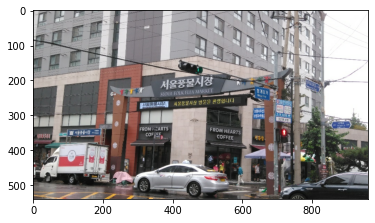

In [ ]:
for batch_x, batch_y in dataset:
    print(batch_x.shape, batch_y.shape)

    target_class = np.argmax(batch_y[0].numpy())
    print(category_dict[target_class])
    plt.figure()
    plt.imshow(batch_x[0].numpy())
    # plt.title('{}'.format(category_dict[target_class]))
    plt.show()

    break

### TFRecords vs Normal benchmark 

동일한 조건에서 순수한 파일 I/O 속도만을 비교하기 위해서 cache, prepetch, multiprocess와 같은 속도에 영향을 줄 수 있는 요소는 제외하고 측정하였습니다.

- TFRecords 사용 시

In [ ]:
get_file(pth.join(data_base_path, 'all_train.tfrecords'))
get_file(pth.join(data_base_path, 'all_val.tfrecords'))
get_file(pth.join(data_base_path, 'test.tfrecords'))

In [ ]:
dataset = tf.data.TFRecordDataset(train_tfrecord_path, compression_type='GZIP')
dataset = dataset.map(_parse_image_function)

In [ ]:
for _ in tqdm(dataset, position=0, leave=True):
    pass

70481it [05:43, 205.02it/s]


- 일반적인 jpg파일 사용 시

In [ ]:
train_ids, val_ids, train_landmark_ids, val_landmark_ids = train_test_split(train_df['id'], train_df['landmark_id'], test_size=0.2, random_state=7777, shuffle=True)

In [ ]:
def load_image(image_path, label):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.dtypes.cast(img, tf.float32)
    return img, label

In [ ]:
train_tfrecord_array = np.array([pth.join(data_base_path, 'train', img_name+'.JPG') for img_name in train_ids.values])

dataset = tf.data.Dataset.from_tensor_slices((train_tfrecord_array, train_landmark_ids))
dataset = dataset.map(load_image)

In [ ]:
for _ in tqdm(dataset, position=0, leave=True):
    pass

100%|██████████| 70481/70481 [14:40<00:00, 80.08it/s]


- 결과를 보았을 때, 5분 43초(TFRecords) vs 14분 40초(Normal)로 TFRecord를 사용하는 것이 3배 정도 더 빨랐습니다.  
- jpg 이미지가 속도가 더 오래 걸리는 이유는, jpg 방식으로 압축되어 있는 이미지를 raw 이미지로 해독하는데 걸리는 시간으로 인한 오버헤드로 추정됩니다.
- 저 같은 경우 MobileNetV2 기반 모델이고, 코랩 T4 VGA 기준 학습 속도가 한 에폭에 8~9분정도 걸리는 상황이는 파일 I/O 속도가 전체 학습 속도에 미치는 영향은 상당히 큰 것으로 생각됩니다.   
- 또한 실제 사용에서는 Multiprocessing이나 prefetch와 같은 기능도 같이 사용하기 떄문에 이를 사용해서도 테스트 해보겠습니다.

- TFRecords 사용 시

In [ ]:
dataset = tf.data.TFRecordDataset(train_tfrecord_path, compression_type='GZIP')
dataset = dataset.map(_parse_image_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

for _ in tqdm(dataset, position=0, leave=True):
    pass

70481it [05:43, 205.04it/s]


- 일반적인 jpg로 로딩 시

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((train_tfrecord_array, train_landmark_ids))
dataset = dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

for _ in tqdm(dataset, position=0, leave=True):
    pass

100%|██████████| 70481/70481 [05:46<00:00, 203.17it/s]


- 결과를 보았을 때, 놀랍게도 TFRecord를 사용하는 것과 일반 이미지 로딩 방식이 거의 동일한 시간을 보이는 것을 확인할 수 있습니다.  
- 코랩에서는 앞서 언급한 이미지 압축 해제에 대한 오버헤드를 tf.data의 부가기능을 활용하여 충분히 극복할 수 있는 것으로 보입니다.
- 또한, TRRecord는 그냥 읽는 것과 동일한 시간이 걸리는 것으로 확인되는데, 이는 TFRecord로 읽는 방식 자체가 파일 I/O 이외에 별다른 오버헤드가 크게 없어서 그런 것으로 추정됩니다.